In [7]:
##### Feature Importance Code

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import io
import time

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, log_loss, accuracy_score, f1_score
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
def feature_importances_histo(clf, file_name_path, file_name_generalScore, X_train, y_train=None,
                              top_n=10, figsize=(8, 8), print_table=False, title="Feature Importances"):
    __name__ = "feature_importances_histo"

    # try:
    if not hasattr(clf, 'feature_importances_'):
        clf.fit(X_train.values, y_train.values.ravel())

        if not hasattr(clf, 'feature_importances_'):
            raise AttributeError("{} does not have feature_importances_ attribute".
                                 format(clf.__class__.__name__))

    feat_imp = pd.DataFrame({title: clf.feature_importances_})
    feat_imp['feature'] = X_train.columns
    dfAllResults['feature'] = X_train.columns
    dfAllResults[title] = clf.feature_importances_
    feat_imp = feat_imp.iloc[:top_n]
    feat_imp.sort_values(by='feature', ascending=False, inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)

    print("\n================  Feature Importance  ==============")
    print(title)
    print("____________________________________________________")
    print(feat_imp)
    print("----------------------------------------------------")

    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.rcParams.update({'font.size': 5})
    # plt.show()
    # plt.savefig(os.path.join(file_name_path, title + file_name_generalScore))

    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by='feature', ascending=False))

    return feat_imp


|------------------------------------|

Artix-7

|------------------------------------|

['Column1', 'DEVICE', 'BOARD', 'FUNCTION', 'DATA_TYPE', 'ID_VAL', 'DSP', 'BRAM', 'Flip_Flop', 'Area', 'min_Slack', 'Max_Freq', 'Time', 'Energy', 'BugsDelivered', 'DifficultyLevel', 'DistinctOperands', 'DistinctOperators', 'Effort', 'ProgramLength', 'ProgramLevel', 'ProgramVolume', 'TimeToImplement', 'TotalOperators', 'Total_Operands', 'VocabularySize', 'Sloc', 'DecisionPoint', 'GlobalVariables', 'If', 'Loop', 'Goto', 'Assignment', 'ExitPoint', 'Function.1', 'FunctionCall', 'PointerDereferencing', 'CyclomaticComplexity', 'SyntacticallyReachableFunctions', 'SemanticallyReachedFunctions', 'CoverageEstimation', 'SCALAR_INPUT', 'RANGE_SCALAR_VALUES', 'SCALAR_INDEX_INPUT', 'RANGE_SCALAR_INDEX_VALUES', 'ARRAY_INPUT', 'RANGE_ARRAY_INPUT', 'cInstr', 'assemblyInstr', 'clockCycles', 'CC4CS', 'Bugs_Delivered', 'SS_VAL_1', 'SV_VAL_1', 'SV_VAL_2', 'V_VAL_1', 'V_VAL_2', 'V_VAL_3', 'V_VAL_4', 'V_VAL_5', 'V_VAL_6'

C:\Users\vitto\AppData\Local\Temp\ipykernel_17296\929690531.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)



================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                     0.003654
VocabularySize             0.008498
V_VAL_9                    0.000817
V_VAL_8                    0.001309
V_VAL_7                    0.001090
...                             ...
Column1                    0.040115
Bugs_Delivered             0.013571
BugsDelivered              0.013246
Assignment                 0.046137
ARRAY_INPUT                0.151009

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                           0.018392
VocabularySize                   0.000040
V_VAL_9                     


=============   Feature Importance Mean Score   =============
                        avg
feature                    
Column1            0.498187
BugsDelivered      0.009323
DifficultyLevel    0.049699
DistinctOperands   0.014267
DistinctOperators  0.013219
...                     ...
M_VAL_28           0.003696
M_VAL_29           0.001905
M_VAL_30           0.001596
M_VAL_31           0.004462
M_VAL_32           0.001079

[99 rows x 1 columns]

=============   Feature Pruned by Score   =============
                           avg
feature                       
Column1               0.498187
Assignment            0.195916
CyclomaticComplexity  0.084005
ARRAY_INPUT           0.272714
['Column1', 'Assignment', 'CyclomaticComplexity', 'ARRAY_INPUT']

|------------------------------------|

Flip_Flop

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTr


================  Feature Importance  ==============
AdaBoostRegressor
____________________________________________________
                AdaBoostRegressor
feature                          
cInstr               0.000000e+00
VocabularySize       6.007564e-04
V_VAL_9              0.000000e+00
V_VAL_8              0.000000e+00
V_VAL_7              0.000000e+00
...                           ...
Column1              1.105563e-02
Bugs_Delivered       6.120007e-07
BugsDelivered        1.170903e-04
Assignment           7.328932e-02
ARRAY_INPUT          2.212211e-04

[99 rows x 1 columns]
----------------------------------------------------


C:\Users\vitto\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:386: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)



================  Feature Importance  ==============
RandomForestRegressor
____________________________________________________
                RandomForestRegressor
feature                              
cInstr                       0.000055
VocabularySize               0.000259
V_VAL_9                      0.000046
V_VAL_8                      0.000005
V_VAL_7                      0.000002
...                               ...
Column1                      0.025685
Bugs_Delivered               0.000345
BugsDelivered                0.000141
Assignment                   0.010393
ARRAY_INPUT                  0.000262

[99 rows x 1 columns]
----------------------------------------------------
                   ExtraTreesRegressor  GradientBoostingRegressor  \
feature                                                             
Column1                       0.022509                   0.008927   
BugsDelivered                 0.000319                   0.000010   
DifficultyLevel          


=============   Feature Importance Mean Score   =============
                        avg
feature                    
Column1            0.977788
BugsDelivered      0.029751
DifficultyLevel    0.088496
DistinctOperands   0.049973
DistinctOperators  0.081311
...                     ...
M_VAL_28           0.006598
M_VAL_29           0.003382
M_VAL_30           0.003149
M_VAL_31           0.007763
M_VAL_32           0.002099

[99 rows x 1 columns]

=============   Feature Pruned by Score   =============
                                      avg
feature                                  
Column1                          0.977788
DifficultyLevel                  0.088496
DistinctOperators                0.081311
TimeToImplement                  0.054604
Total_Operands                   0.111063
VocabularySize                   0.056478
Sloc                             0.108264
DecisionPoint                    0.064651
If                               0.059773
Loop                           


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                 2.948420e-01
VocabularySize         3.701546e-03
V_VAL_9                9.270130e-07
V_VAL_8                4.180073e-06
V_VAL_7                1.850167e-06
...                             ...
Column1                1.845152e-02
Bugs_Delivered         7.023872e-02
BugsDelivered          6.835252e-02
Assignment             1.739512e-02
ARRAY_INPUT            5.332825e-06

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                       1.759830e-01
VocabularySize               8.185637e-03
V_VAL_9                     

C:\Users\vitto\AppData\Local\Temp\ipykernel_17296\929690531.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)



|------------------------------------|

DSP

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                     0.012534
VocabularySize             0.002765
V_VAL_9                    0.000553
V_VAL_8                    0.000506
V_VAL_7                    0.000493
...                             ...
Column1                    0.039321
Bugs_Delivered             0.013698
BugsDelivered              0.005922
Assignment                 0.062406
ARRAY_INPUT                0.240701

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                    


=============   Feature Importance Mean Score   =============
                        avg
feature                    
Column1            0.519599
BugsDelivered      0.011978
DifficultyLevel    0.026942
DistinctOperands   0.015869
DistinctOperators  0.005972
...                     ...
M_VAL_28           0.000709
M_VAL_29           0.002932
M_VAL_30           0.000894
M_VAL_31           0.000248
M_VAL_32           0.000464

[99 rows x 1 columns]

=============   Feature Pruned by Score   =============
                  avg
feature              
Column1      0.519599
Loop         0.104026
Assignment   0.245828
ARRAY_INPUT  0.382339
['Column1', 'Loop', 'Assignment', 'ARRAY_INPUT']

|------------------------------------|

Flip_Flop

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr               


================  Feature Importance  ==============
AdaBoostRegressor
____________________________________________________
                AdaBoostRegressor
feature                          
cInstr                   0.000003
VocabularySize           0.001086
V_VAL_9                  0.000000
V_VAL_8                  0.000000
V_VAL_7                  0.000000
...                           ...
Column1                  0.003456
Bugs_Delivered           0.000084
BugsDelivered            0.000002
Assignment               0.026966
ARRAY_INPUT              0.008368

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
RandomForestRegressor
____________________________________________________
                RandomForestRegressor
feature                              
cInstr                       0.000064
VocabularySize               0.001205
V_VAL_9                      0.000013
V_VAL_8                      0.000005



=============   Feature Importance Mean Score   =============
                        avg
feature                    
Column1            0.912138
BugsDelivered      0.023709
DifficultyLevel    0.047790
DistinctOperands   0.035158
DistinctOperators  0.015586
...                     ...
M_VAL_28           0.001295
M_VAL_29           0.005139
M_VAL_30           0.001684
M_VAL_31           0.000492
M_VAL_32           0.001252

[99 rows x 1 columns]

=============   Feature Pruned by Score   =============
                                      avg
feature                                  
Column1                          0.912138
Total_Operands                   0.691964
Sloc                             0.098123
DecisionPoint                    0.092171
If                               0.058011
Loop                             0.209710
Assignment                       0.447551
ExitPoint                        0.132174
Function.1                       0.167601
FunctionCall                   

['Column1', 'DifficultyLevel', 'Total_Operands', 'VocabularySize', 'Sloc', 'DecisionPoint', 'If', 'Loop', 'Goto', 'Assignment', 'ExitPoint', 'Function.1', 'FunctionCall', 'PointerDereferencing', 'CyclomaticComplexity', 'SyntacticallyReachableFunctions', 'SemanticallyReachedFunctions', 'SCALAR_INPUT', 'RANGE_SCALAR_VALUES', 'SCALAR_INDEX_INPUT', 'RANGE_SCALAR_INDEX_VALUES', 'ARRAY_INPUT', 'RANGE_ARRAY_INPUT', 'cInstr', 'M_VAL_8']

|------------------------------------|

clockCycles

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                 2.802157e-01
VocabularySize         1.202228e-04
V_VAL_9                4.757488e-07
V_VAL_8                7.647817e-07
V_VAL_7                1.170401e-06
...                             ...
Column1                2.073546e-02
Bugs_Delivered        

C:\Users\vitto\AppData\Local\Temp\ipykernel_17296\929690531.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)



|------------------------------------|

DSP

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                     0.016226
VocabularySize             0.008825
V_VAL_9                    0.011922
V_VAL_8                    0.015488
V_VAL_7                    0.019266
...                             ...
Column1                    0.016521
Bugs_Delivered             0.015123
BugsDelivered              0.020305
Assignment                 0.002220
ARRAY_INPUT                0.160710

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                    


=============   Feature Importance Mean Score   =============
                        avg
feature                    
Column1            0.210716
BugsDelivered      0.011850
DifficultyLevel    0.074887
DistinctOperands   0.015303
DistinctOperators  0.004612
...                     ...
M_VAL_28           0.036572
M_VAL_29           0.012466
M_VAL_30           0.003549
M_VAL_31           0.014769
M_VAL_32           0.002587

[99 rows x 1 columns]

=============   Feature Pruned by Score   =============
                      avg
feature                  
Column1          0.210716
DifficultyLevel  0.074887
Loop             0.058668
Assignment       0.207159
ARRAY_INPUT      0.323302
['Column1', 'DifficultyLevel', 'Loop', 'Assignment', 'ARRAY_INPUT']

|------------------------------------|

Flip_Flop

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTre


================  Feature Importance  ==============
AdaBoostRegressor
____________________________________________________
                AdaBoostRegressor
feature                          
cInstr                   0.000144
VocabularySize           0.000430
V_VAL_9                  0.000210
V_VAL_8                  0.000000
V_VAL_7                  0.000000
...                           ...
Column1                  0.002096
Bugs_Delivered           0.000086
BugsDelivered            0.000000
Assignment               0.188825
ARRAY_INPUT              0.015308

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
RandomForestRegressor
____________________________________________________
                RandomForestRegressor
feature                              
cInstr                       0.000109
VocabularySize               0.000540
V_VAL_9                      0.000076
V_VAL_8                      0.000038



|------------------------------------|

Max_Freq

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                 6.095196e-06
VocabularySize         1.585702e-02
V_VAL_9                1.993098e-07
V_VAL_8                9.901385e-08
V_VAL_7                2.175609e-08
...                             ...
Column1                8.572851e-06
Bugs_Delivered         8.382238e-06
BugsDelivered          8.719405e-06
Assignment             6.270384e-06
ARRAY_INPUT            7.884667e-02

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr               


================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                       3.445346e-01
VocabularySize               7.867350e-03
V_VAL_9                      1.119622e-06
V_VAL_8                      3.318437e-08
V_VAL_7                      2.461186e-07
...                                   ...
Column1                      8.948079e-04
Bugs_Delivered               1.652025e-01
BugsDelivered                2.182789e-01
Assignment                   2.441295e-05
ARRAY_INPUT                  0.000000e+00

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
AdaBoostRegressor
____________________________________________________
                AdaBoostRegressor
feature                          
cInstr                   0.387790
VocabularySize    

C:\Users\vitto\AppData\Local\Temp\ipykernel_17296\929690531.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.fillna(0, inplace=True)



|------------------------------------|

DSP

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                     0.008946
VocabularySize             0.002096
V_VAL_9                    0.001633
V_VAL_8                    0.000653
V_VAL_7                    0.000892
...                             ...
Column1                    0.034145
Bugs_Delivered             0.015732
BugsDelivered              0.019523
Assignment                 0.039450
ARRAY_INPUT                0.199952

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                    

['Column1', 'DifficultyLevel', 'Loop', 'Goto', 'Assignment', 'ARRAY_INPUT']

|------------------------------------|

Flip_Flop

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                     0.001220
VocabularySize             0.003629
V_VAL_9                    0.000105
V_VAL_8                    0.000180
V_VAL_7                    0.000095
...                             ...
Column1                    0.001580
Bugs_Delivered             0.001205
BugsDelivered              0.001546
Assignment                 0.009392
ARRAY_INPUT                0.000564

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoos


================  Feature Importance  ==============
RandomForestRegressor
____________________________________________________
                RandomForestRegressor
feature                              
cInstr                       0.002193
VocabularySize               0.001306
V_VAL_9                      0.000115
V_VAL_8                      0.000014
V_VAL_7                      0.000007
...                               ...
Column1                      0.122419
Bugs_Delivered               0.002164
BugsDelivered                0.001783
Assignment                   0.517139
ARRAY_INPUT                  0.018270

[99 rows x 1 columns]
----------------------------------------------------
                   ExtraTreesRegressor  GradientBoostingRegressor  \
feature                                                             
Column1                       0.074070                   0.137540   
BugsDelivered                 0.003210                   0.000456   
DifficultyLevel          

['Column1', 'DifficultyLevel', 'DistinctOperators', 'Total_Operands', 'VocabularySize', 'Sloc', 'DecisionPoint', 'If', 'Loop', 'Goto', 'Assignment', 'ExitPoint', 'Function.1', 'FunctionCall', 'PointerDereferencing', 'CyclomaticComplexity', 'SyntacticallyReachableFunctions', 'SemanticallyReachedFunctions', 'SCALAR_INDEX_INPUT', 'RANGE_SCALAR_INDEX_VALUES', 'ARRAY_INPUT', 'SS_VAL_1', 'M_VAL_9', 'M_VAL_11']

|------------------------------------|

Max_Freq

|------------------------------------|


================  Feature Importance  ==============
ExtraTreesRegressor
____________________________________________________
                ExtraTreesRegressor
feature                            
cInstr                 2.674805e-06
VocabularySize         3.013131e-02
V_VAL_9                1.671877e-18
V_VAL_8                5.632009e-18
V_VAL_7                6.025612e-18
...                             ...
Column1                3.645564e-07
Bugs_Delivered         2.410567e-02
BugsDelivered 


================  Feature Importance  ==============
GradientBoostingRegressor
____________________________________________________
                GradientBoostingRegressor
feature                                  
cInstr                       1.707561e-01
VocabularySize               1.122460e-02
V_VAL_9                      5.869795e-07
V_VAL_8                      1.553534e-07
V_VAL_7                      1.726831e-06
...                                   ...
Column1                      1.923262e-02
Bugs_Delivered               1.335444e-04
BugsDelivered                9.715245e-05
Assignment                   5.060132e-03
ARRAY_INPUT                  1.321840e-04

[99 rows x 1 columns]
----------------------------------------------------

================  Feature Importance  ==============
AdaBoostRegressor
____________________________________________________
                AdaBoostRegressor
feature                          
cInstr                   0.340202
VocabularySize    

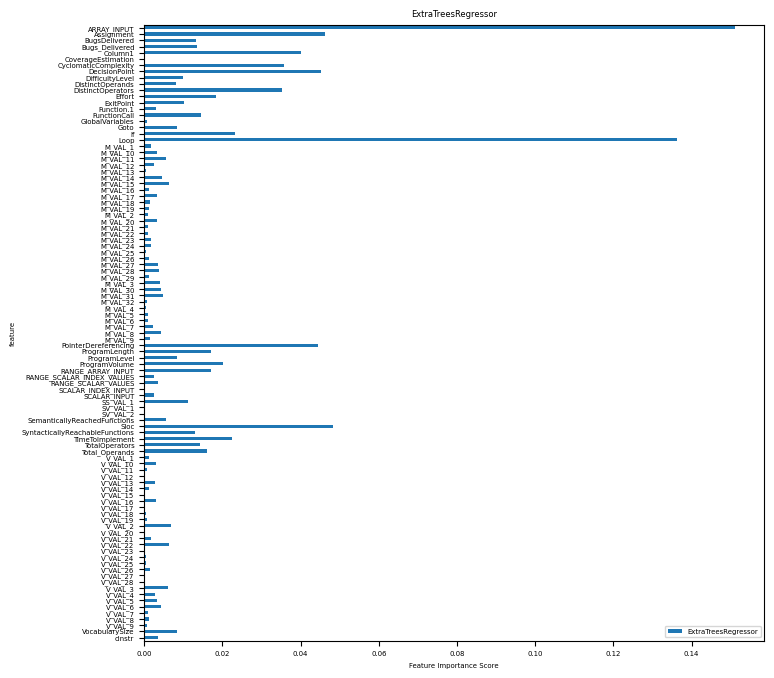

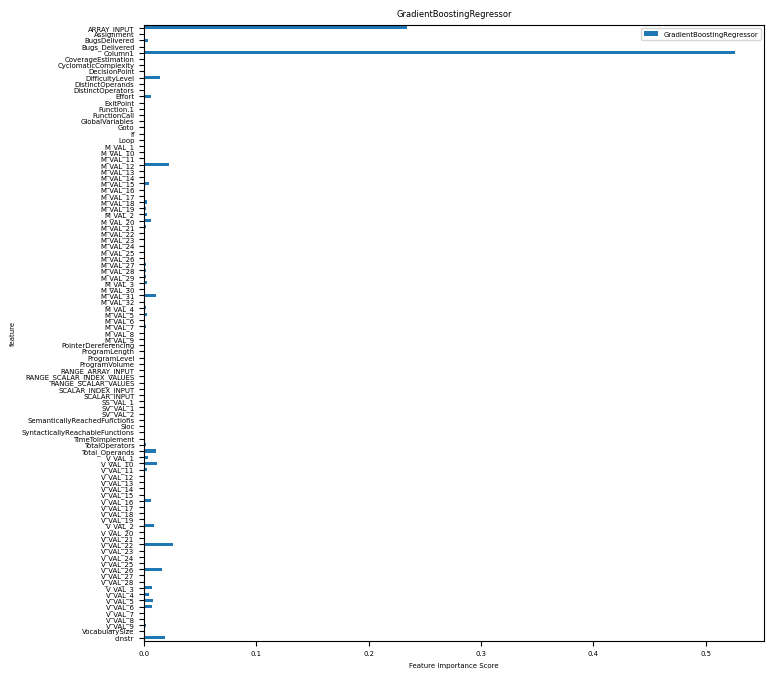

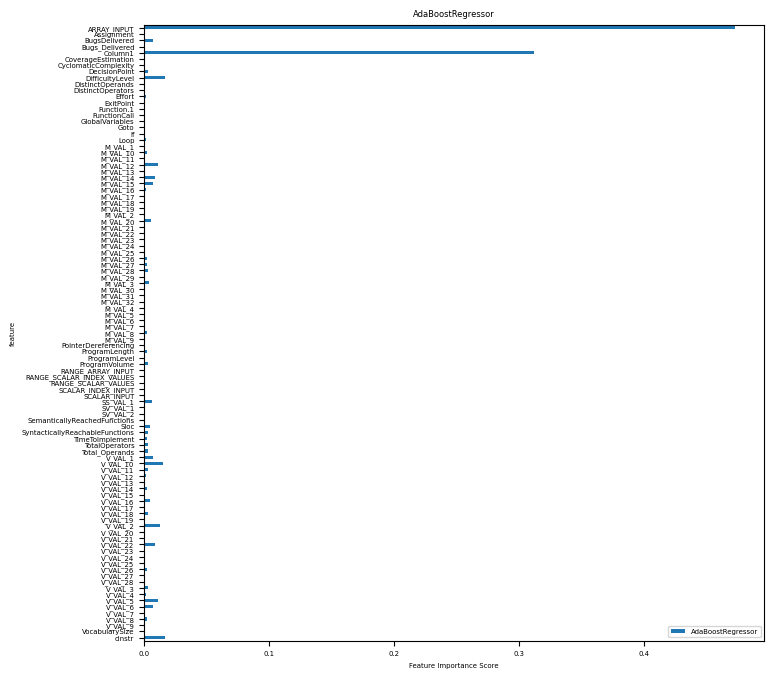

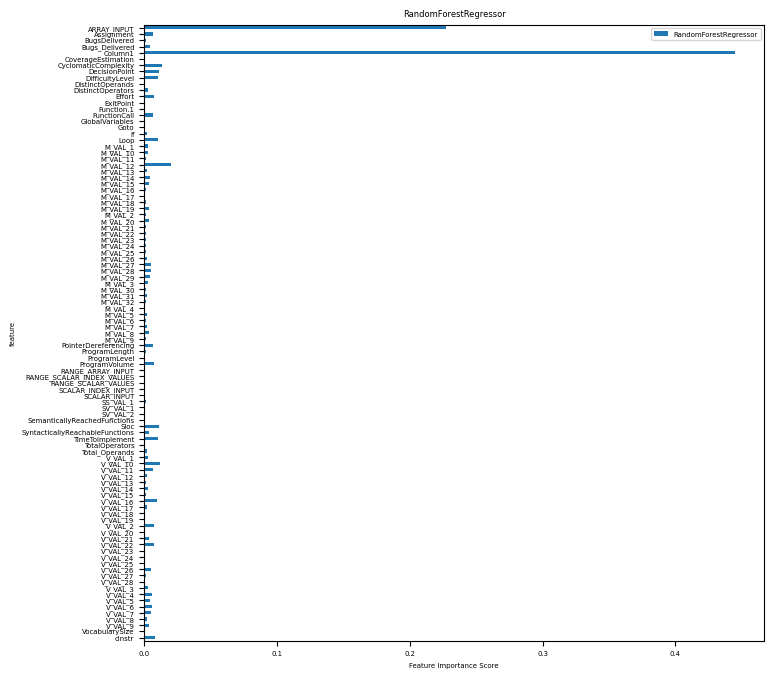

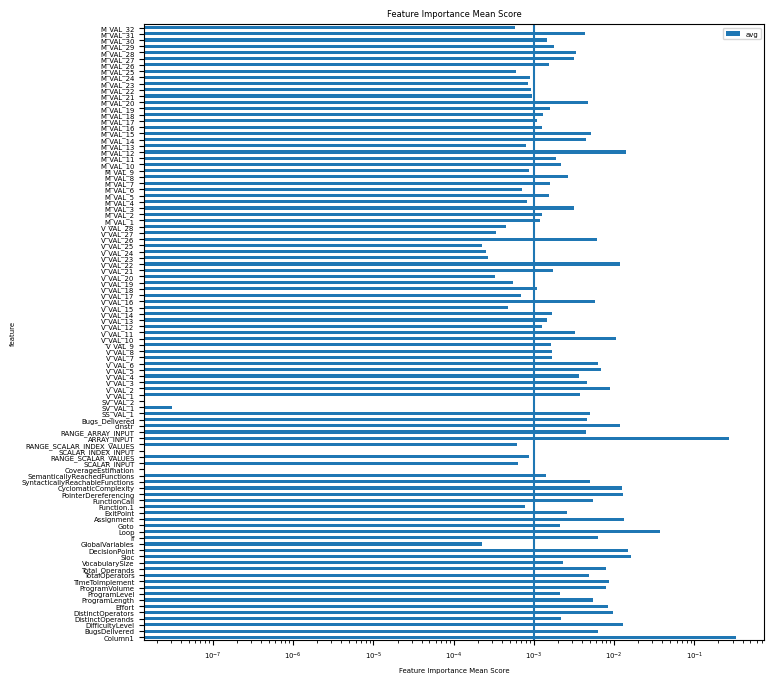

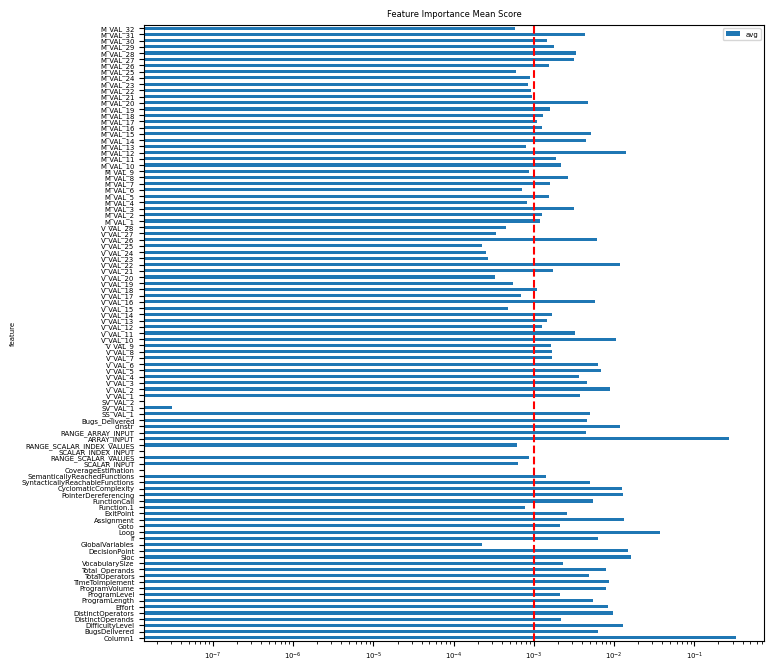

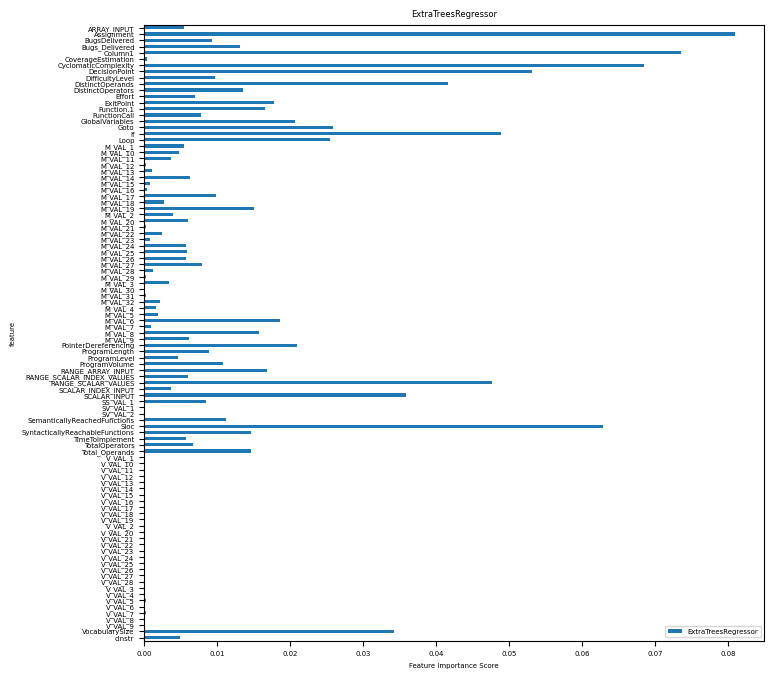

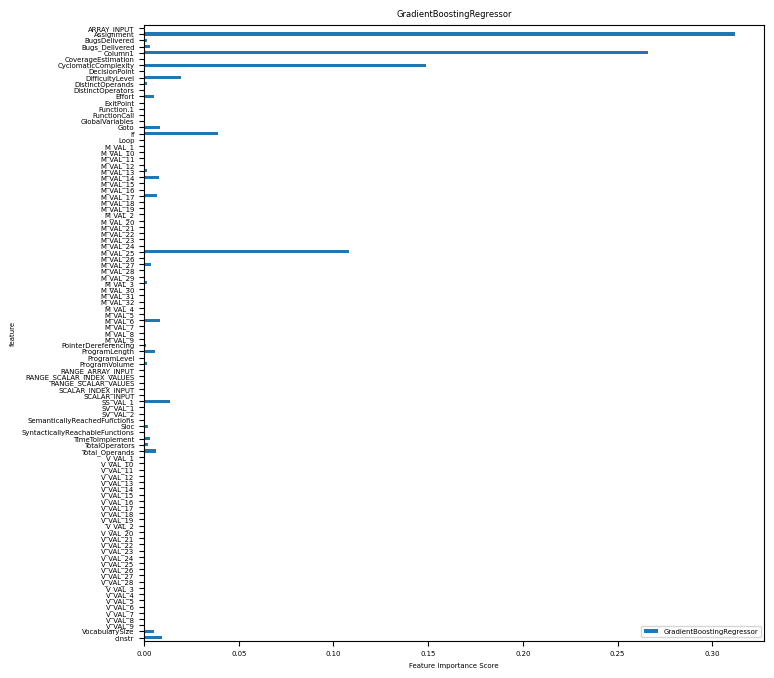

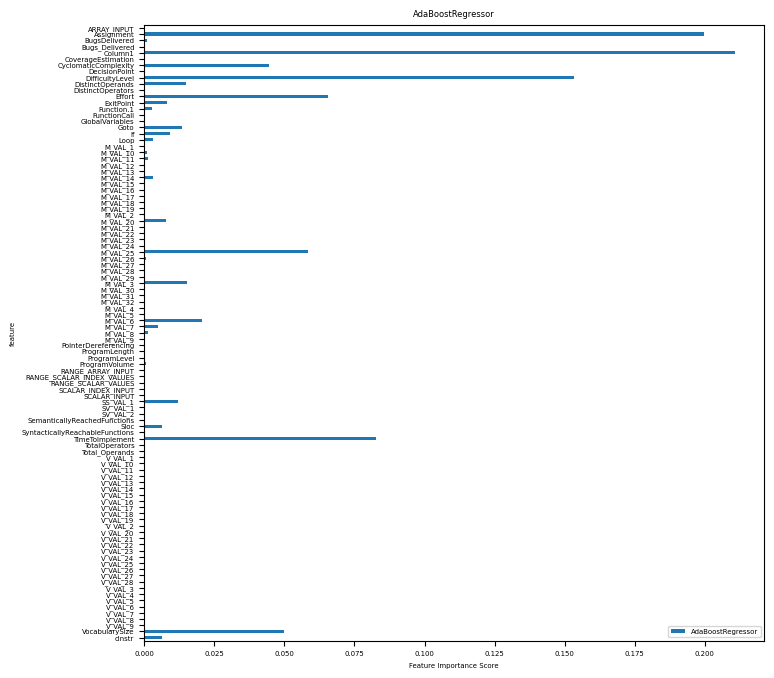

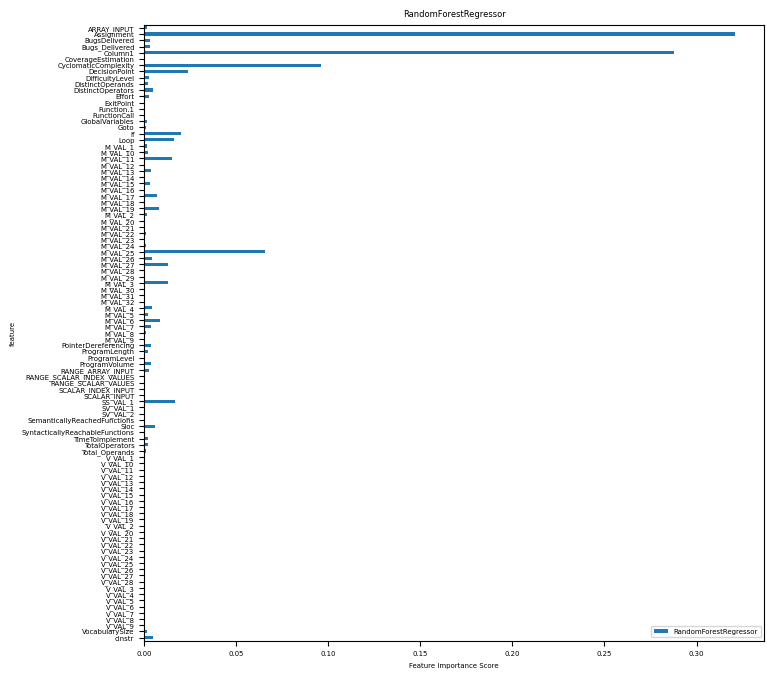

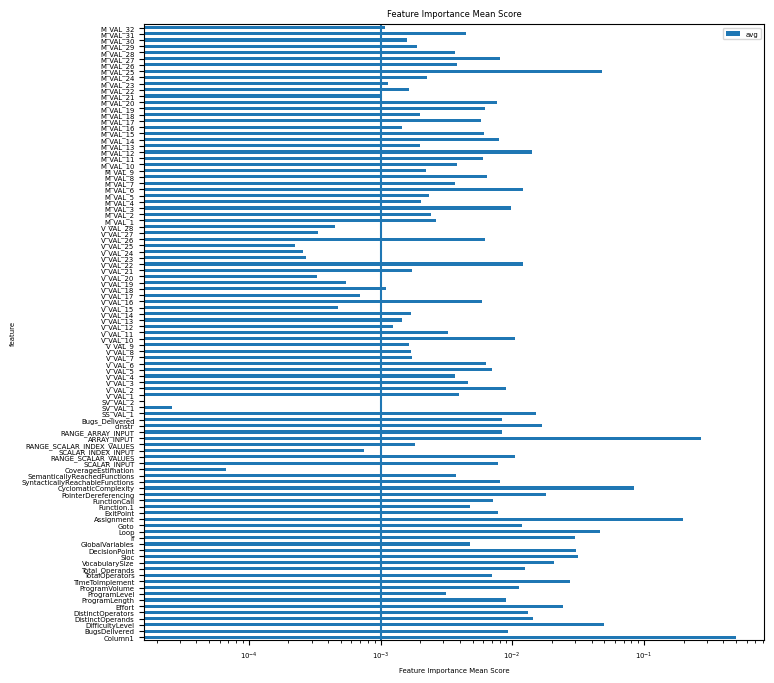

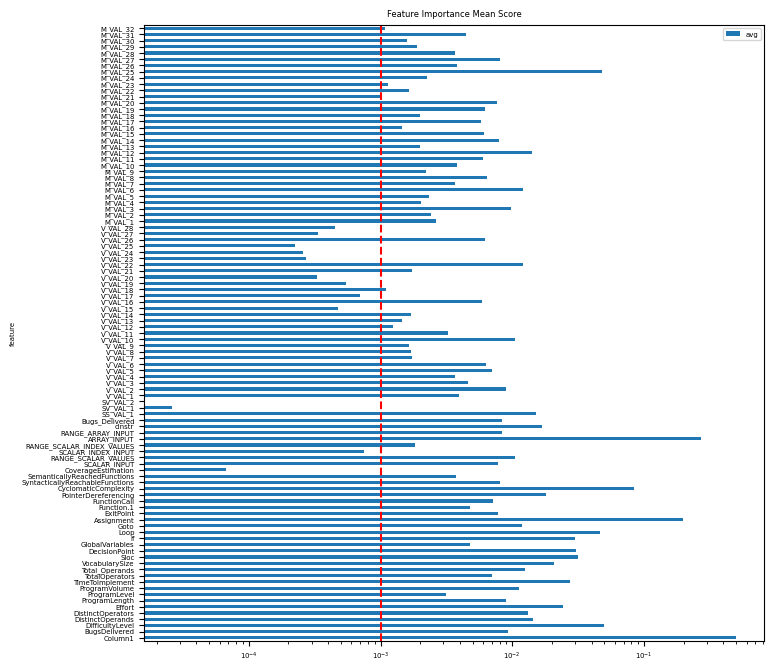

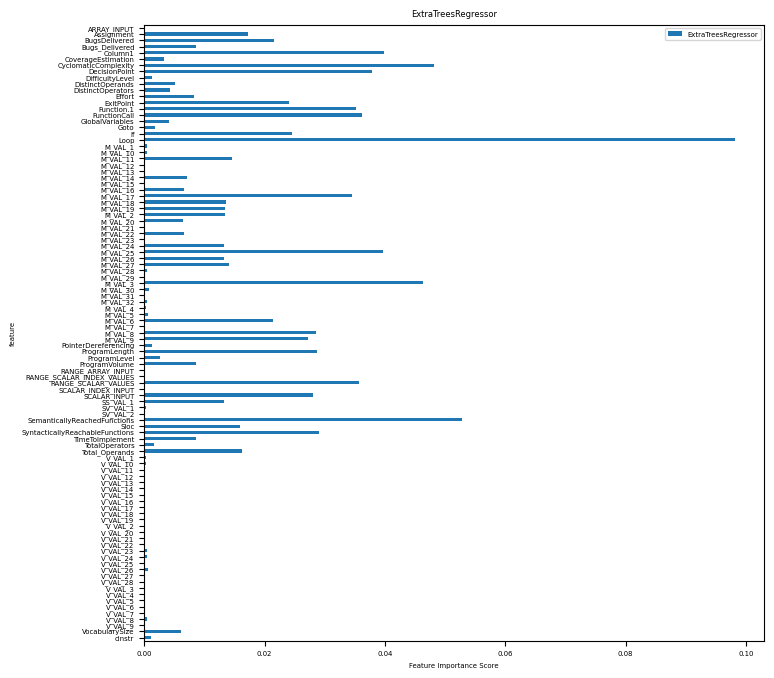

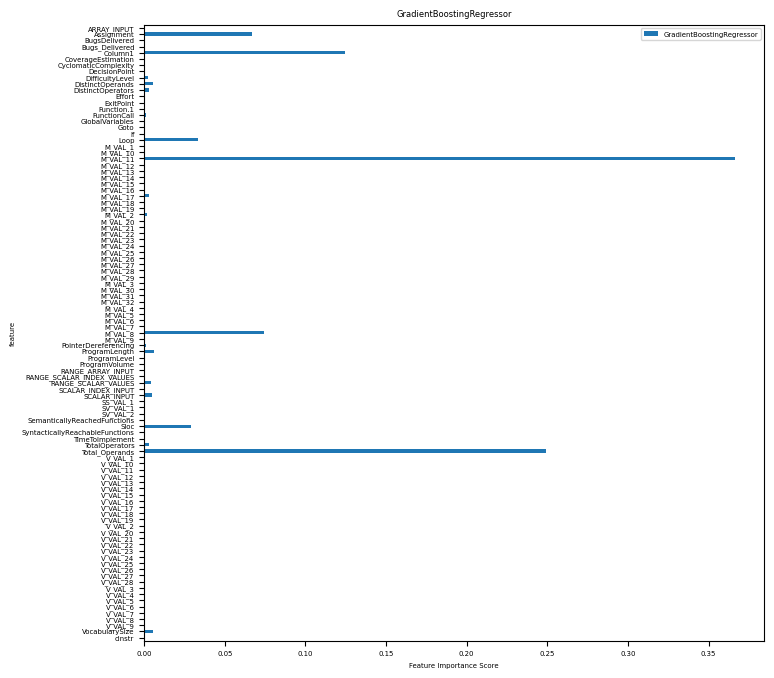

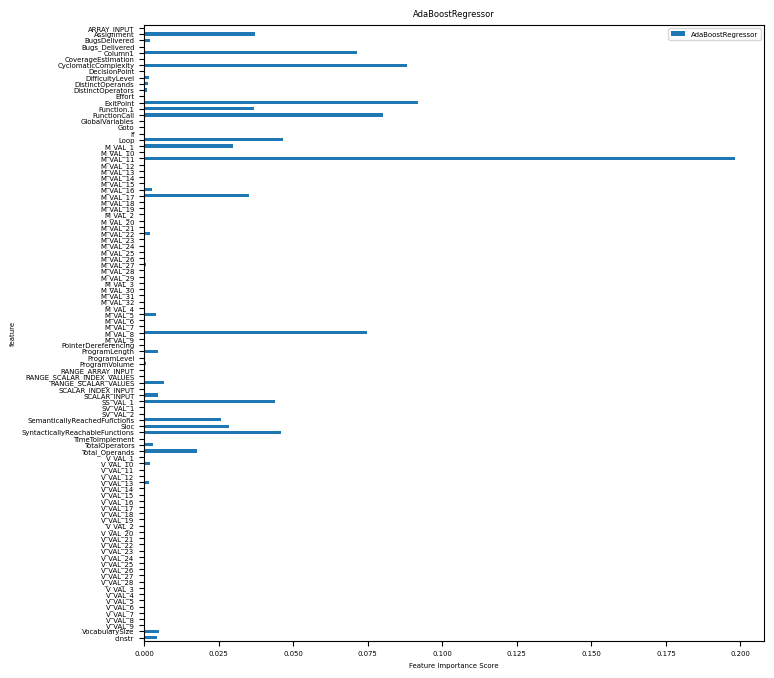

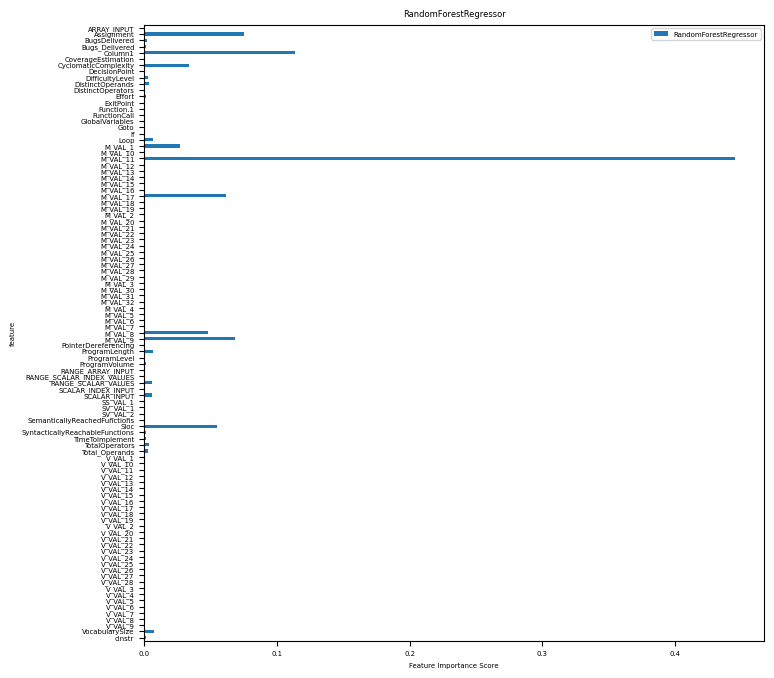

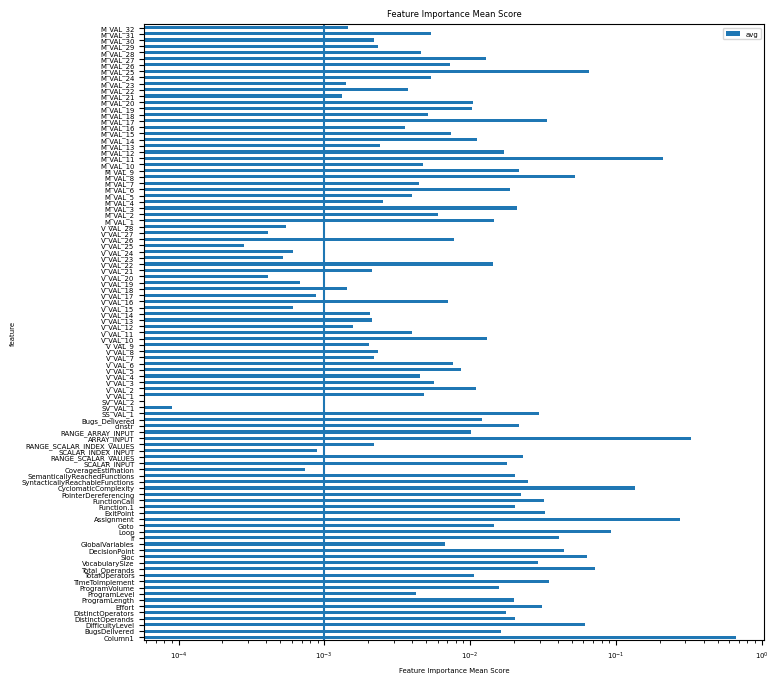

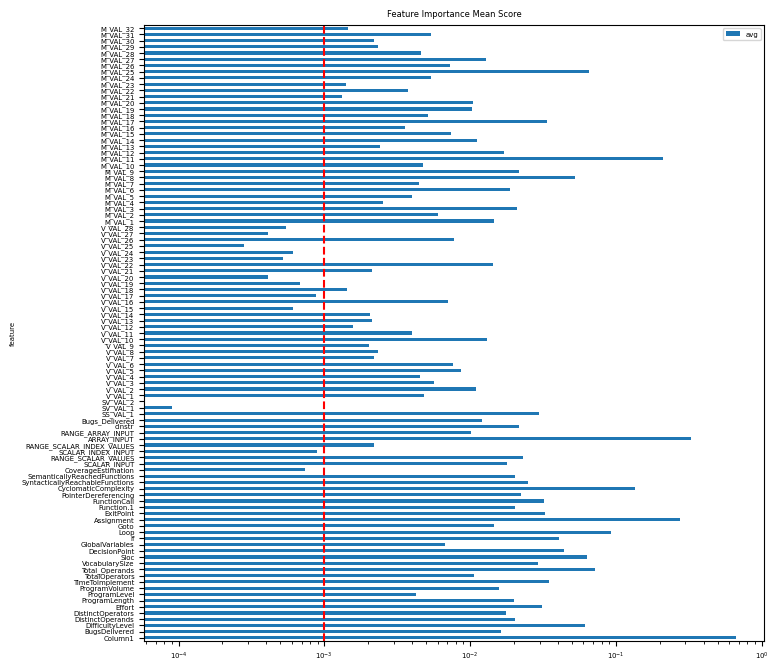

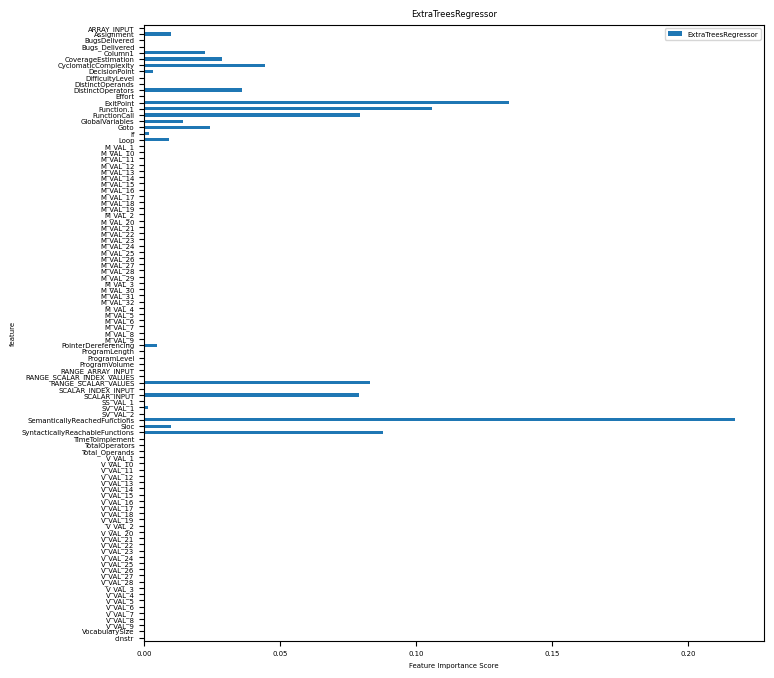

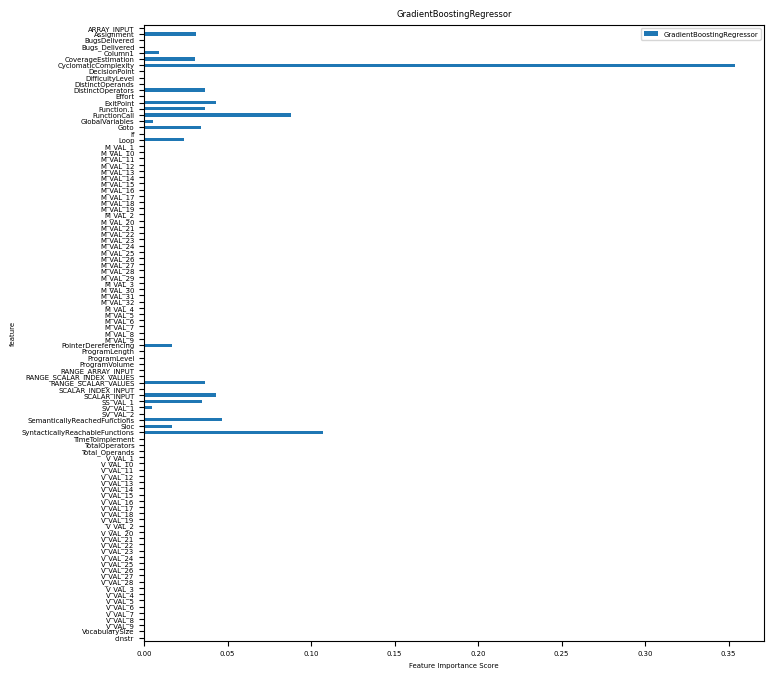

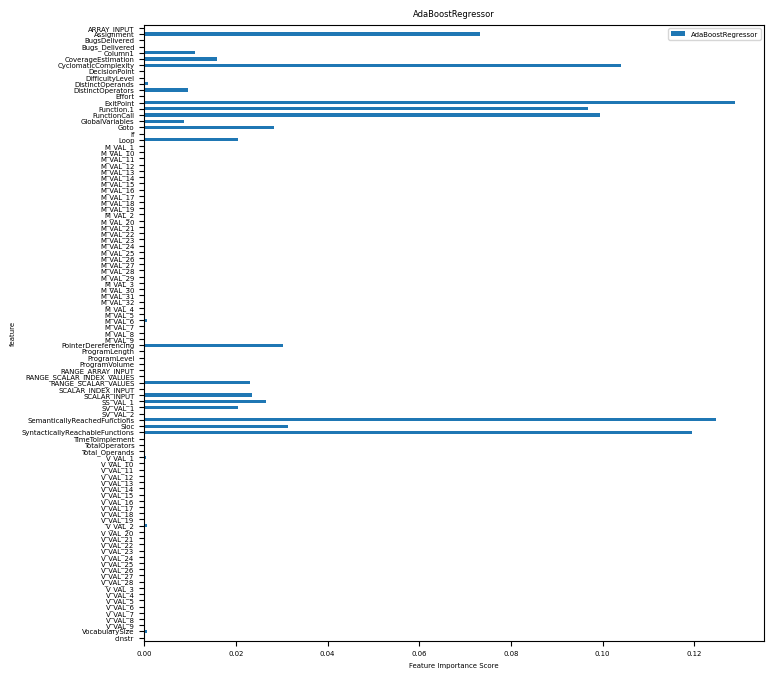

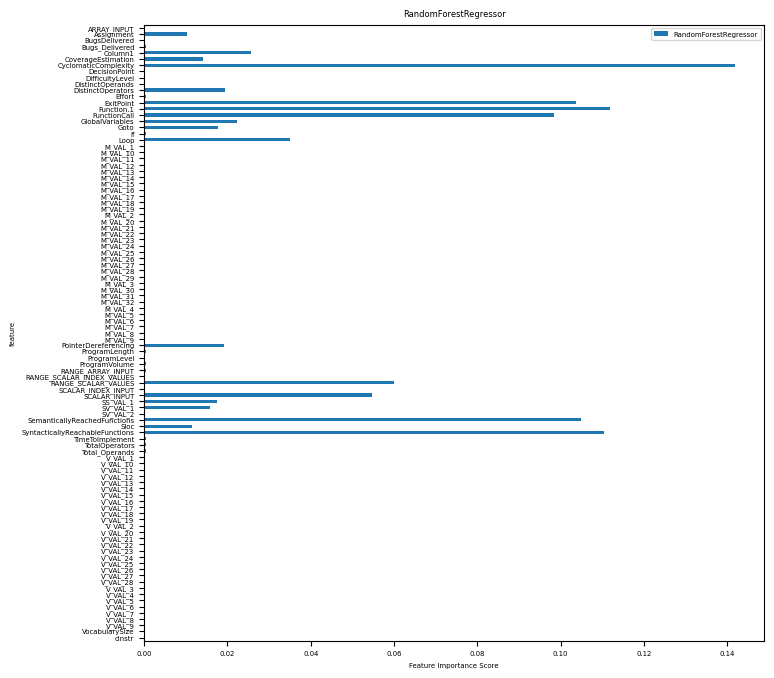

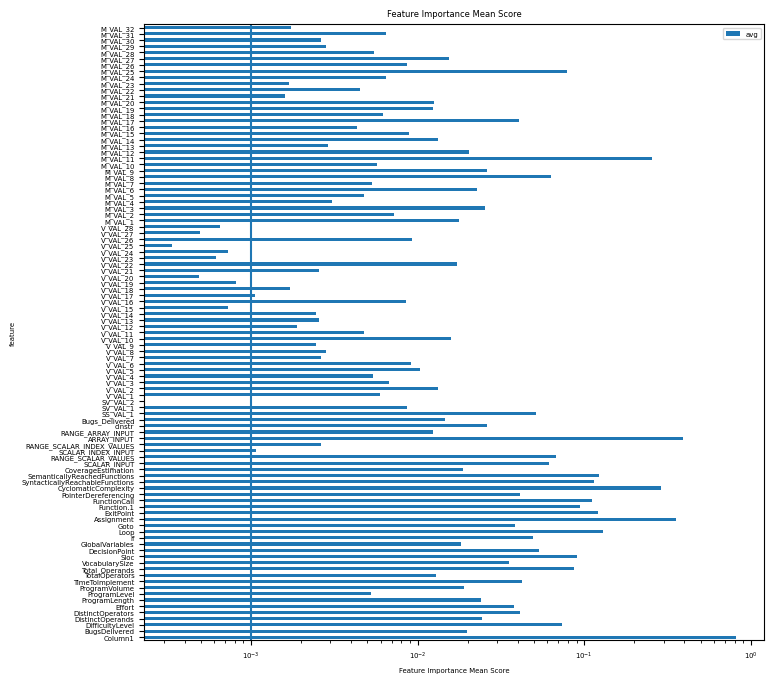

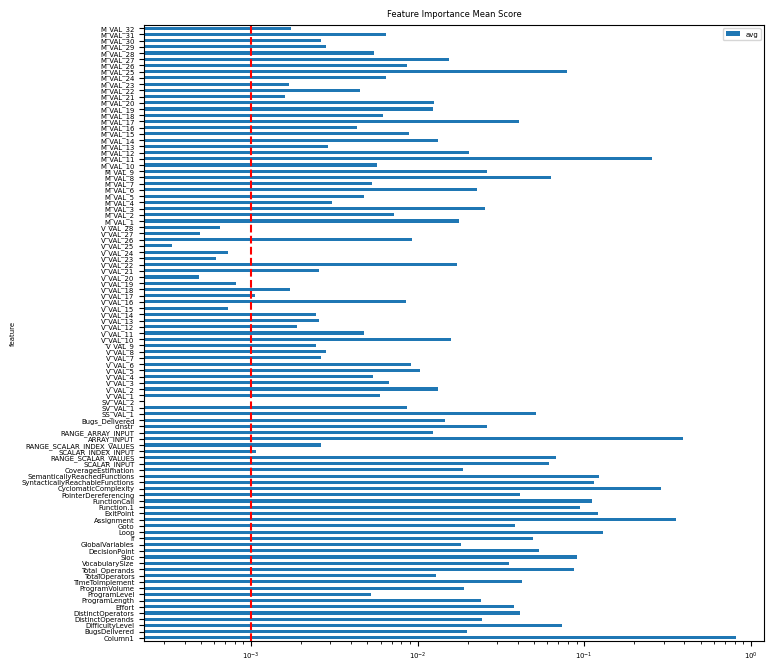

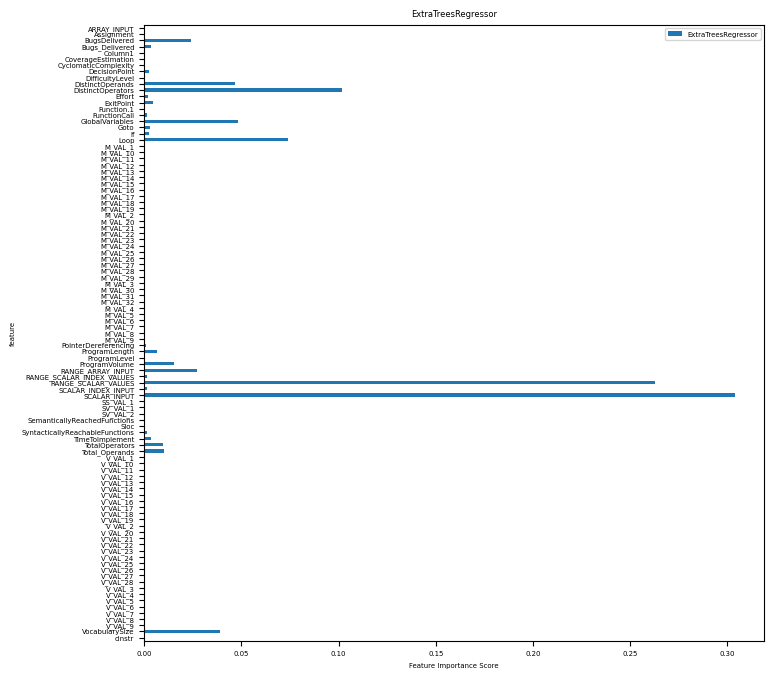

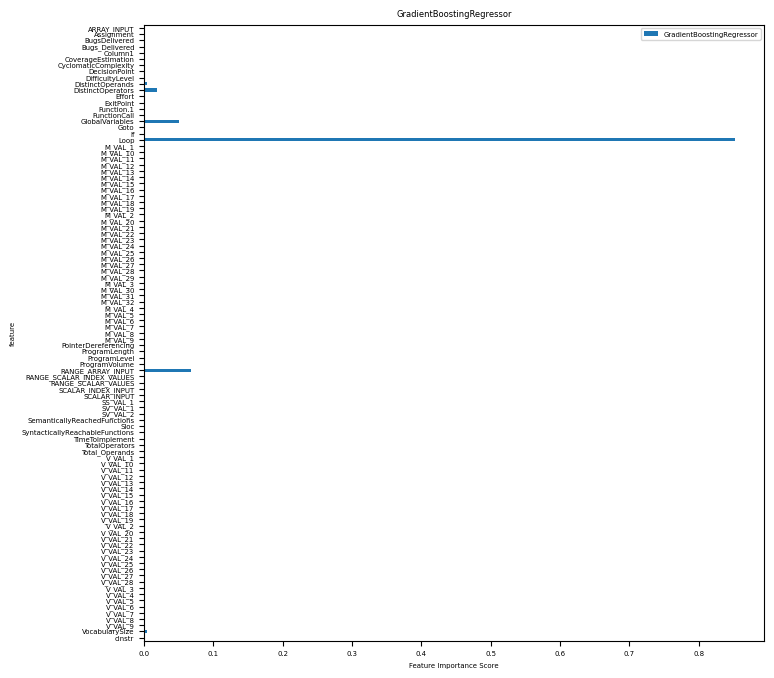

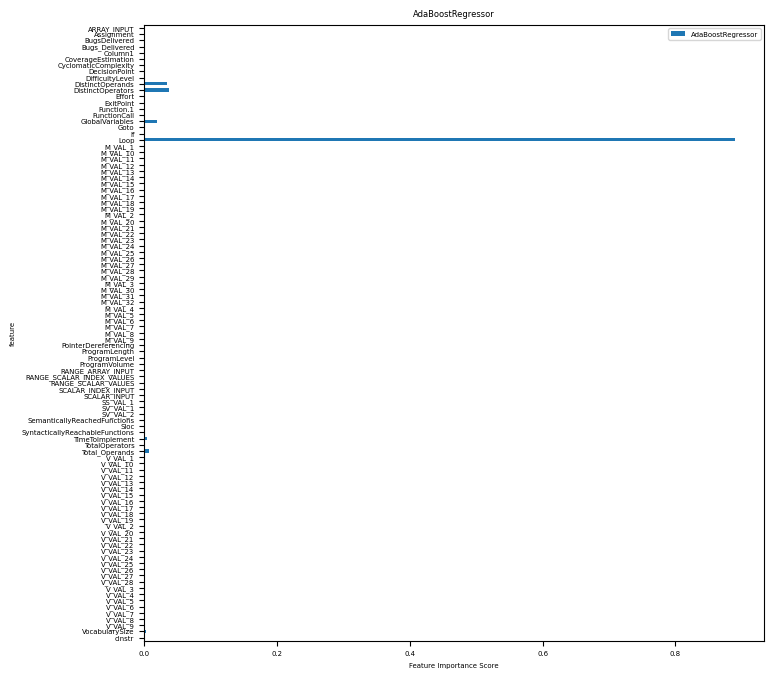

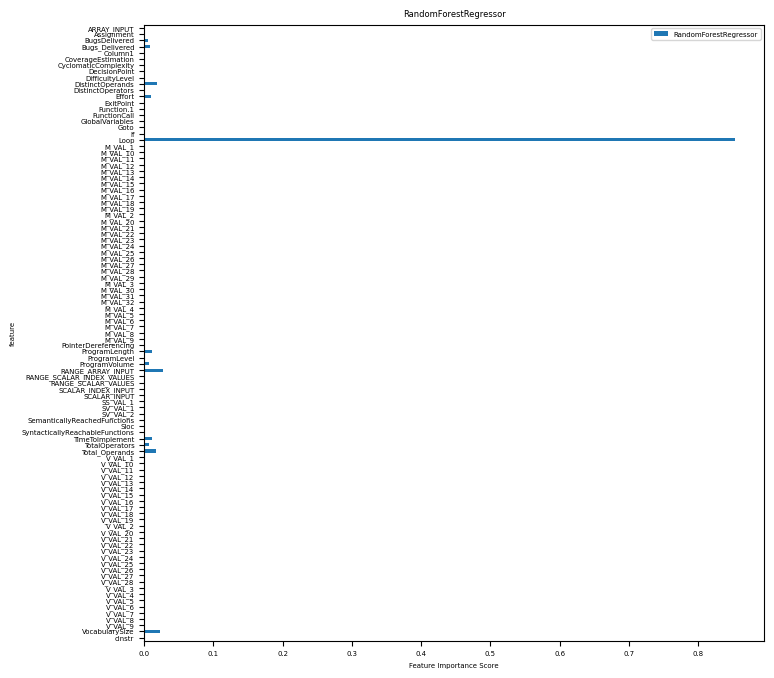

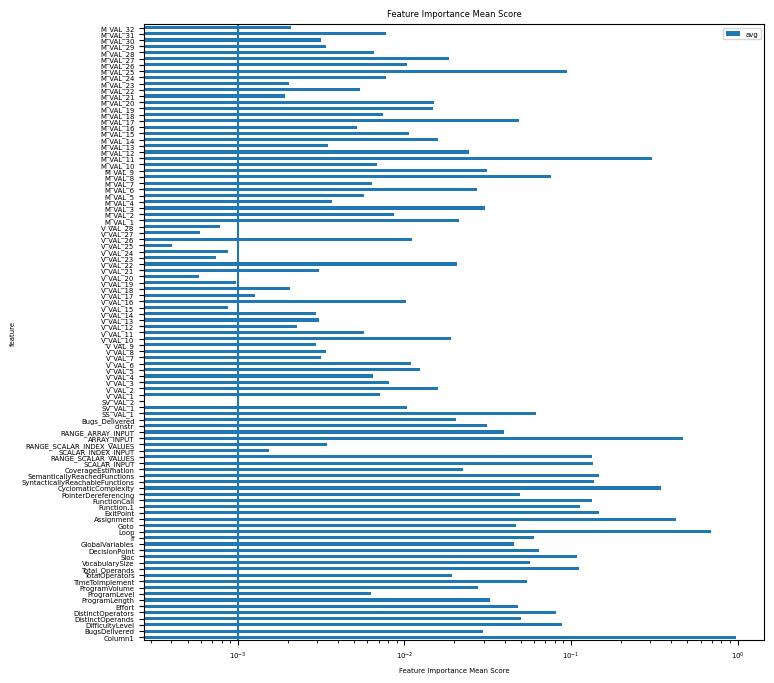

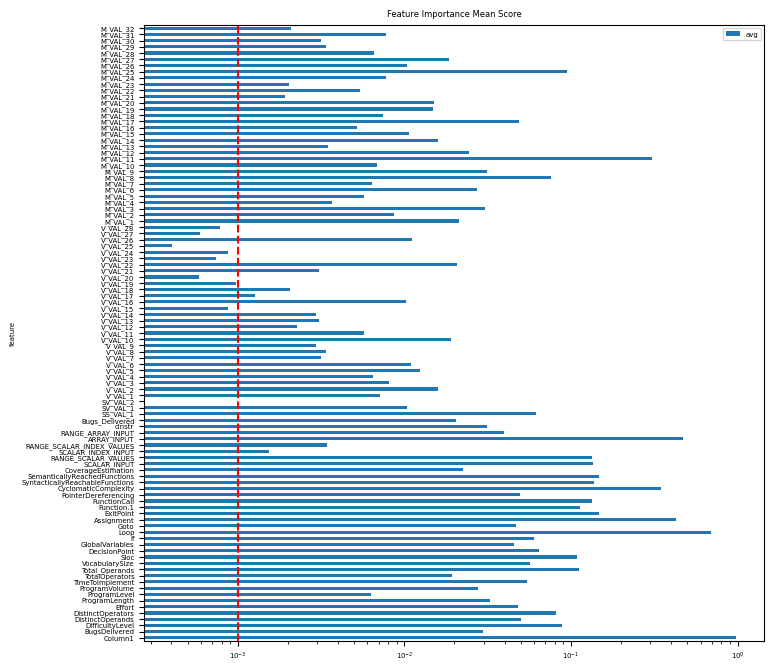

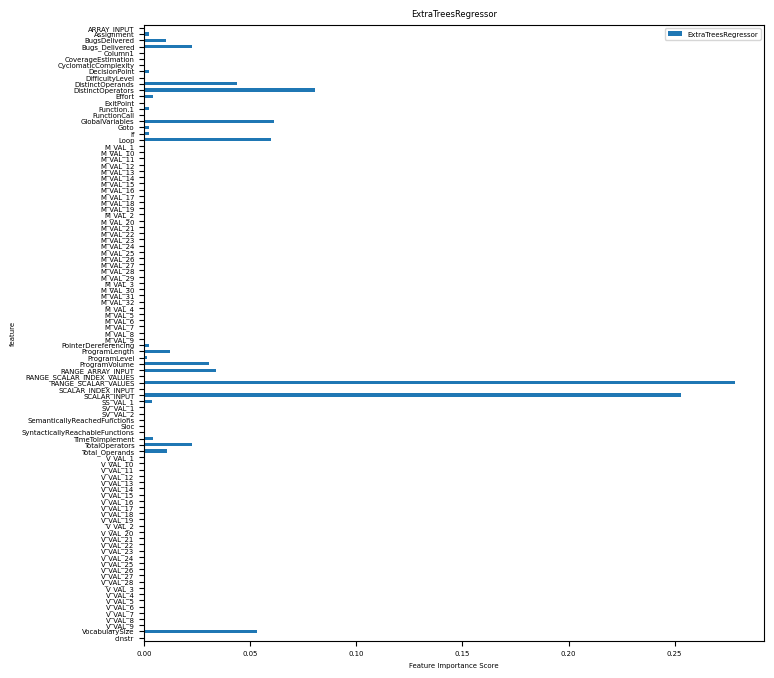

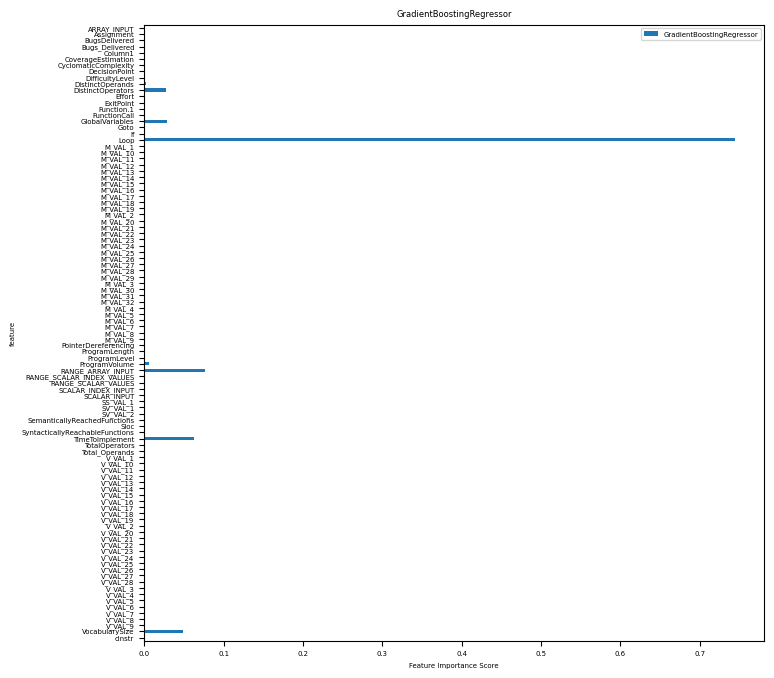

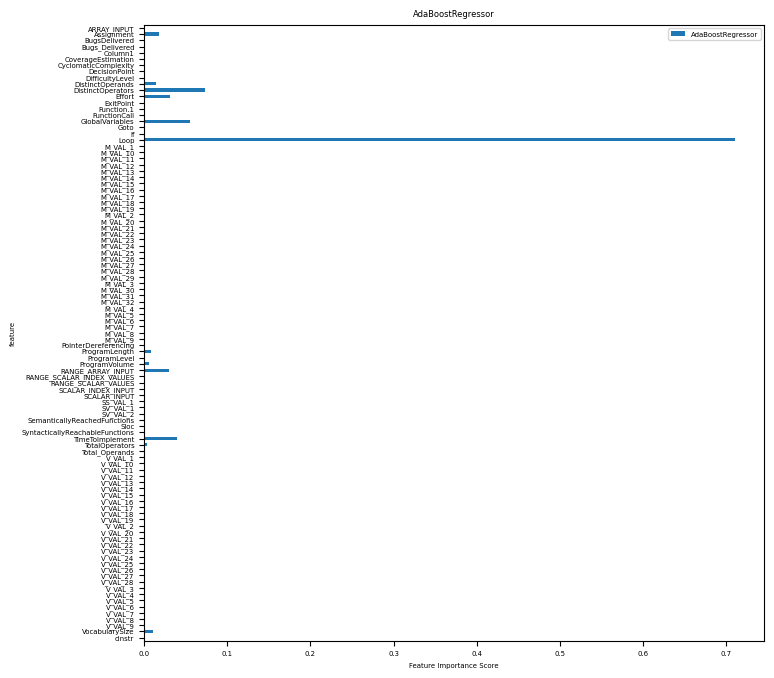

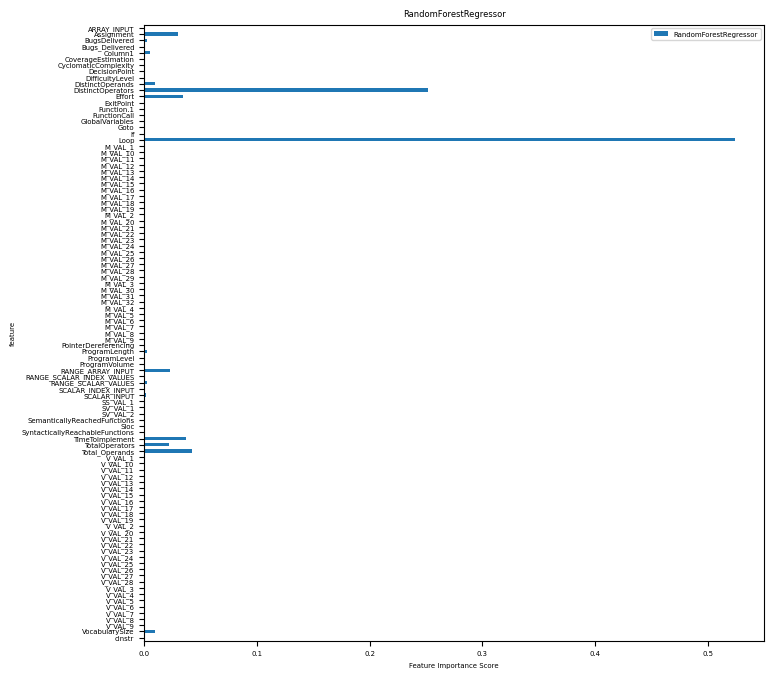

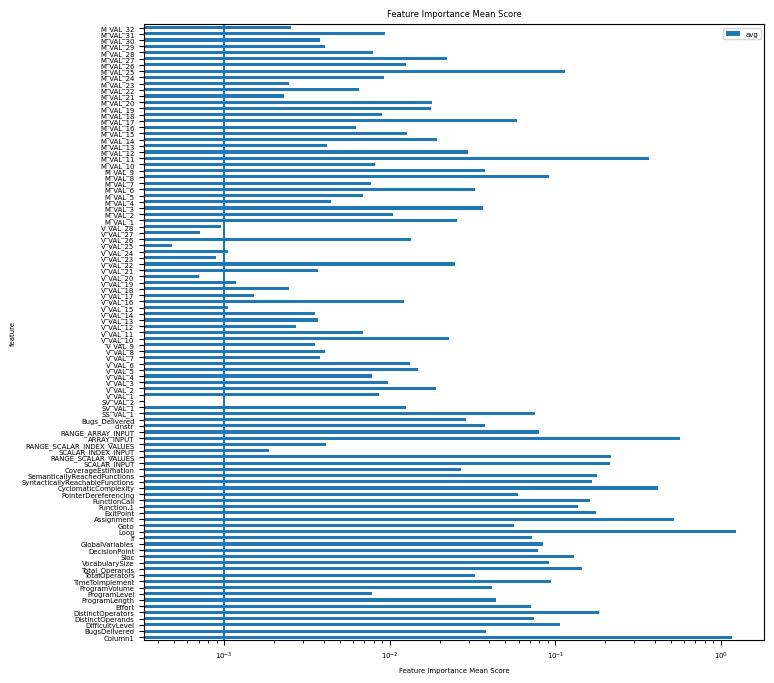

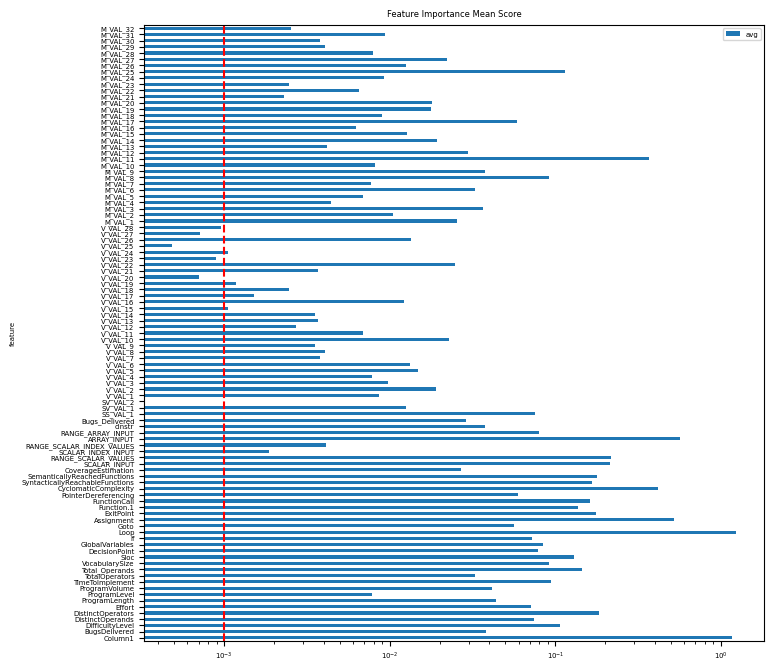

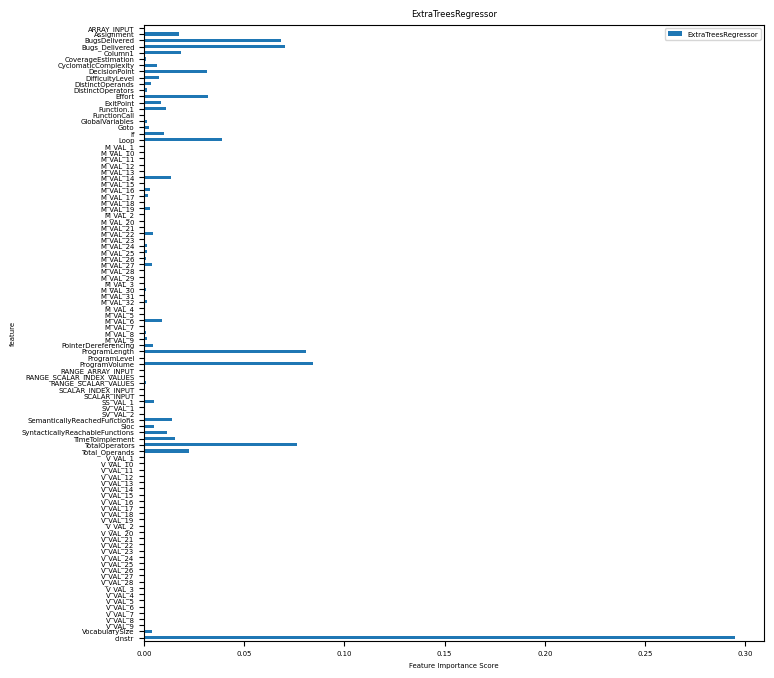

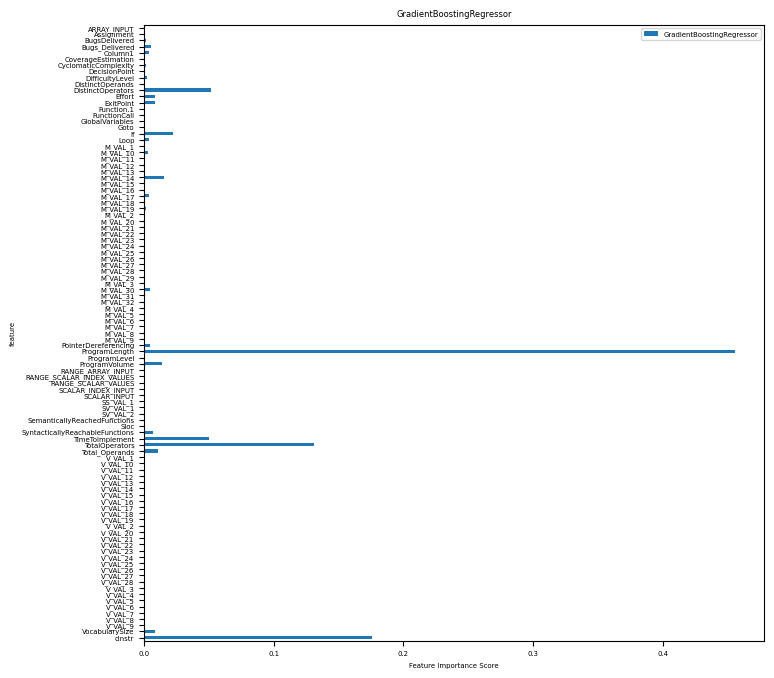

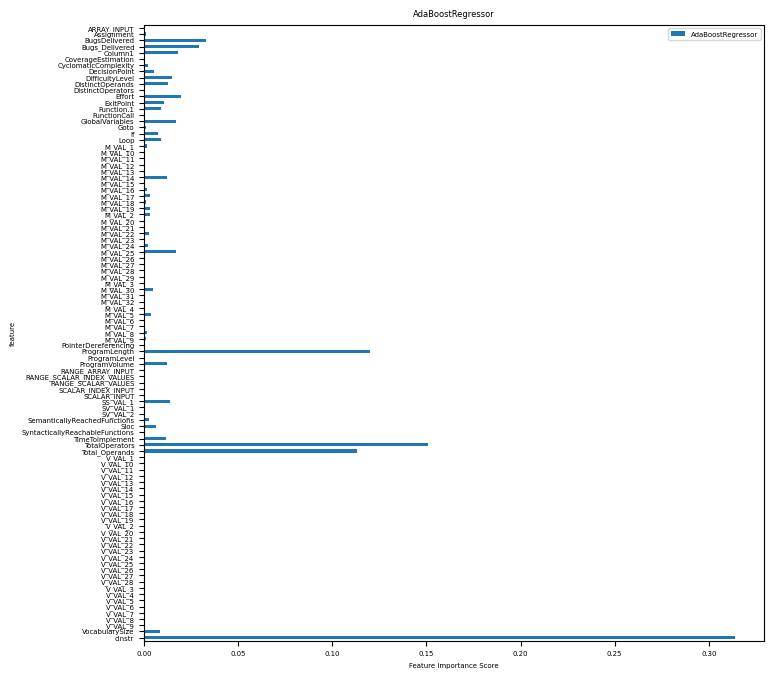

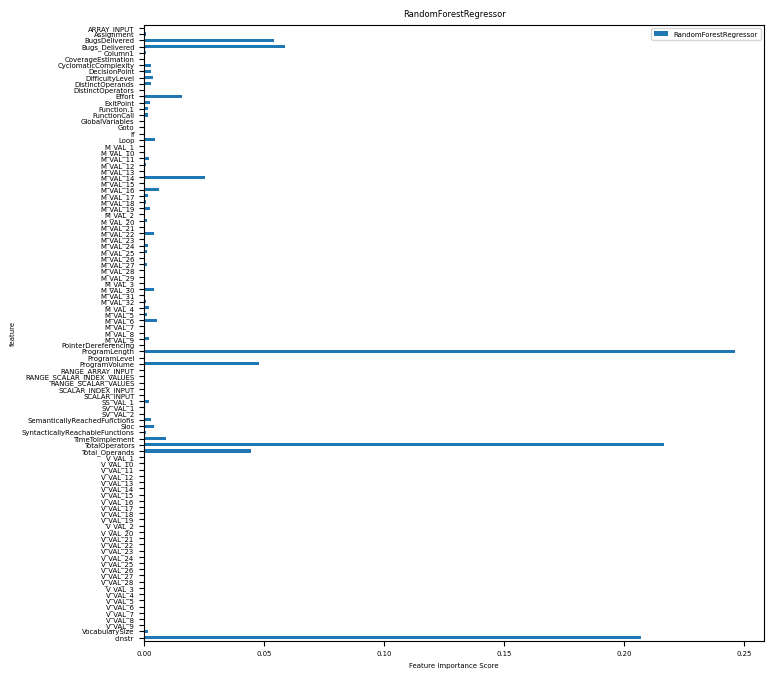

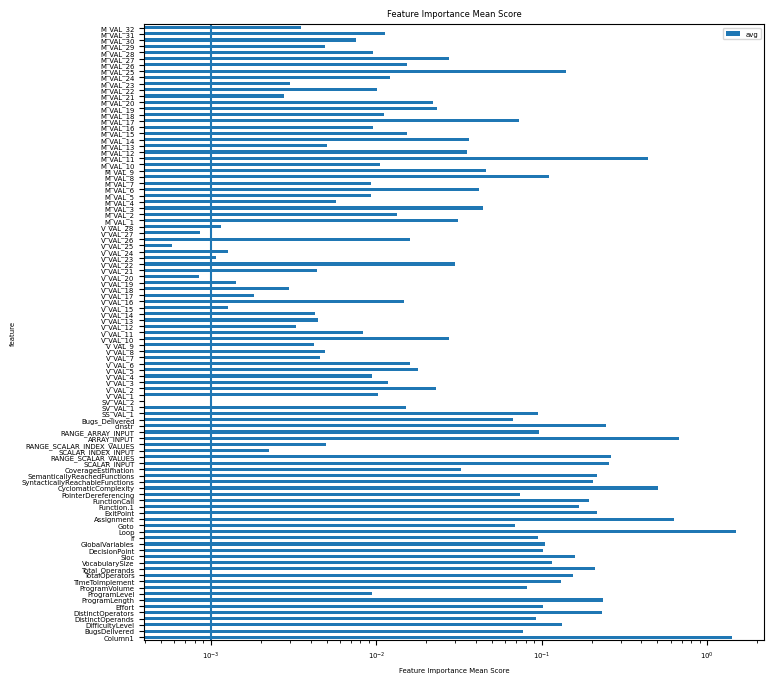

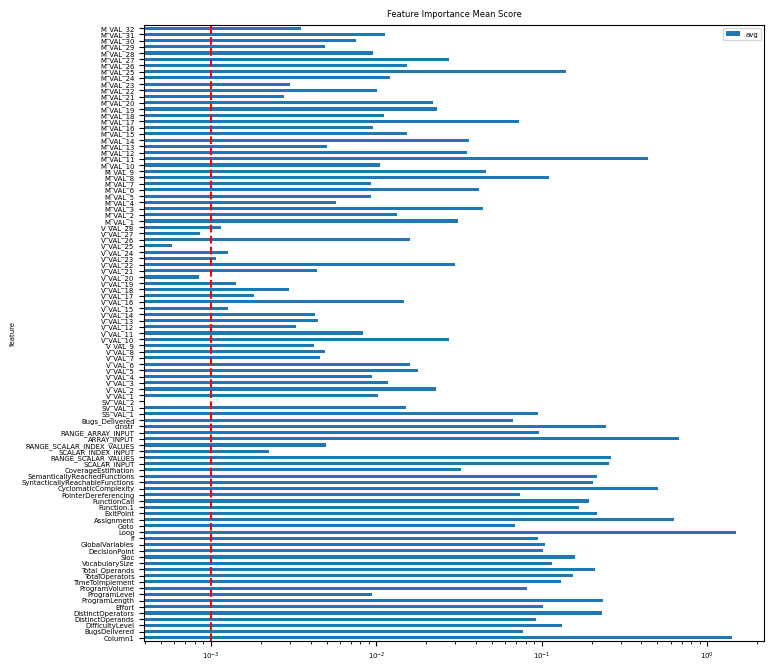

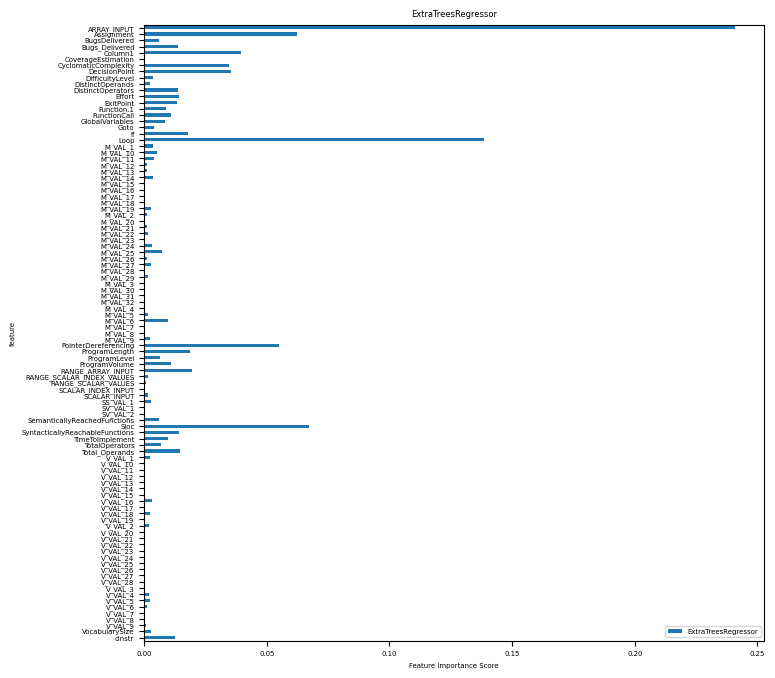

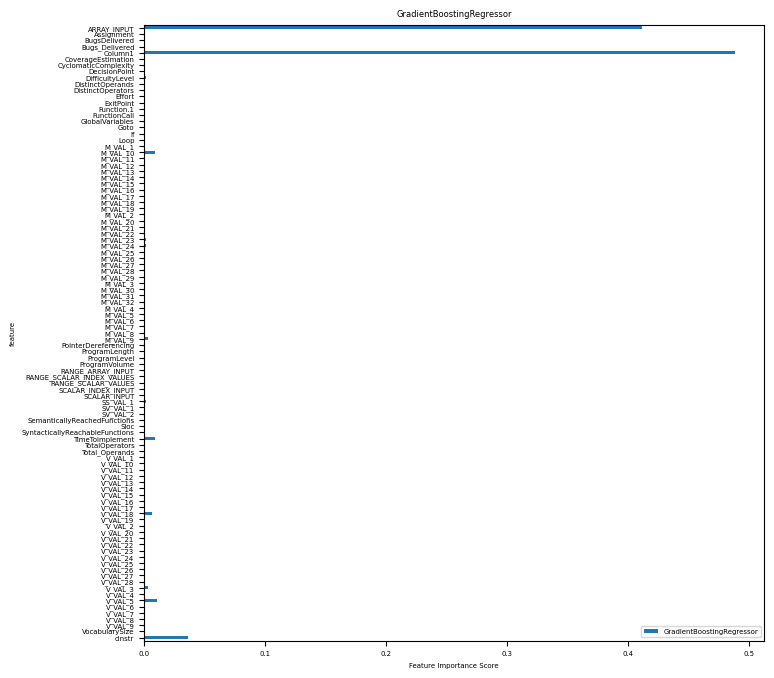

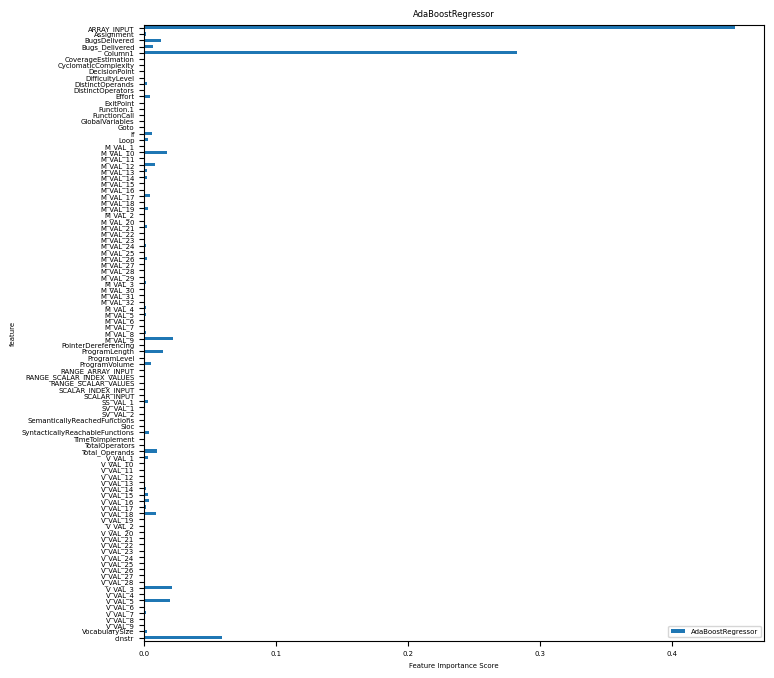

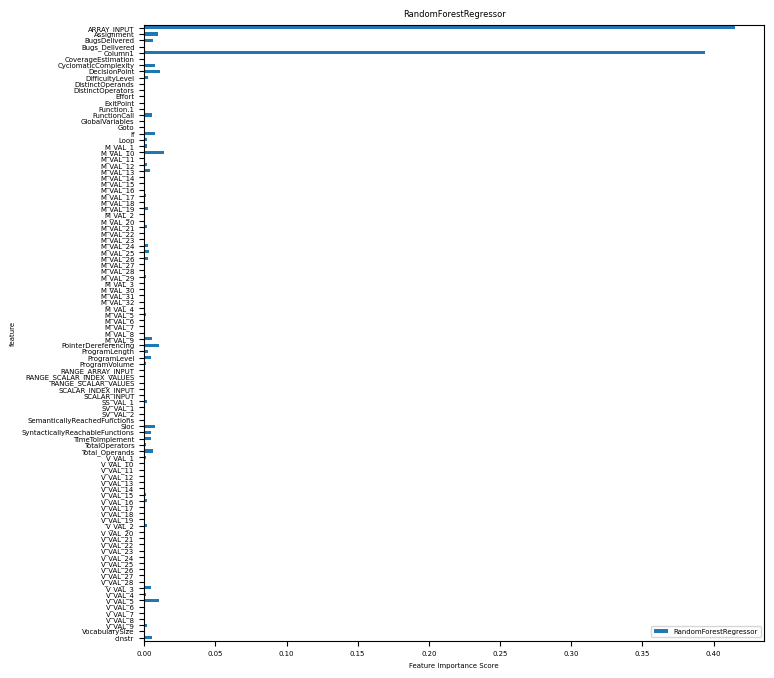

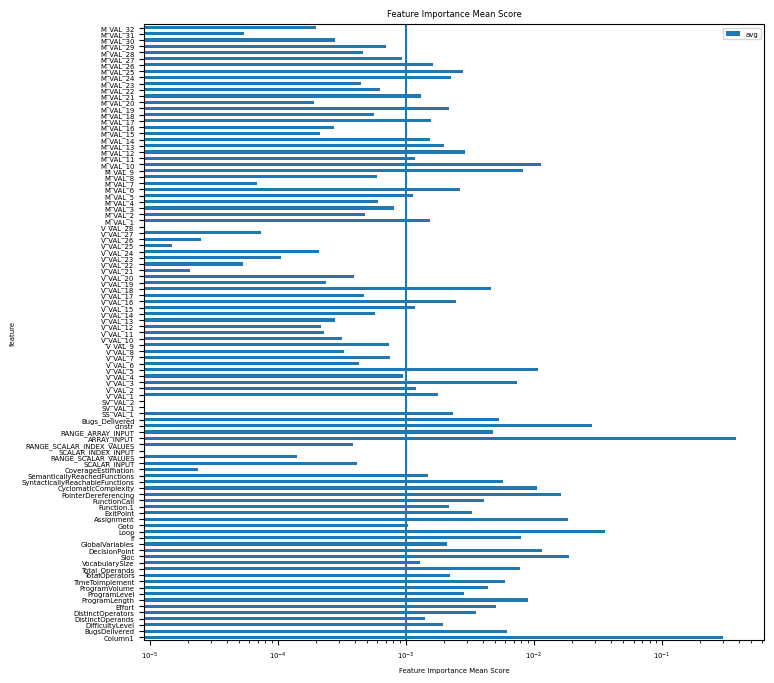

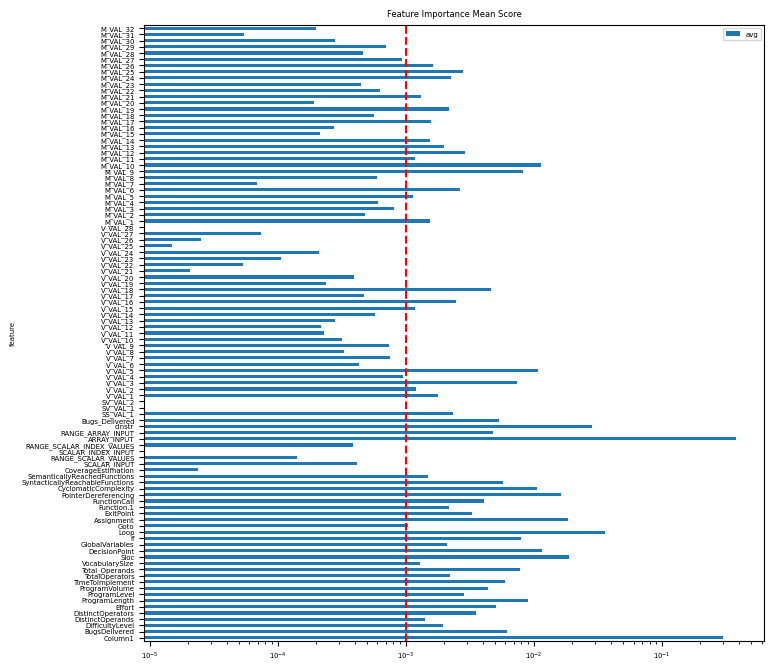

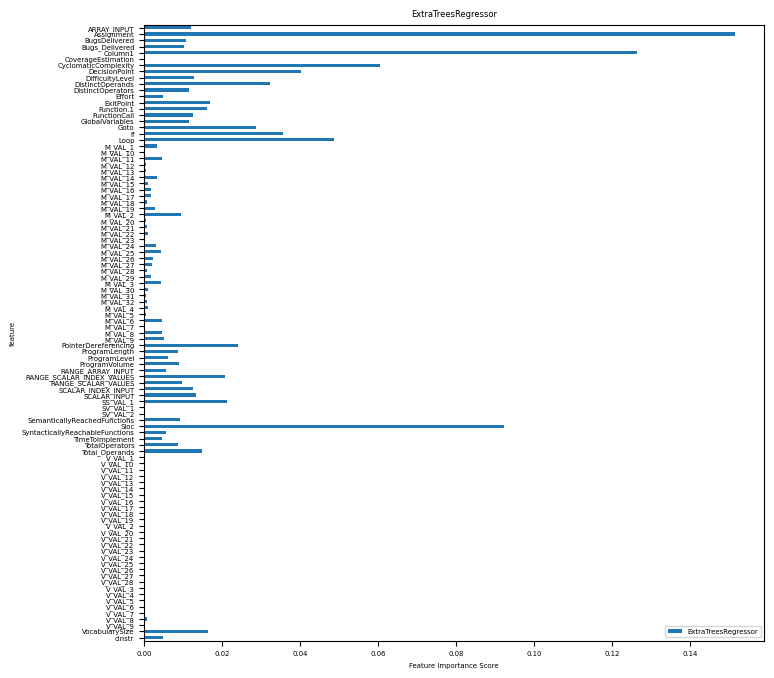

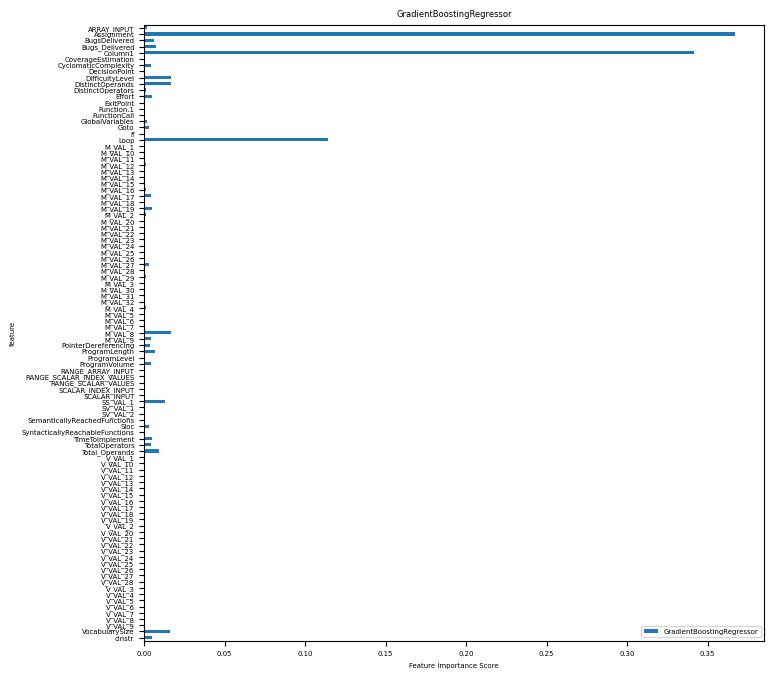

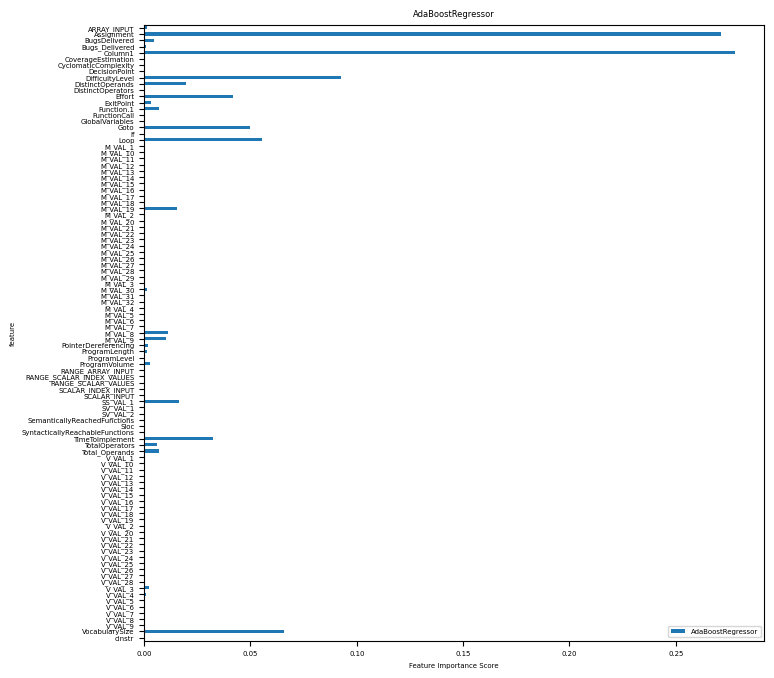

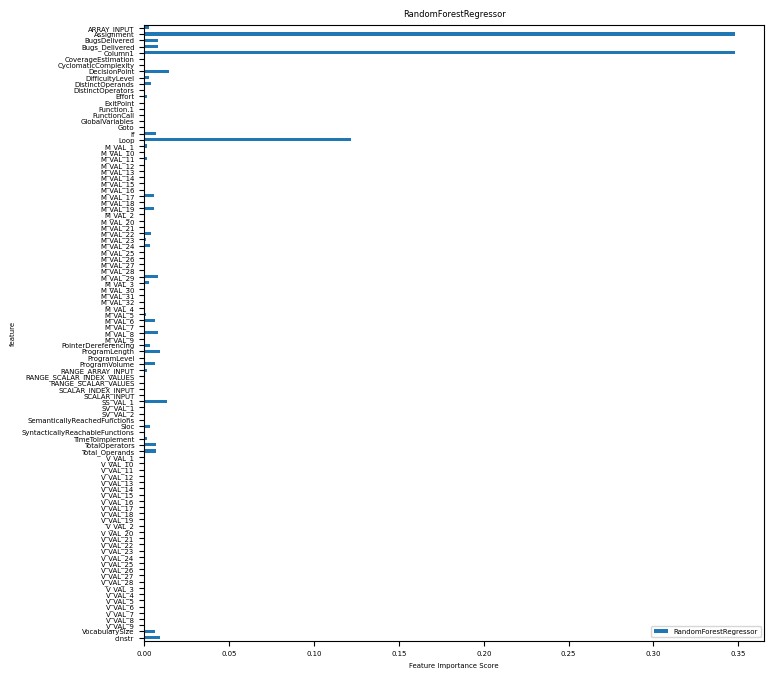

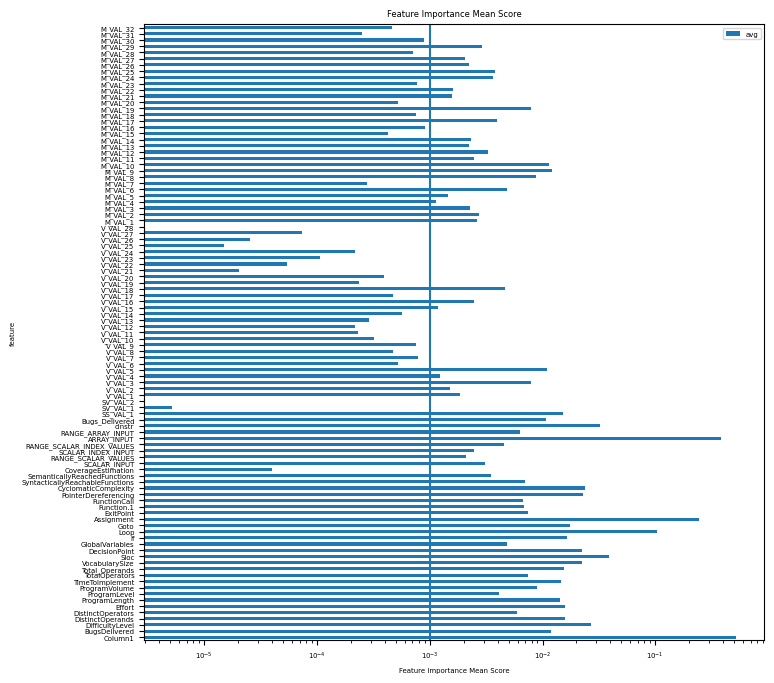

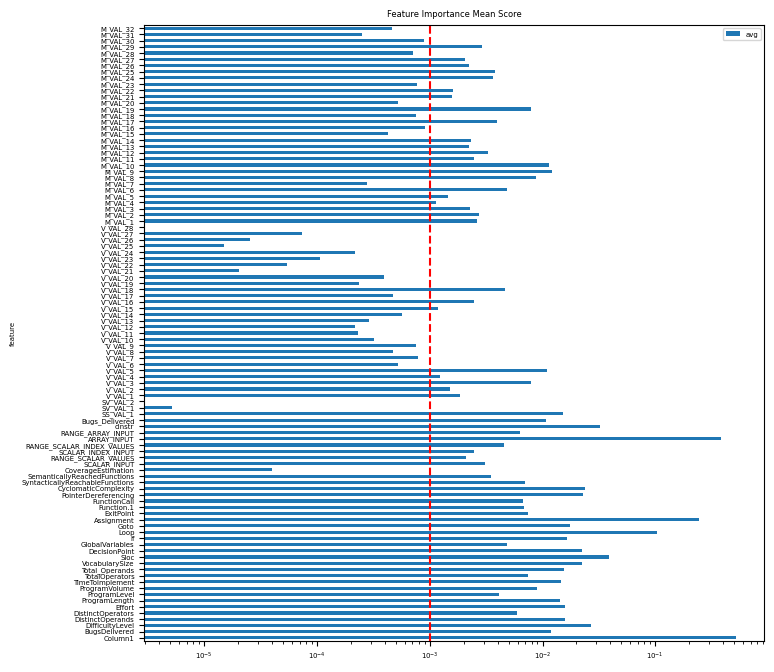

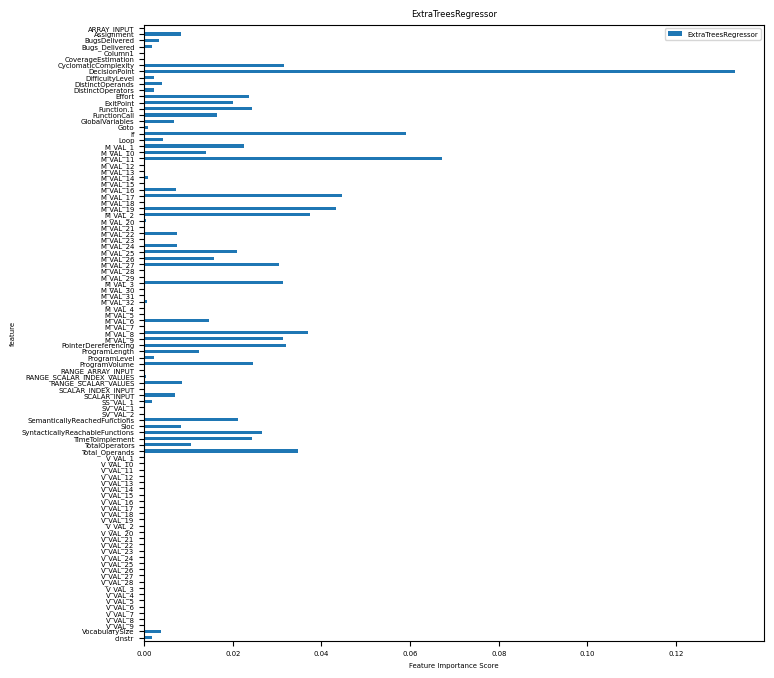

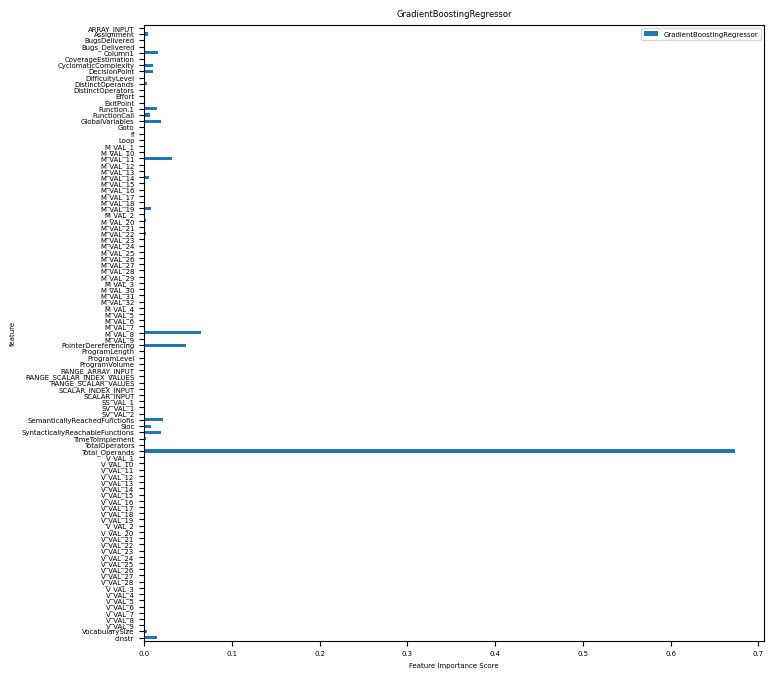

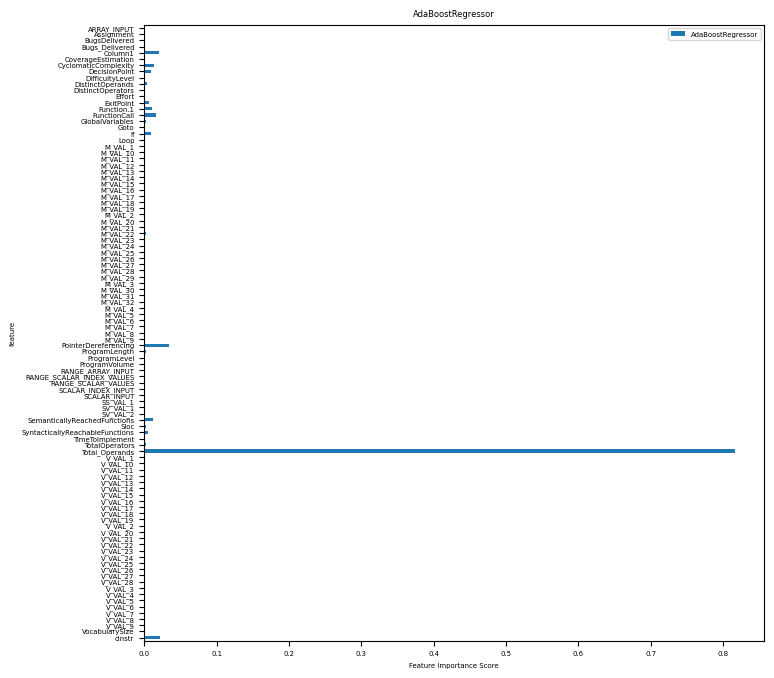

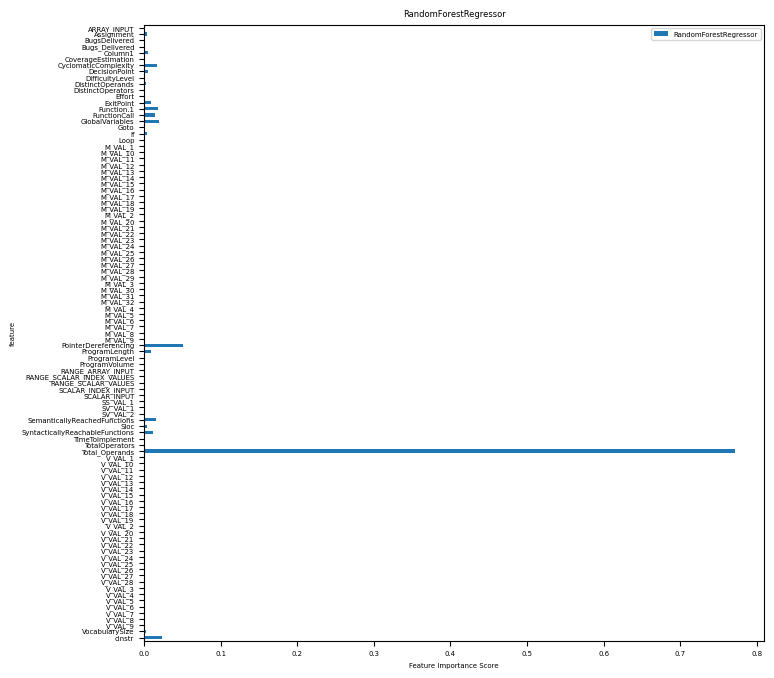

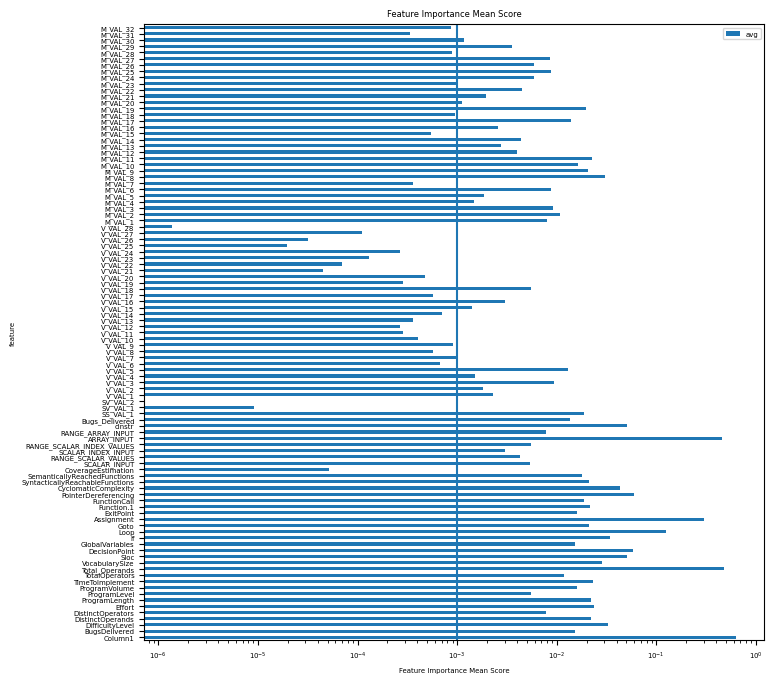

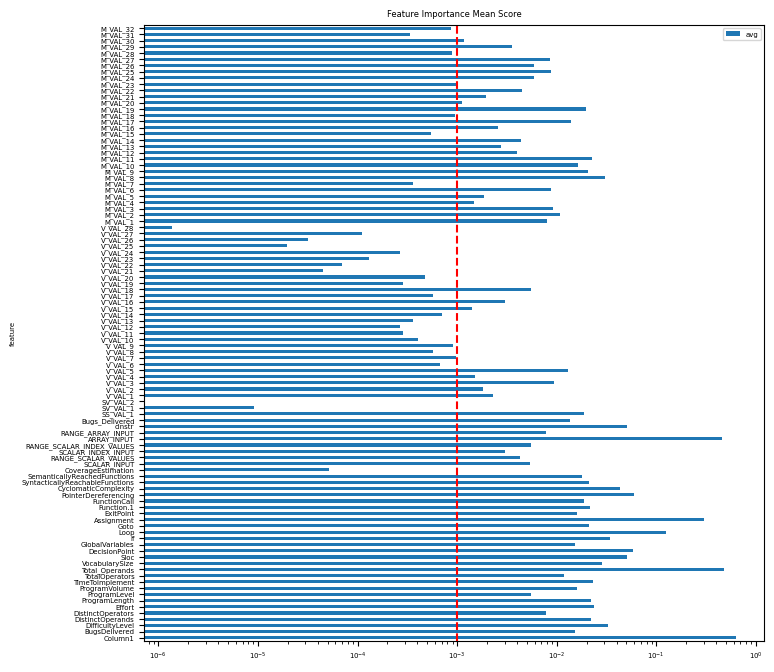

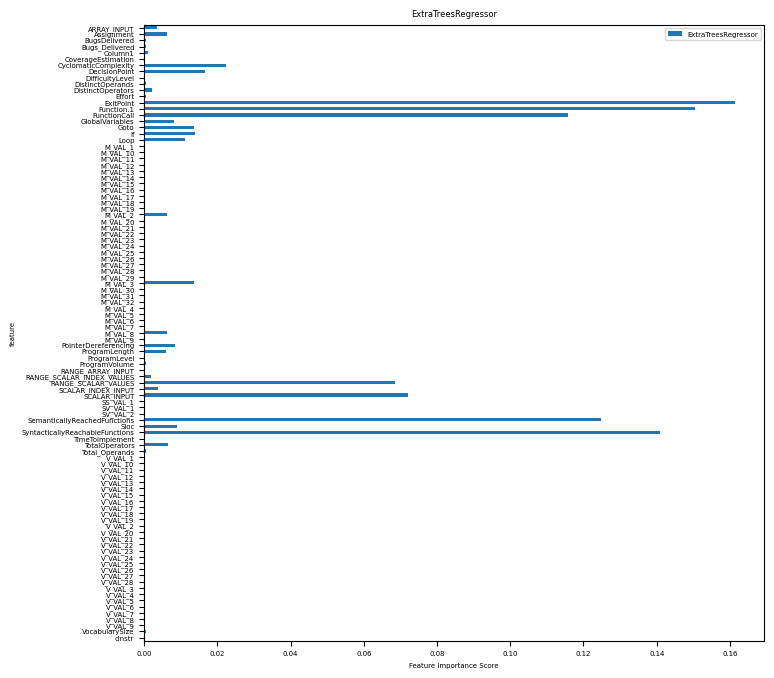

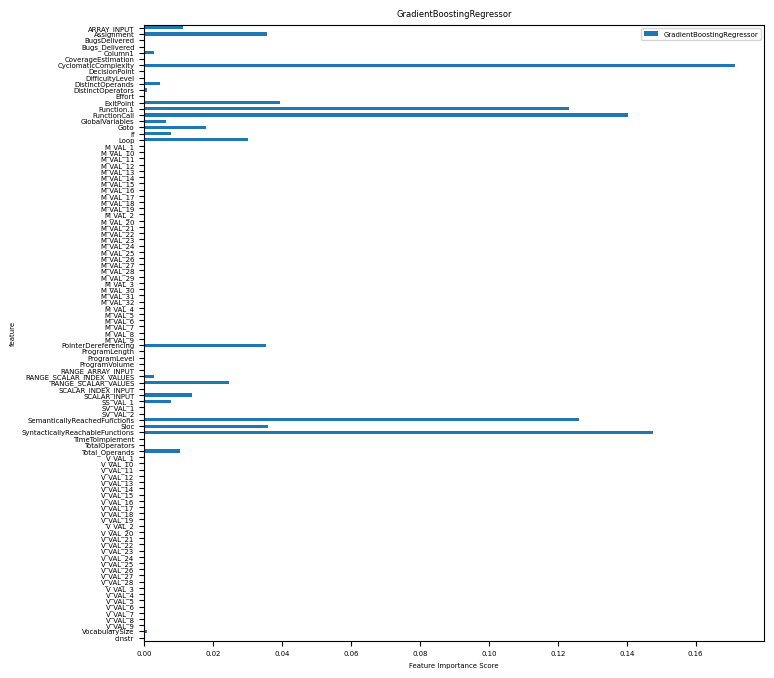

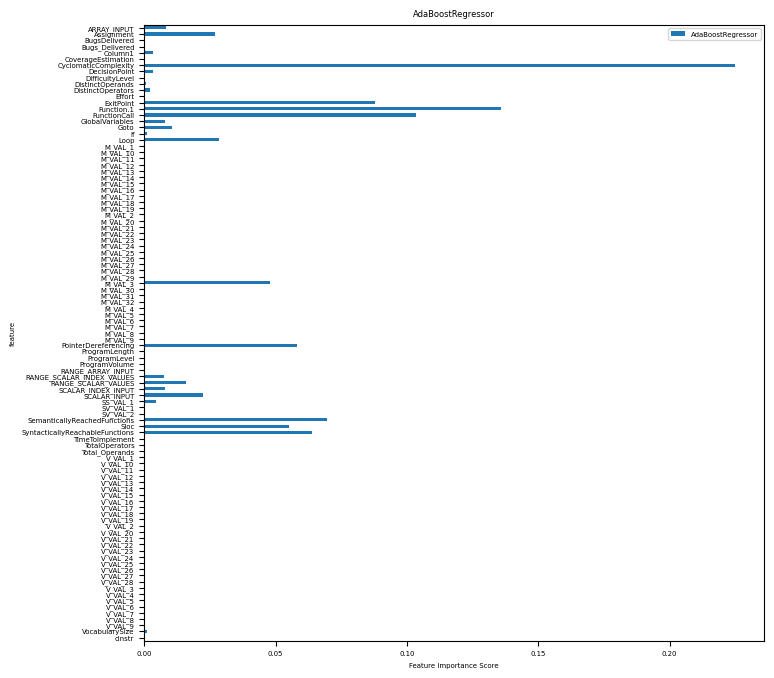

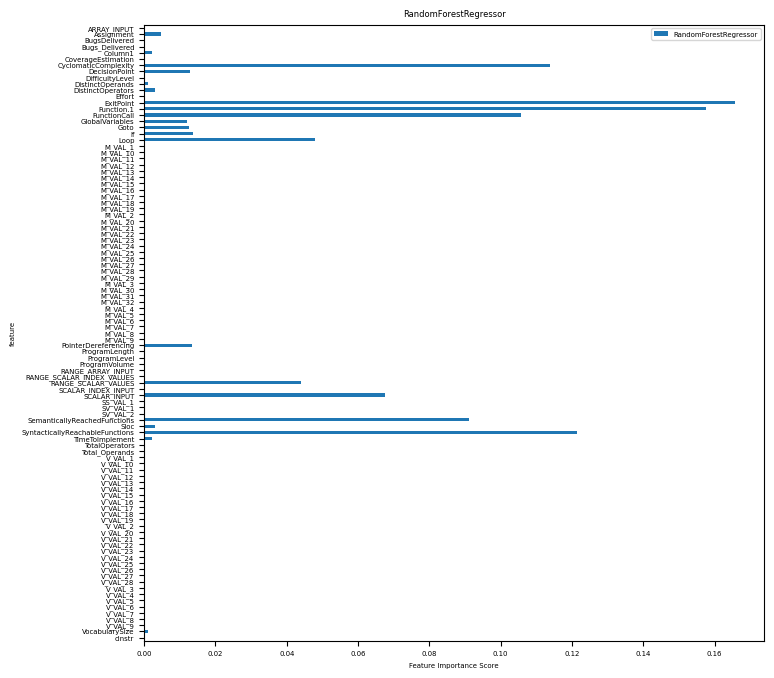

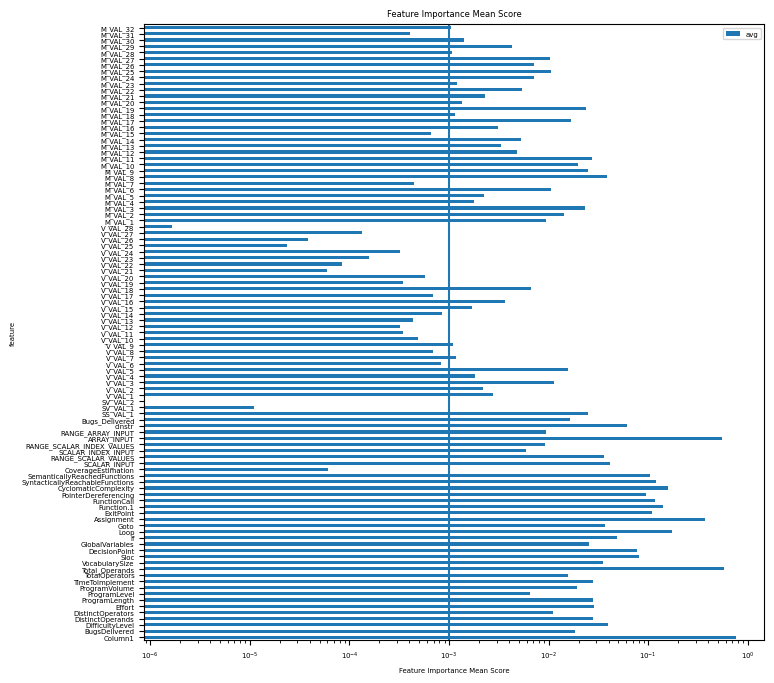

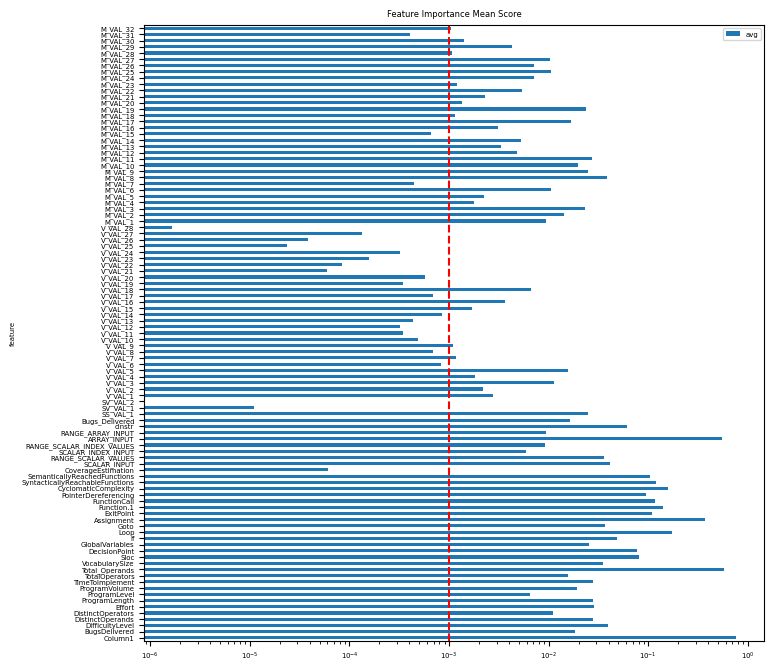

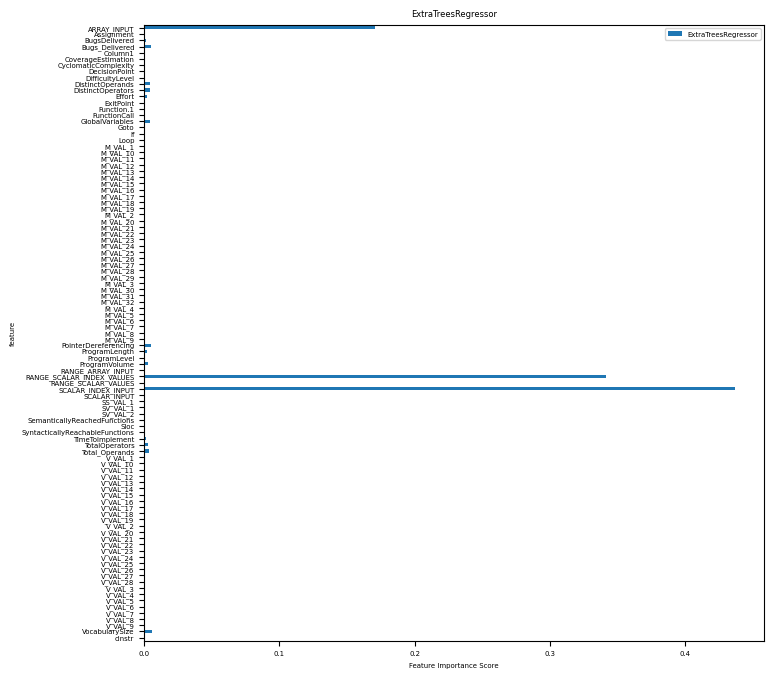

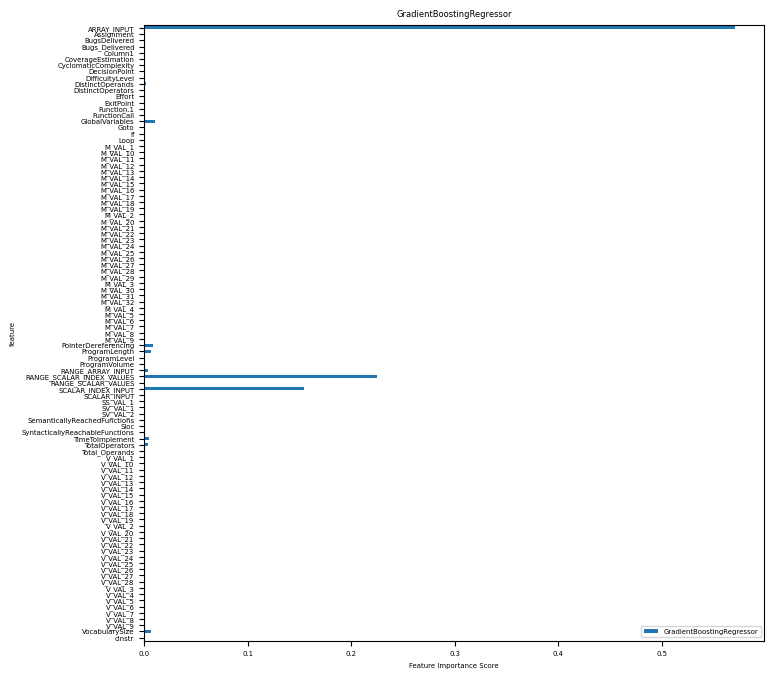

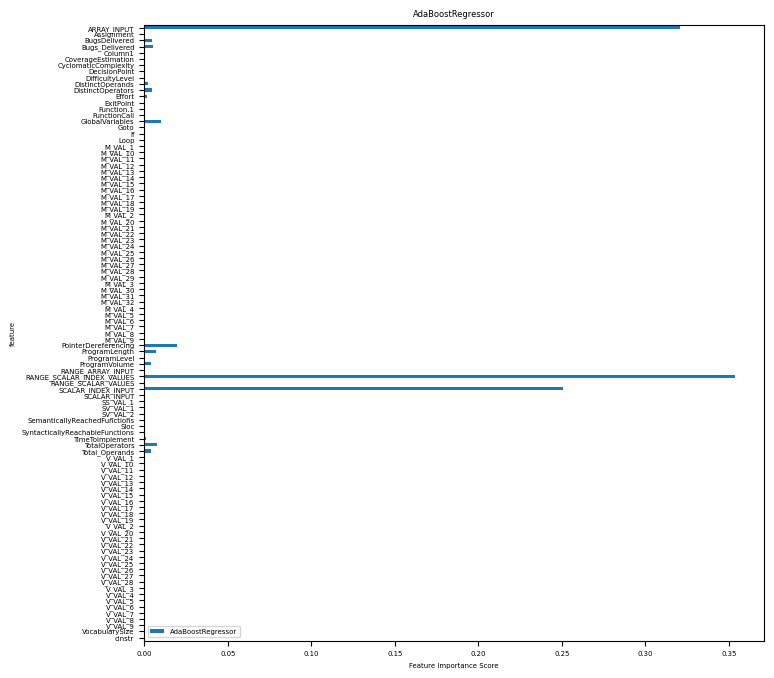

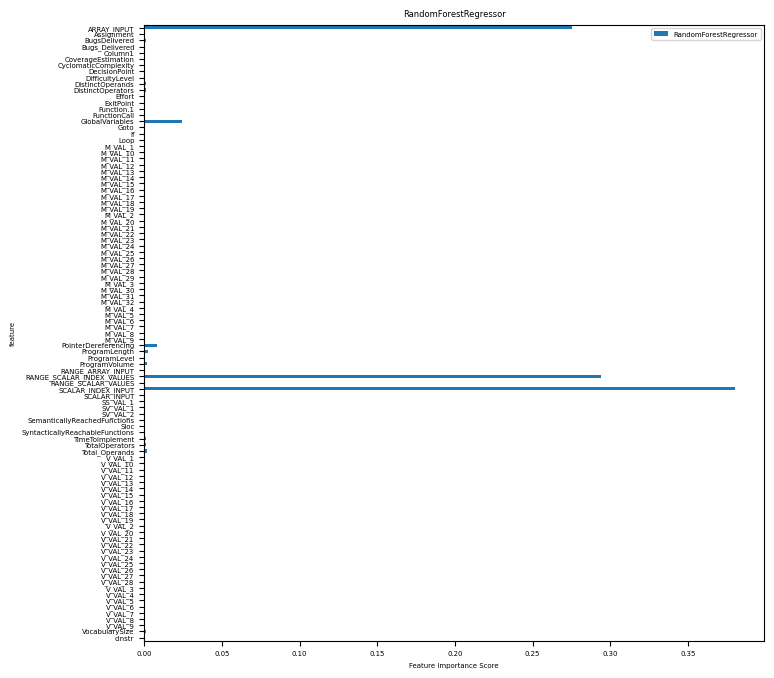

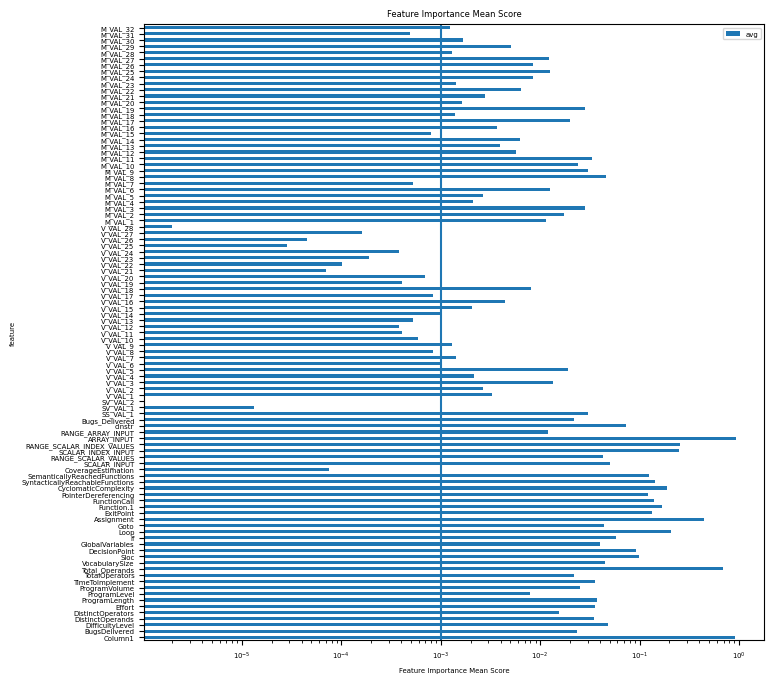

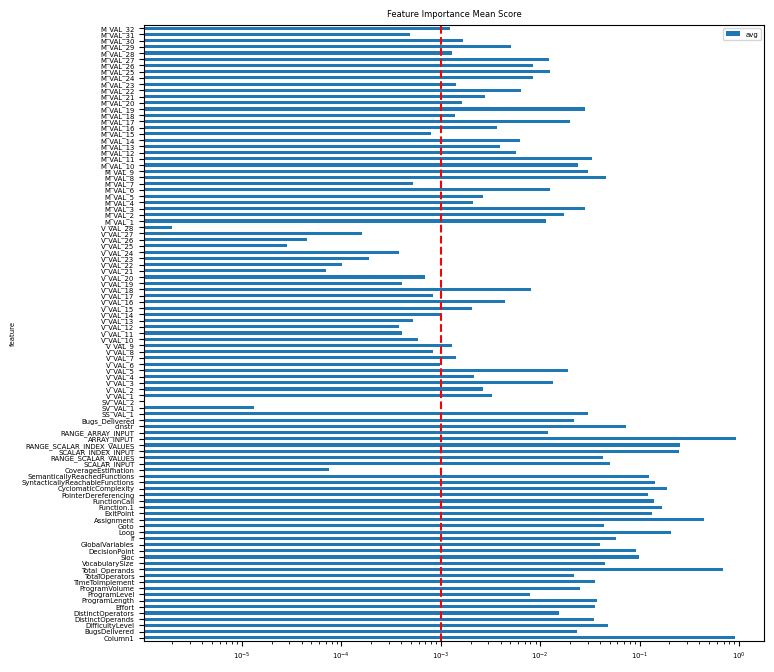

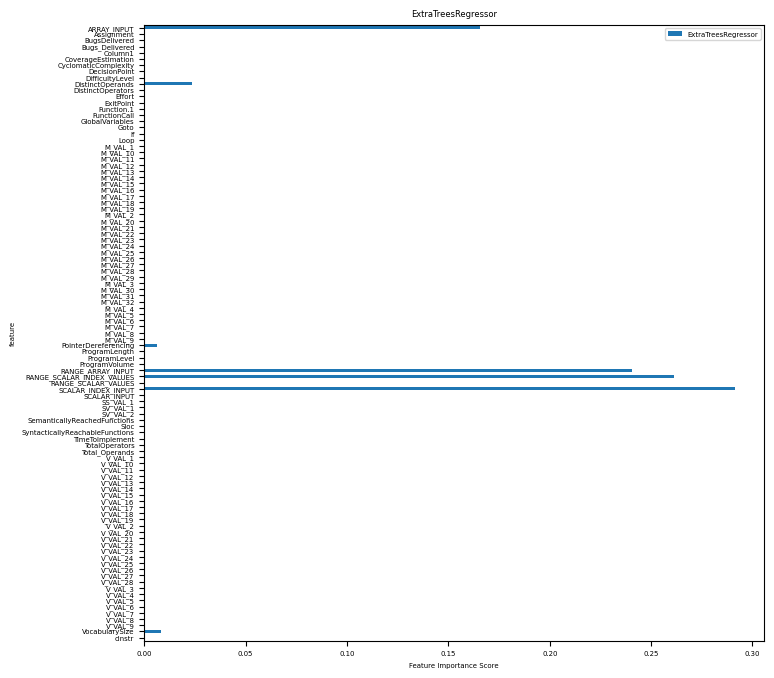

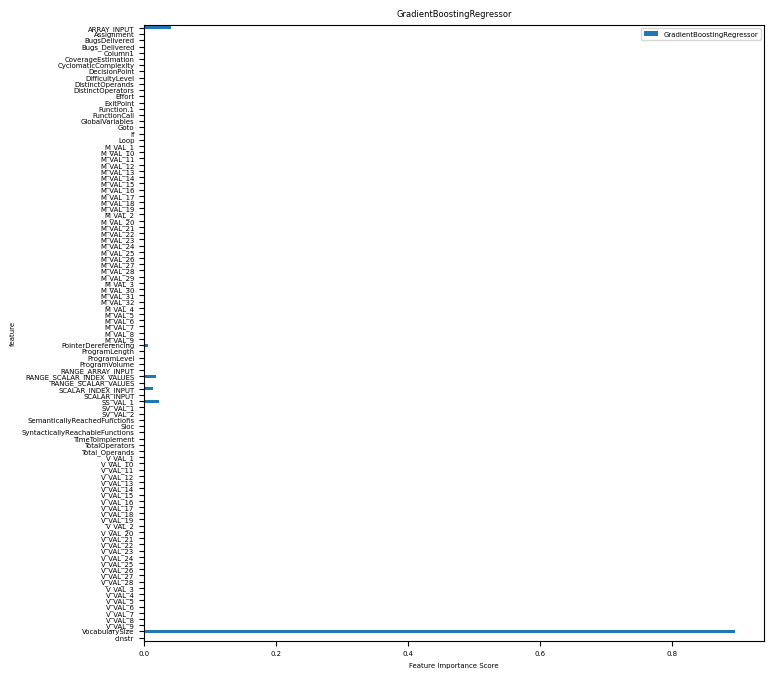

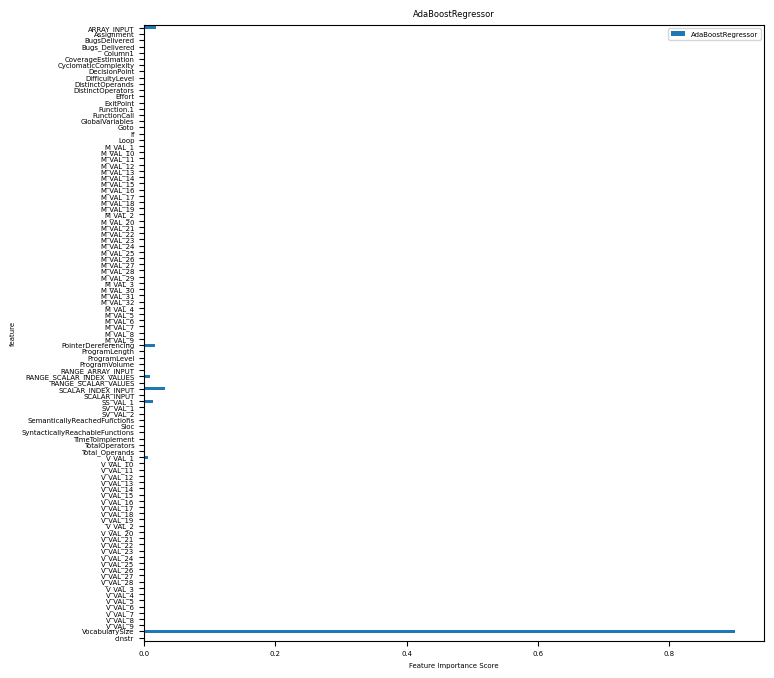

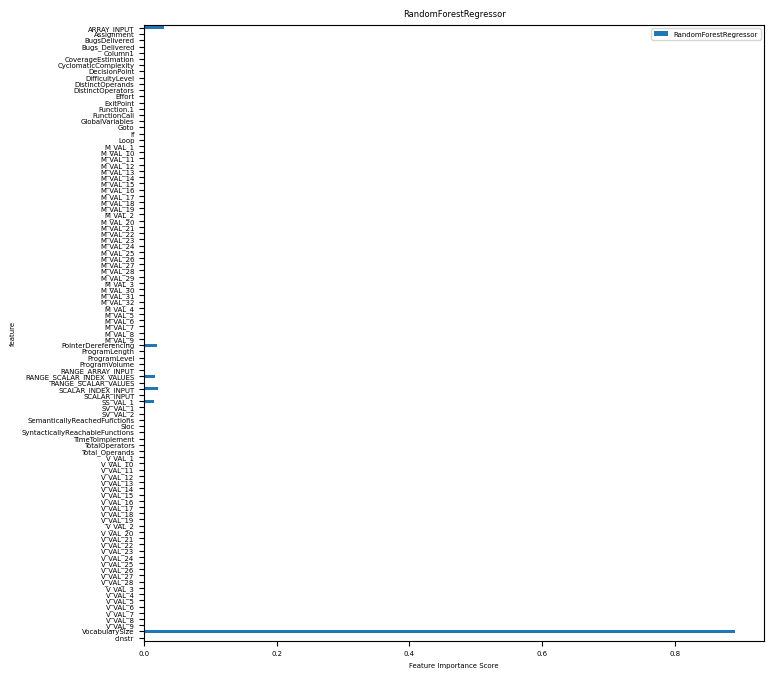

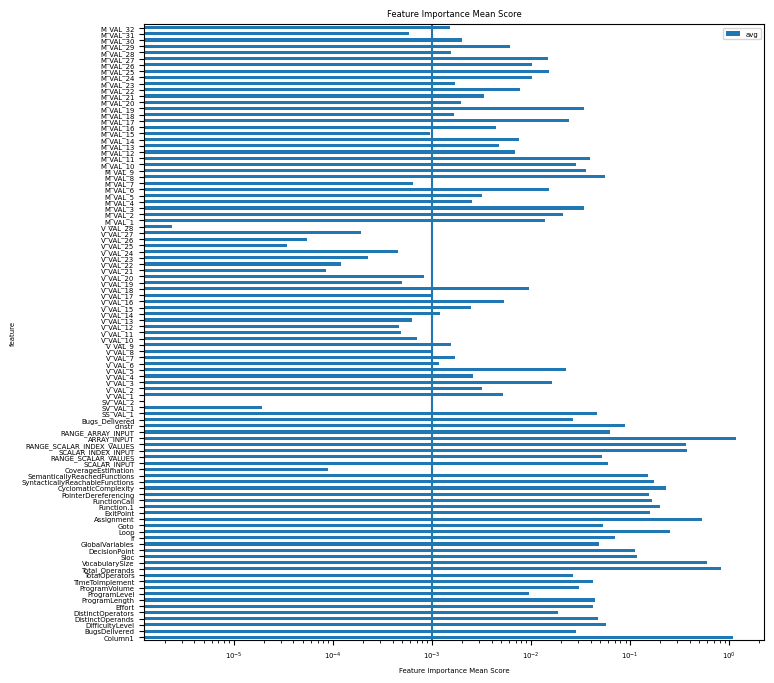

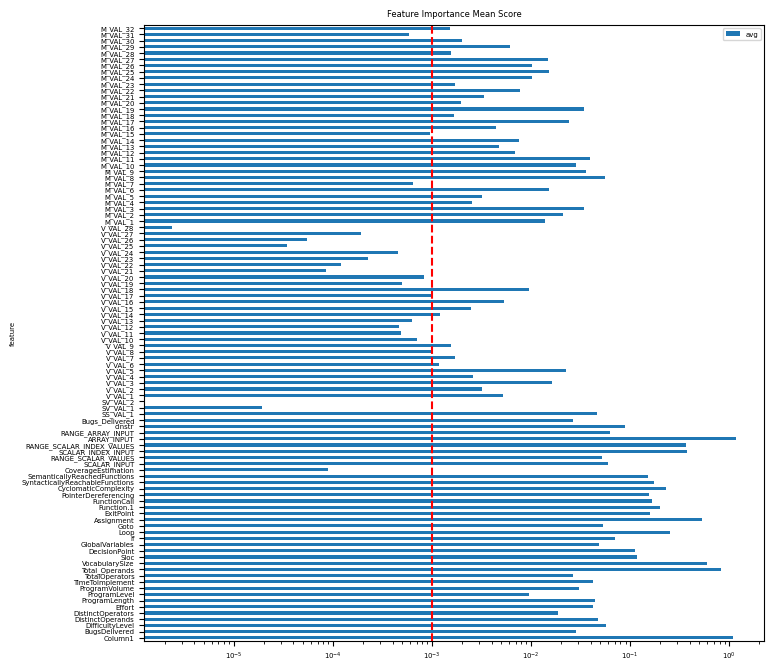

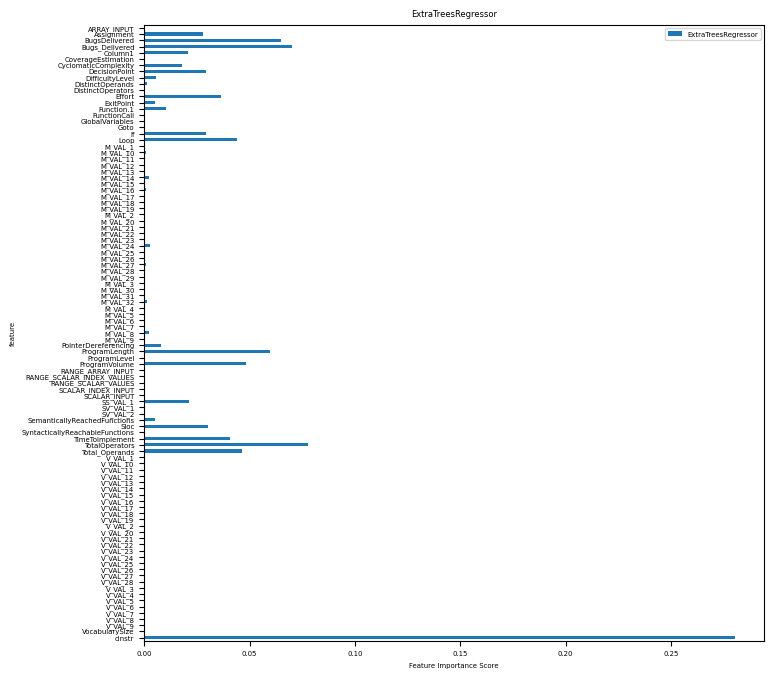

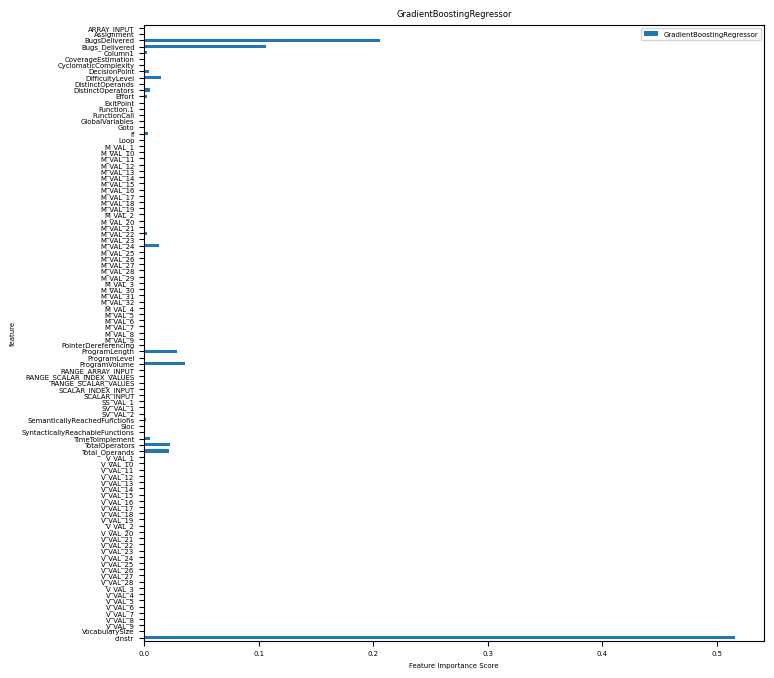

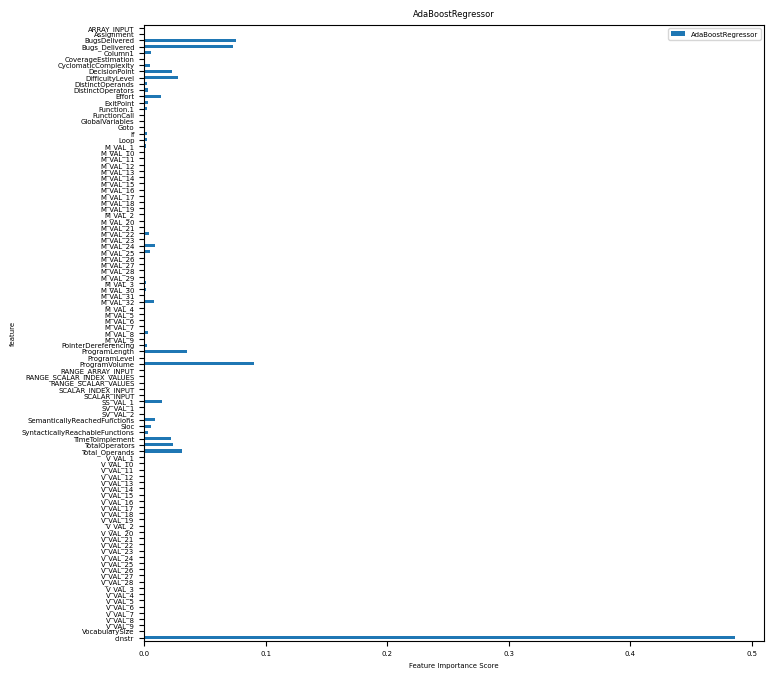

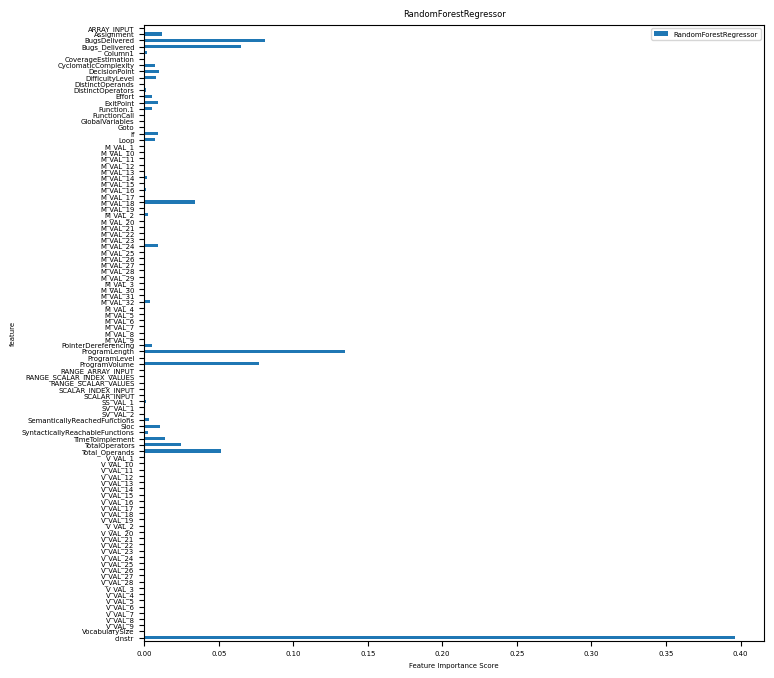

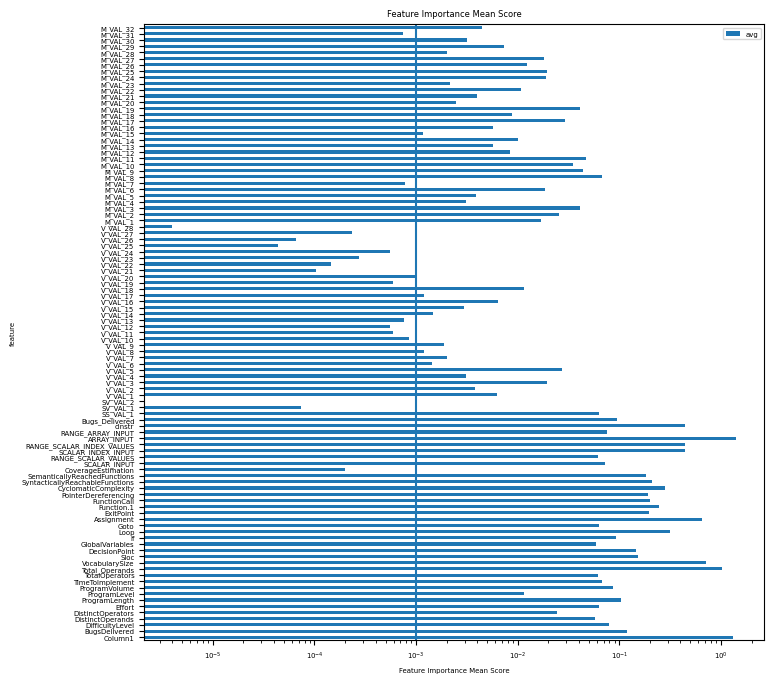

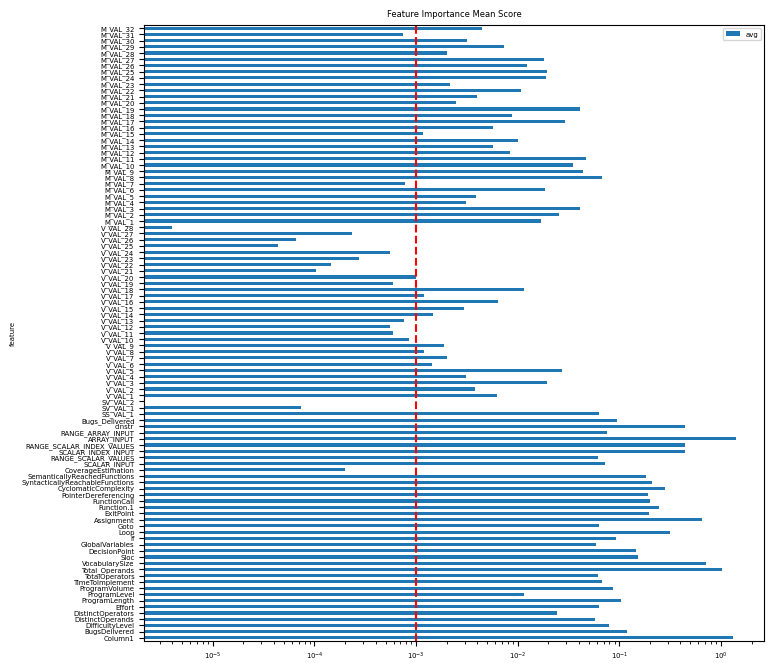

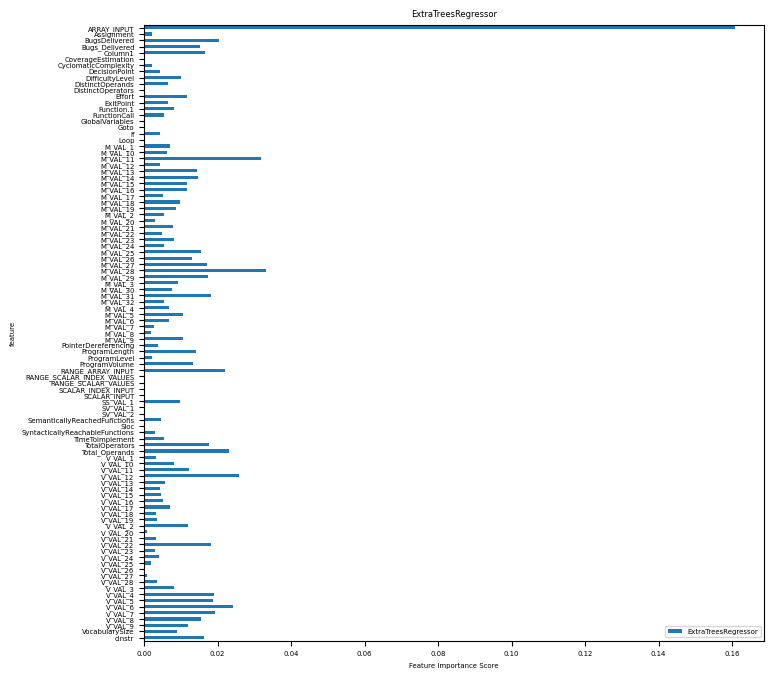

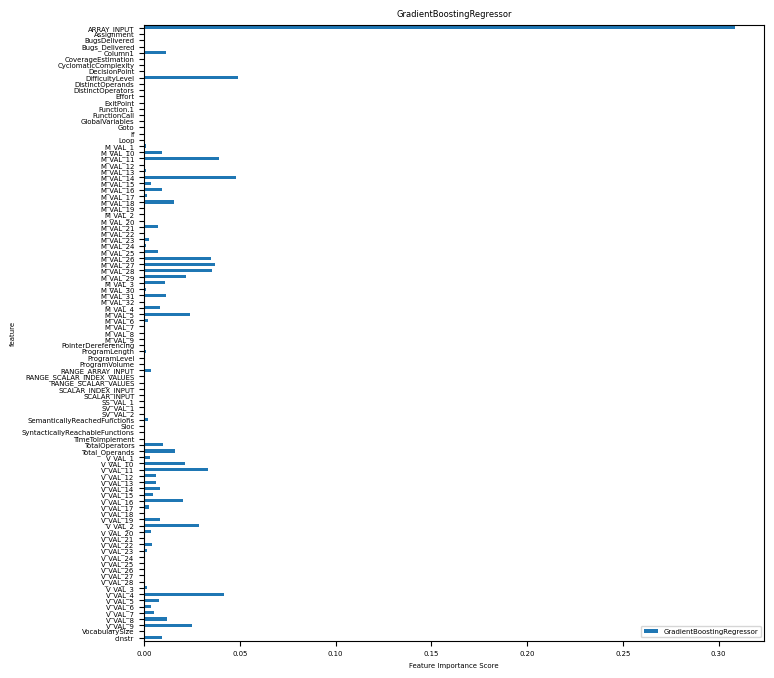

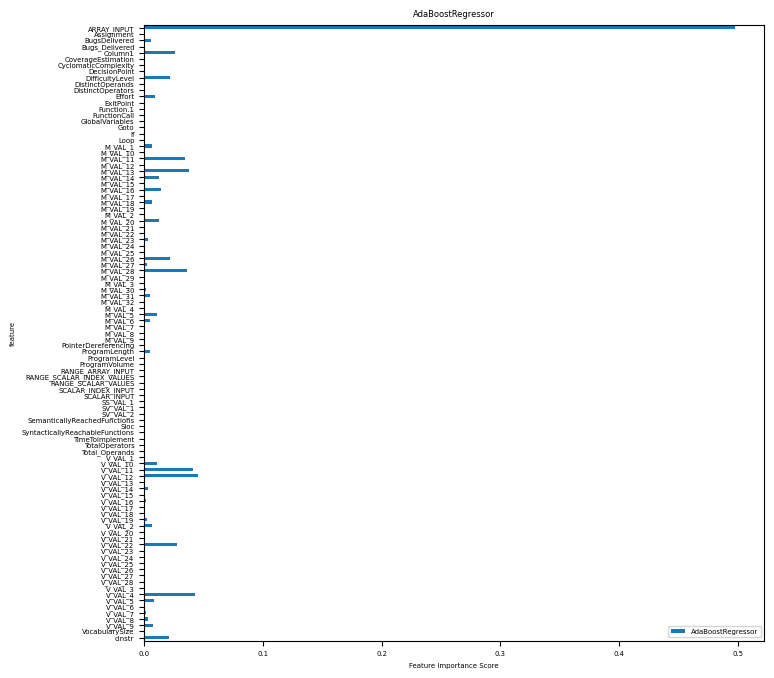

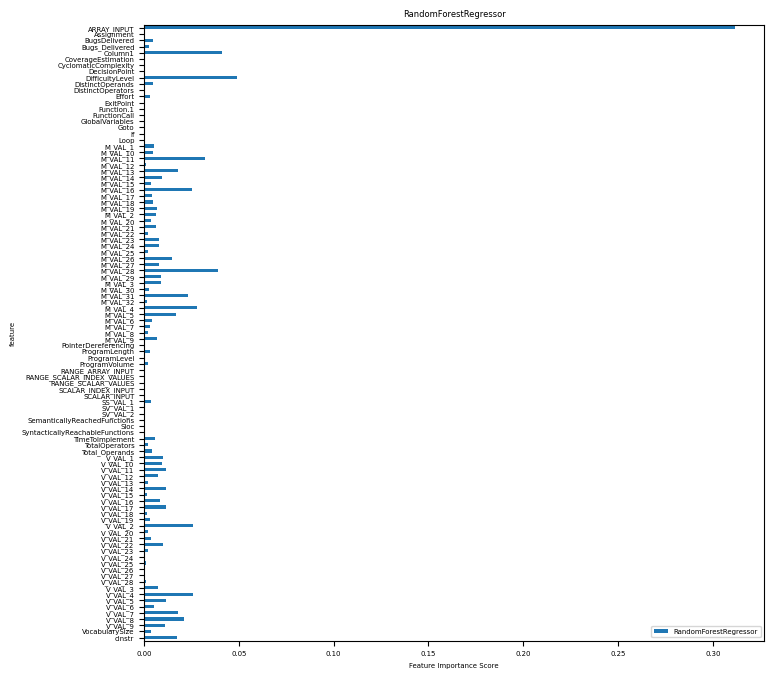

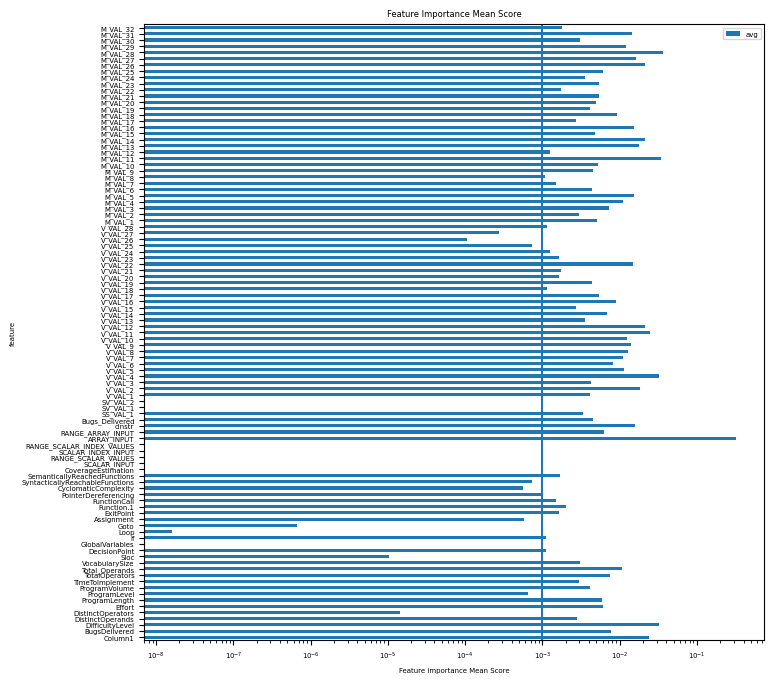

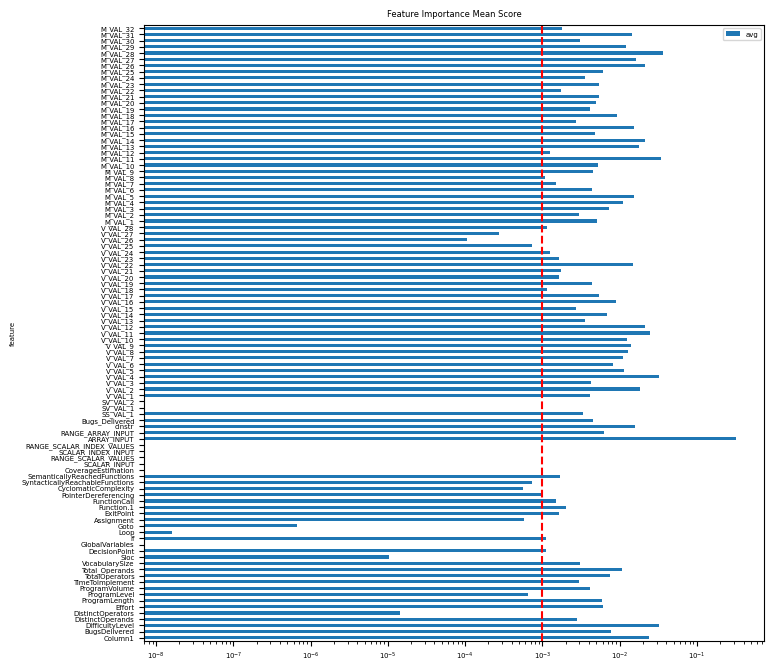

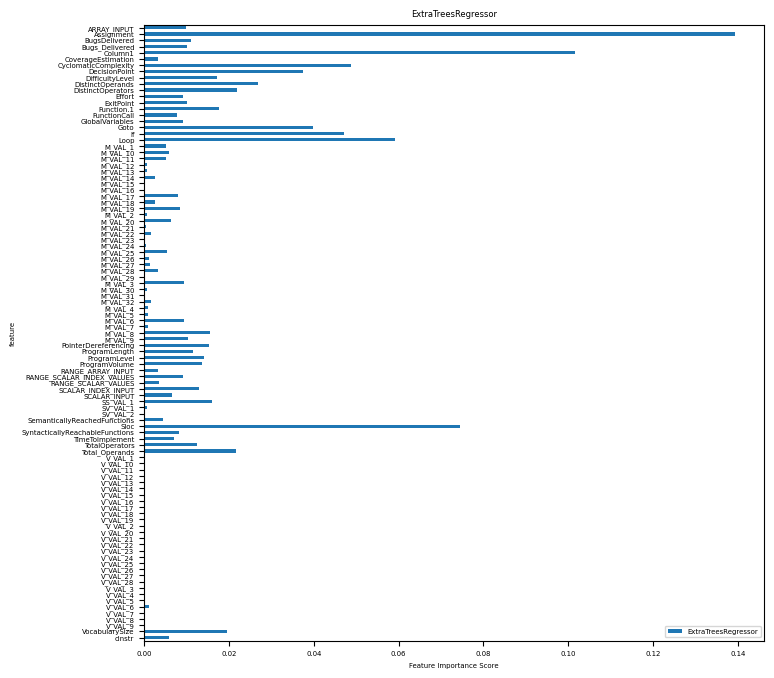

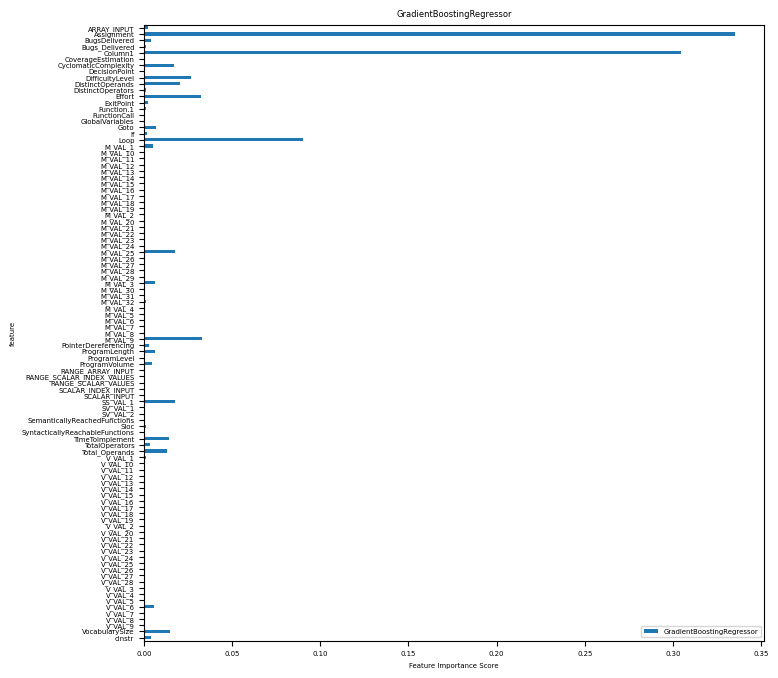

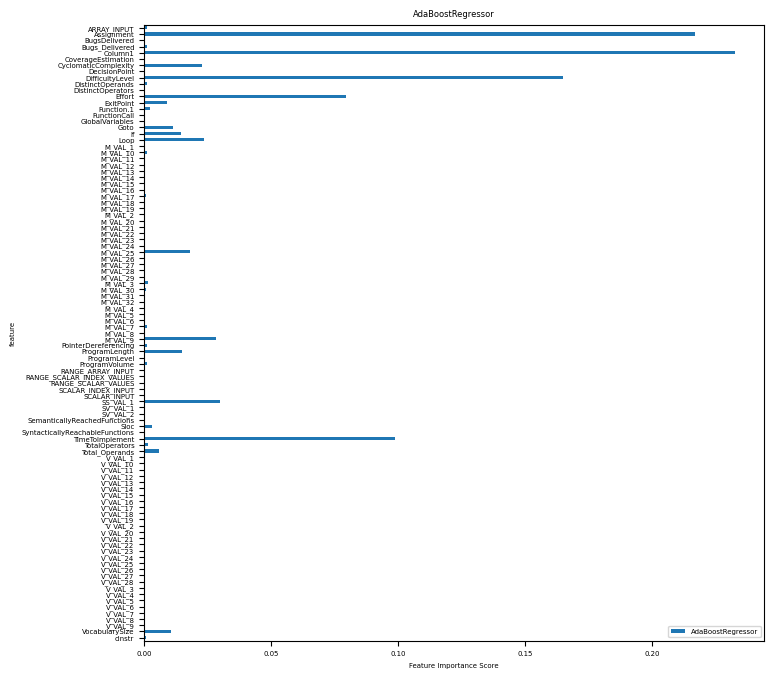

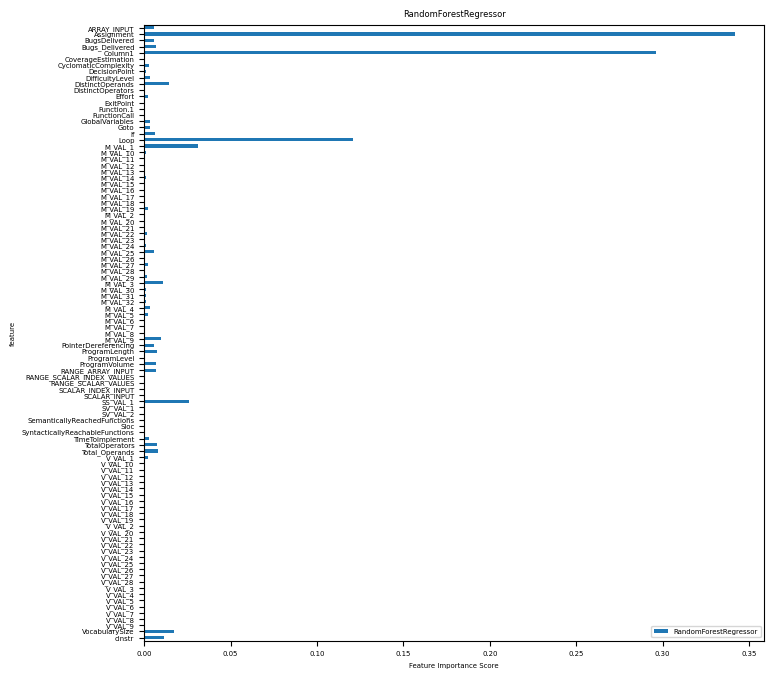

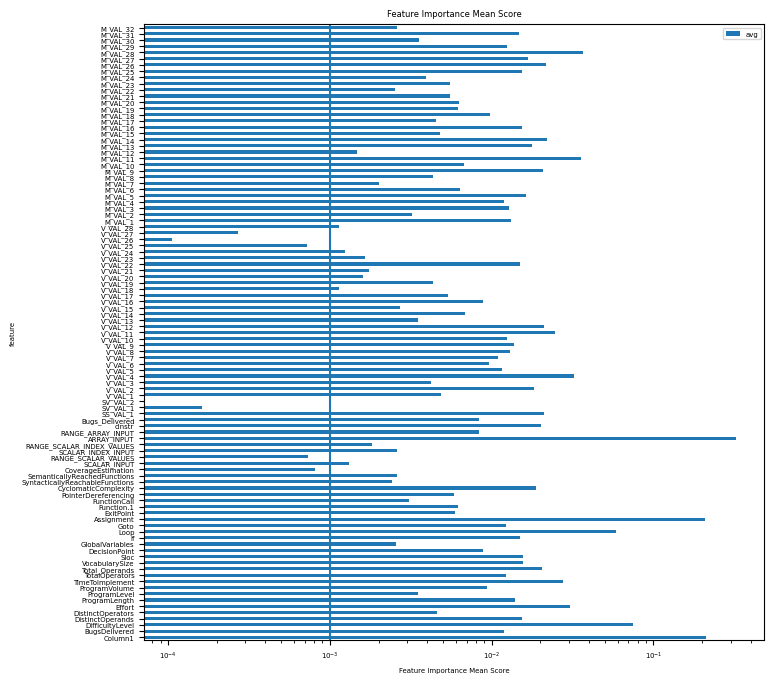

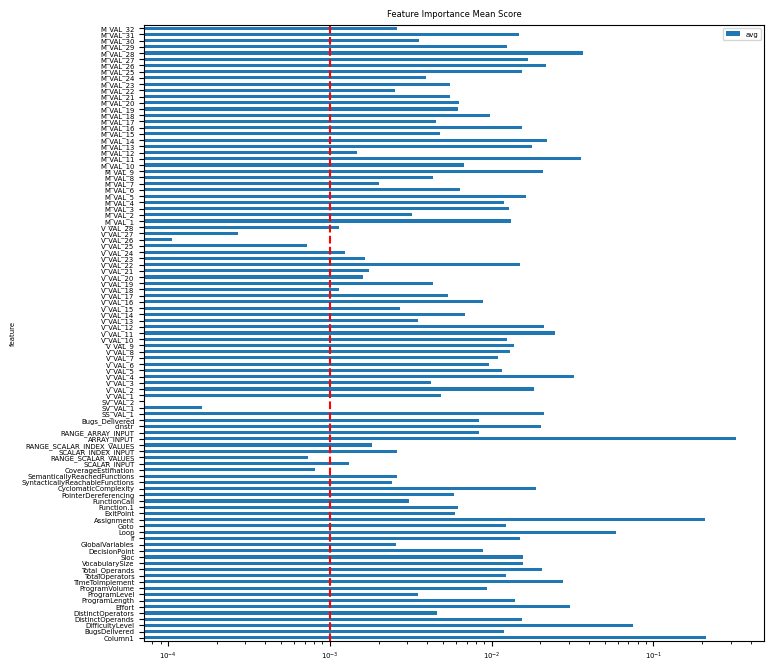

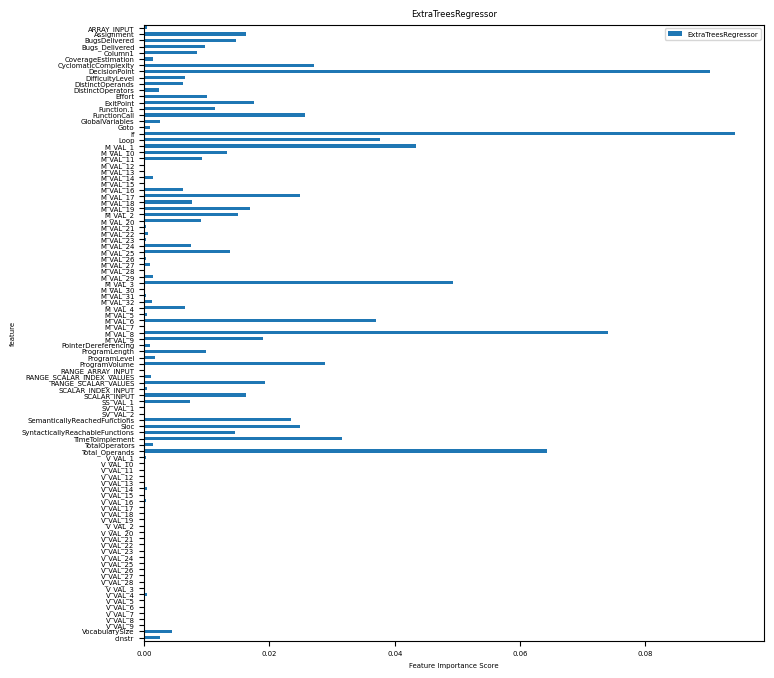

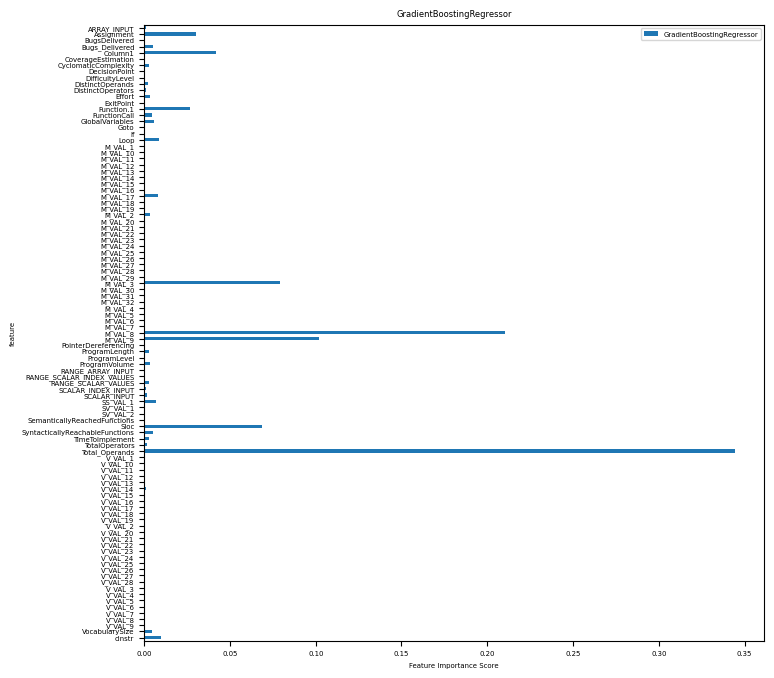

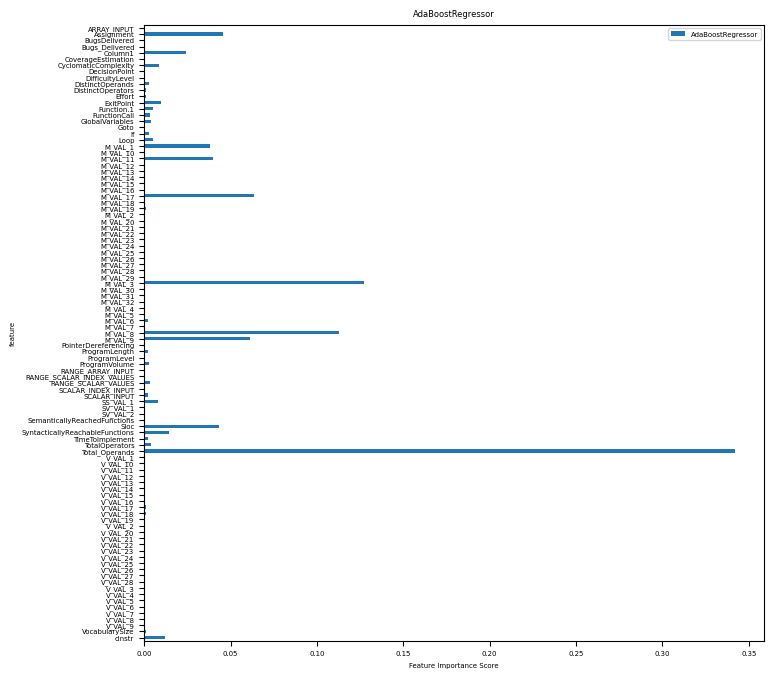

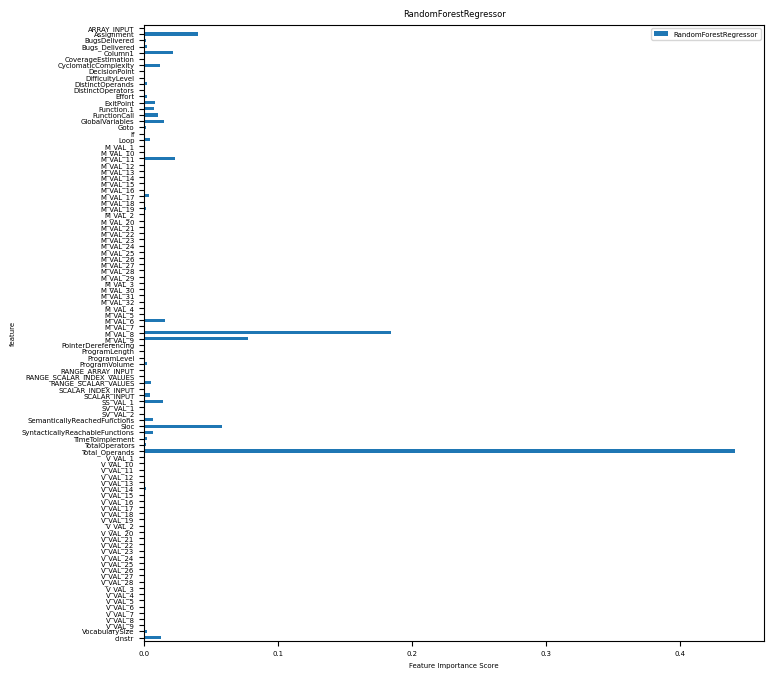

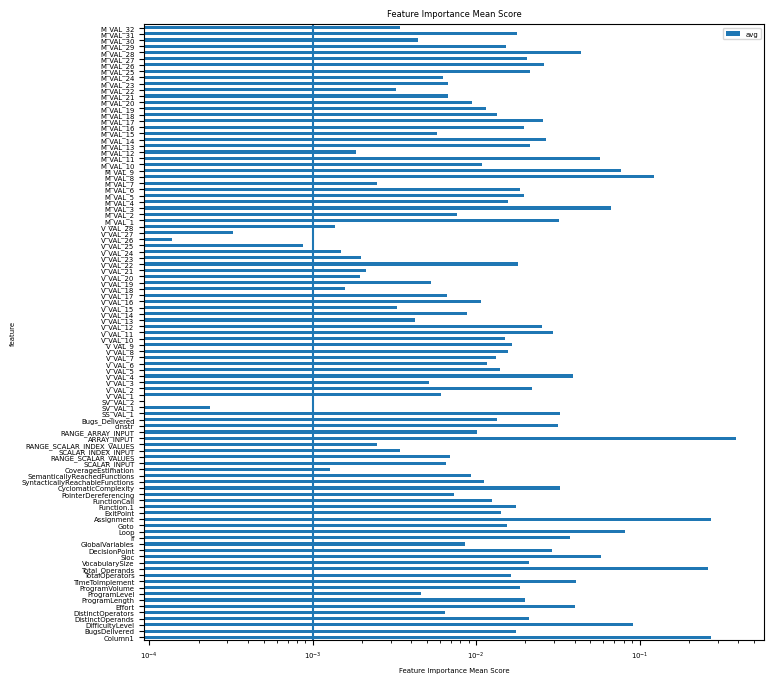

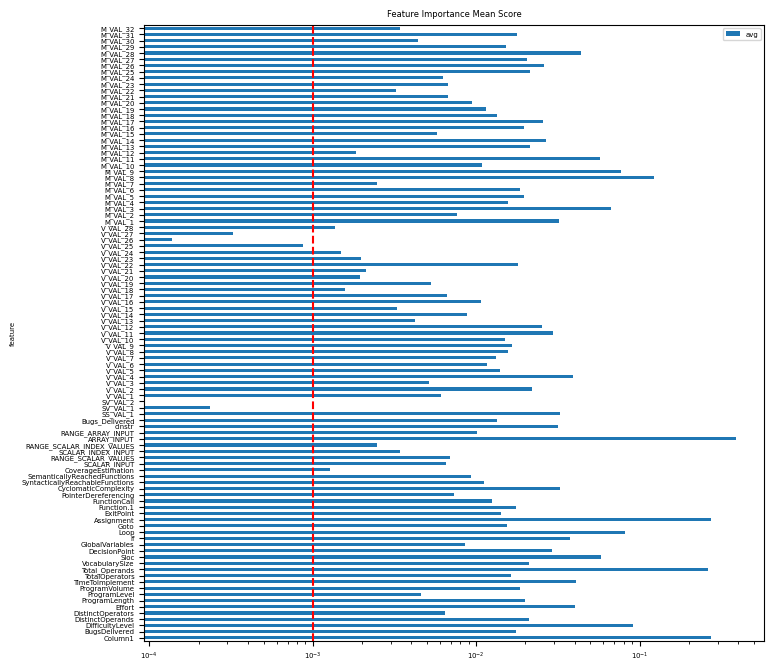

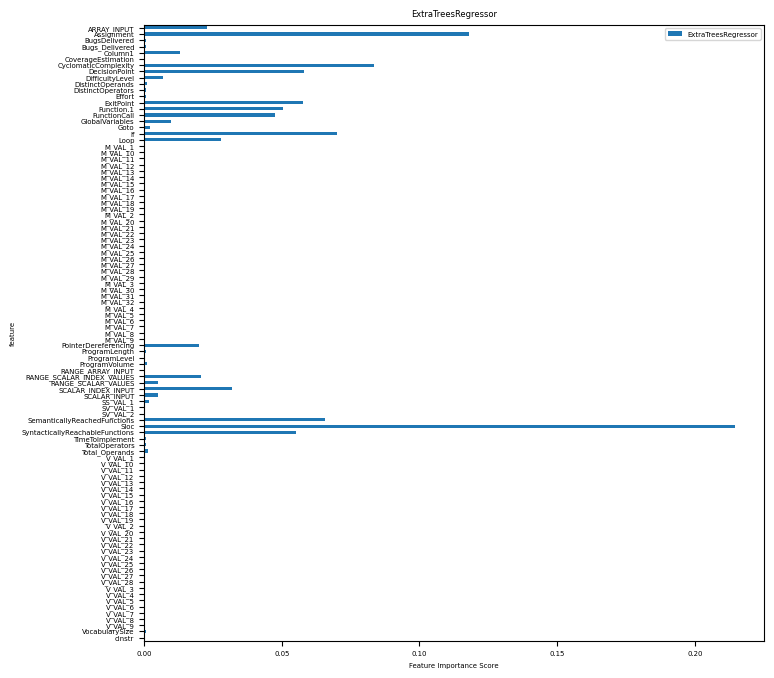

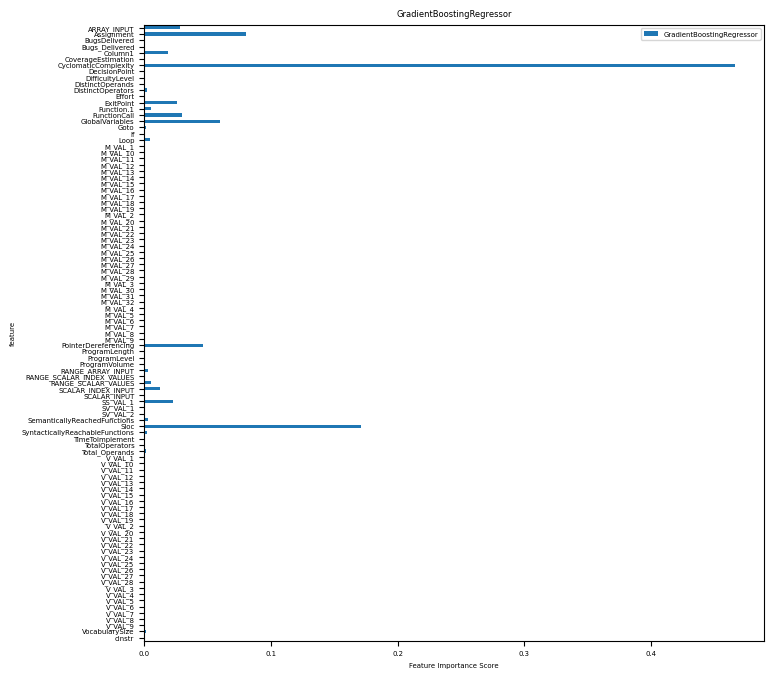

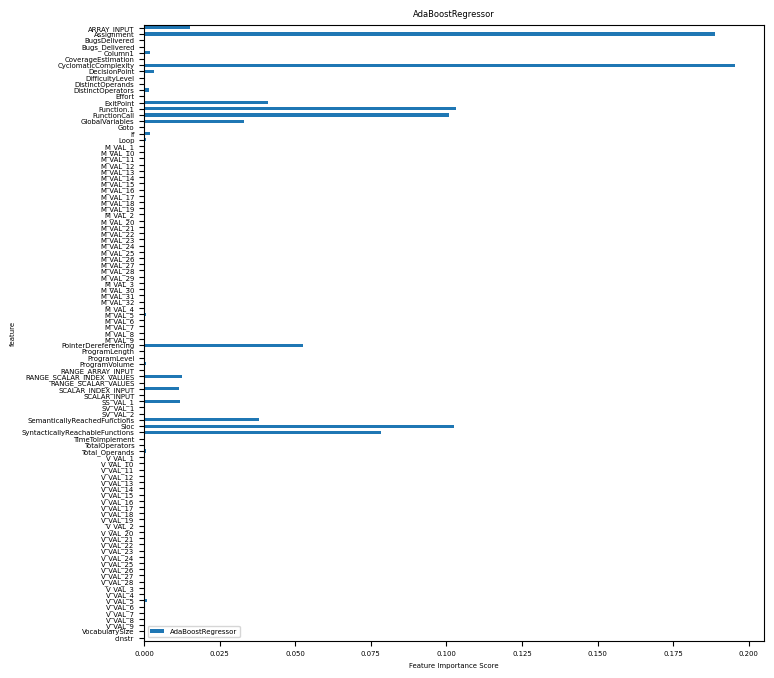

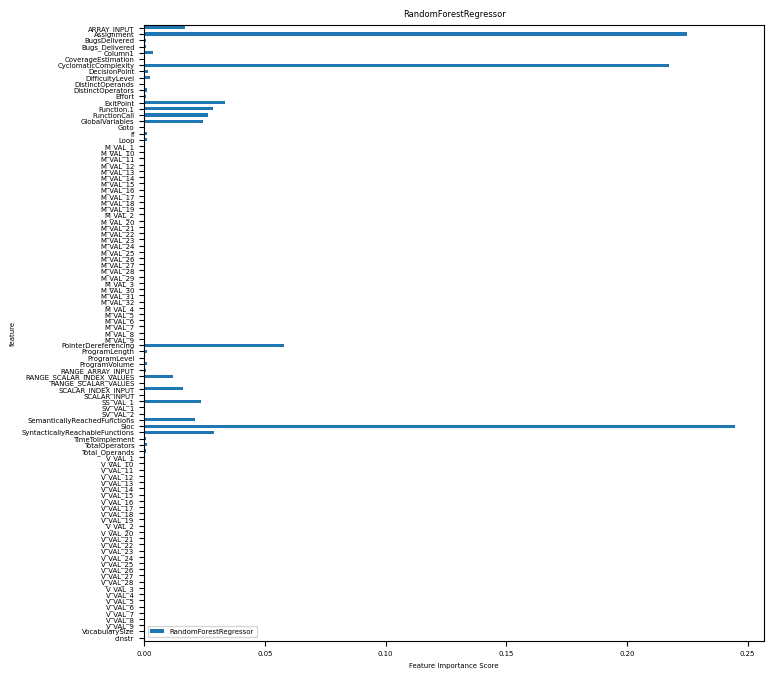

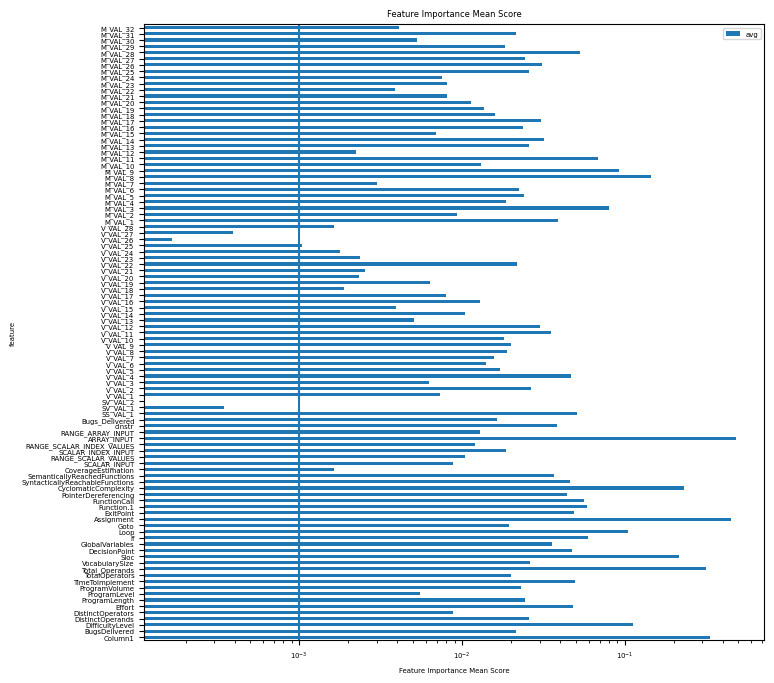

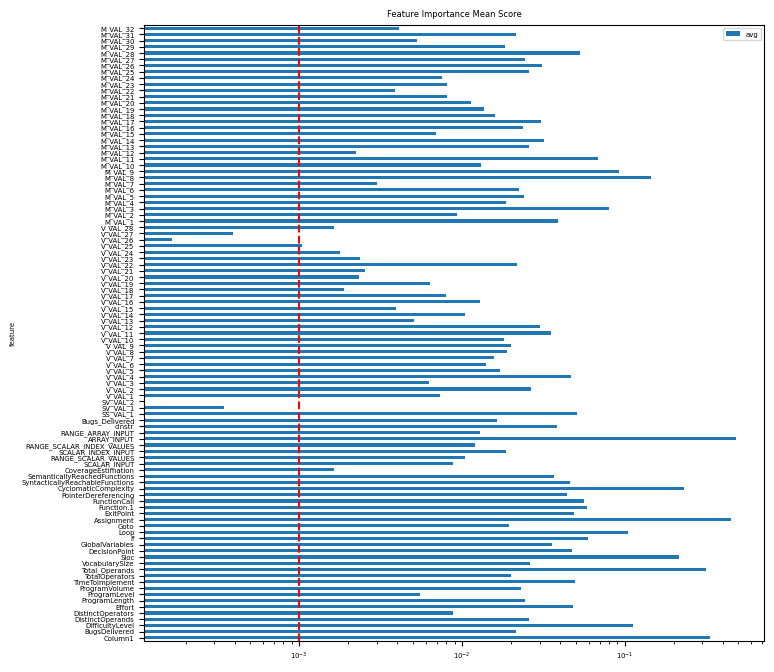

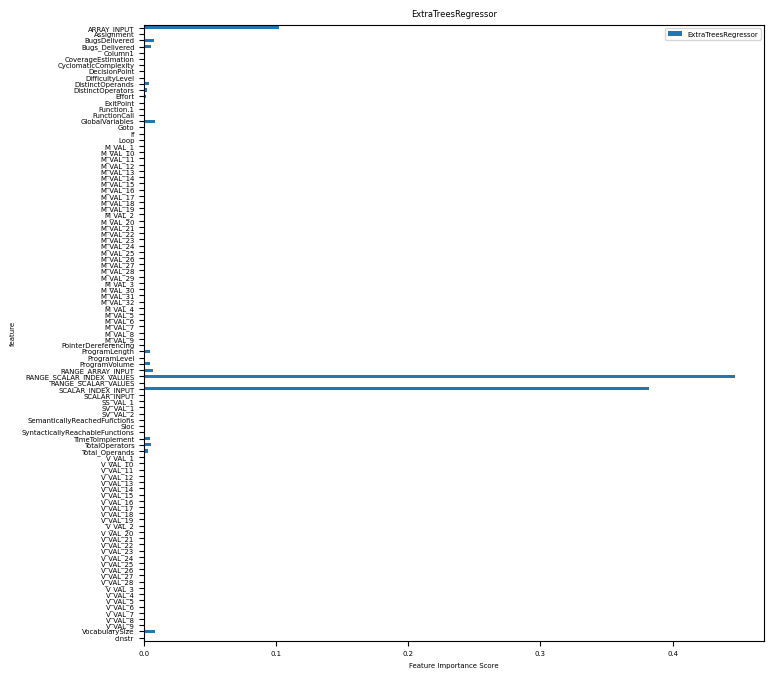

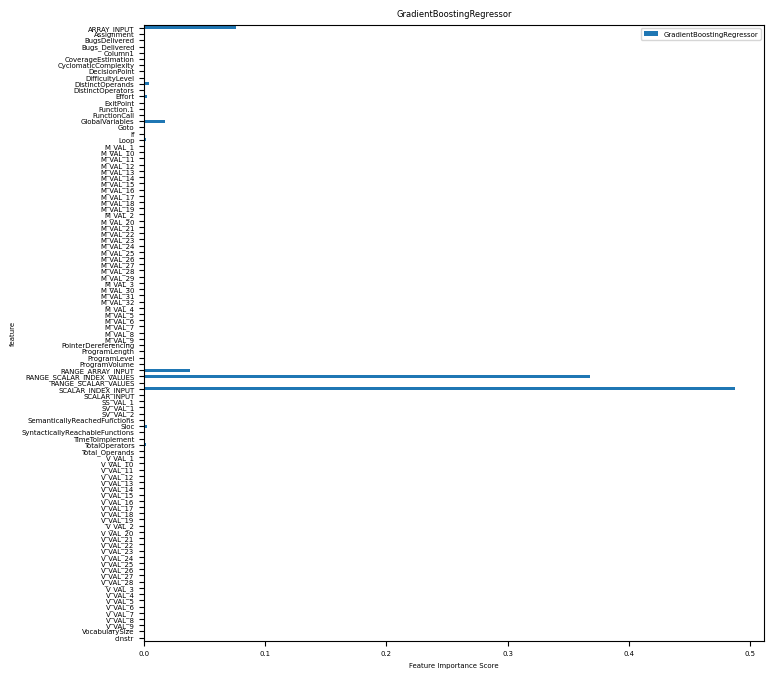

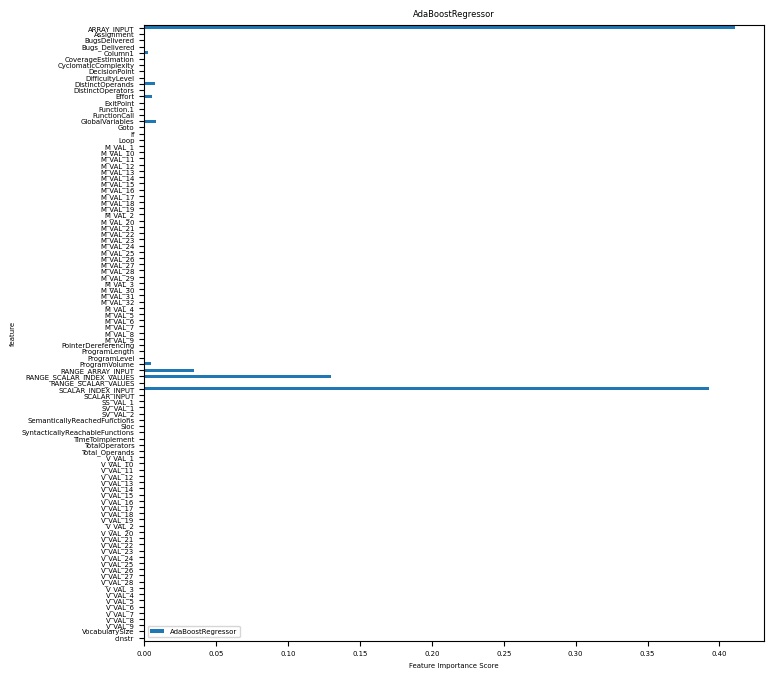

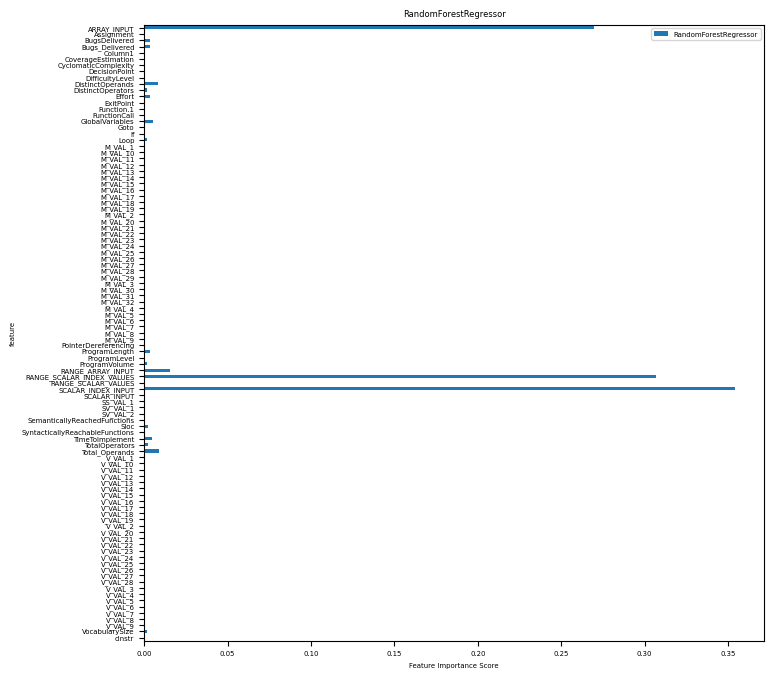

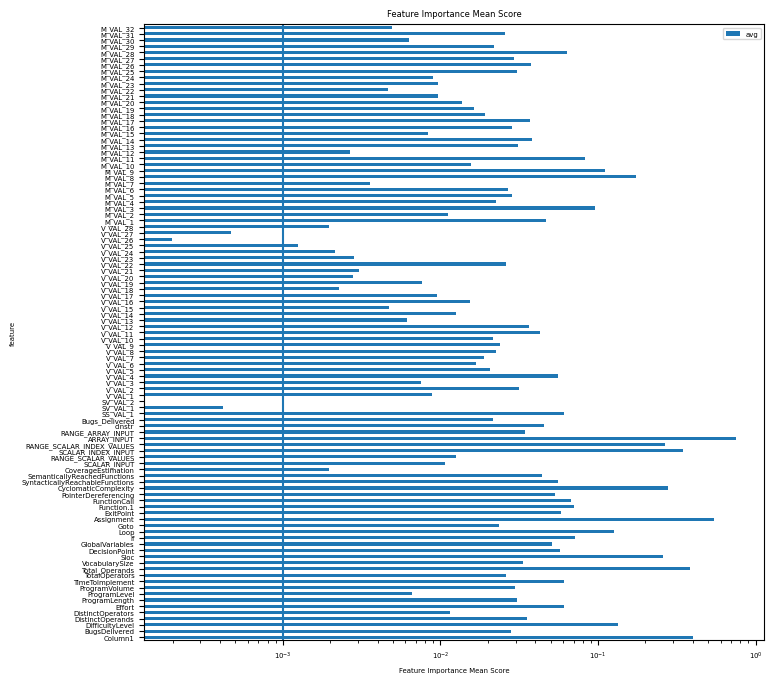

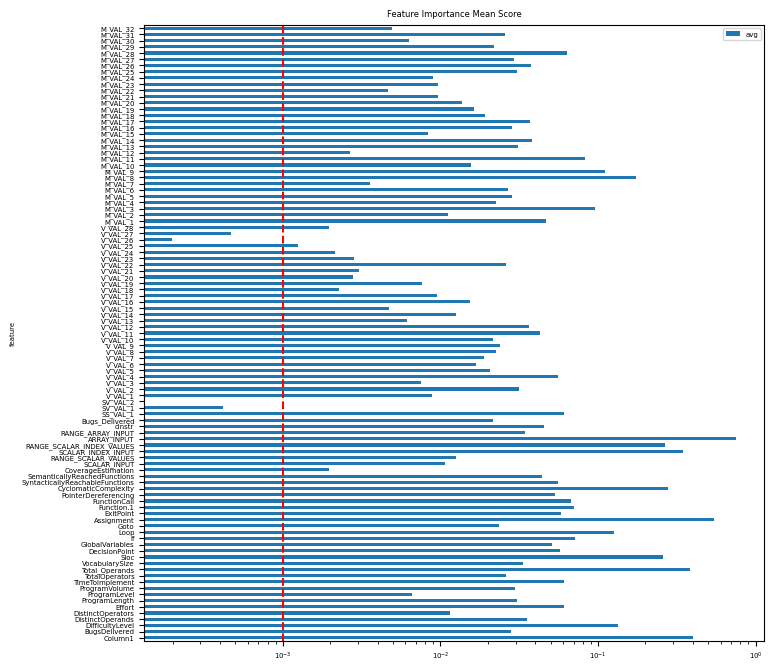

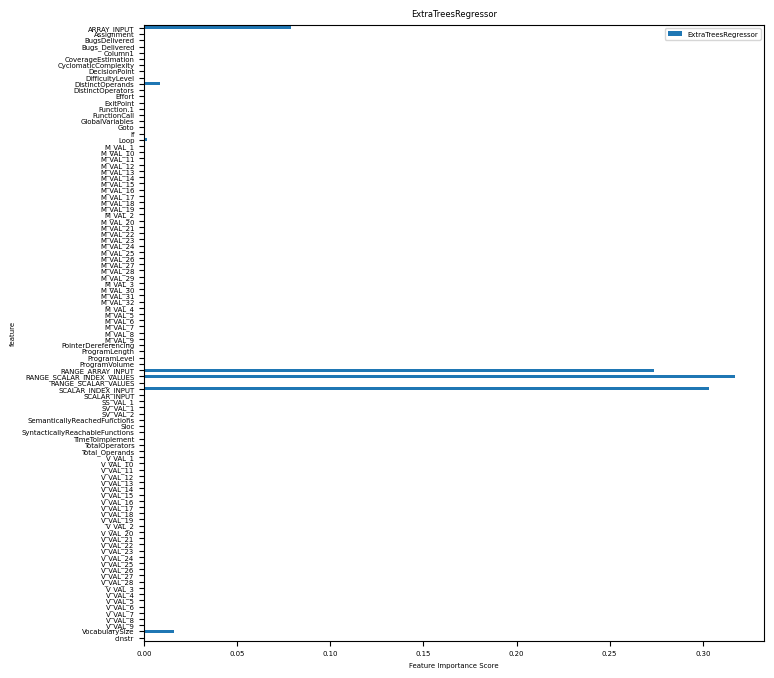

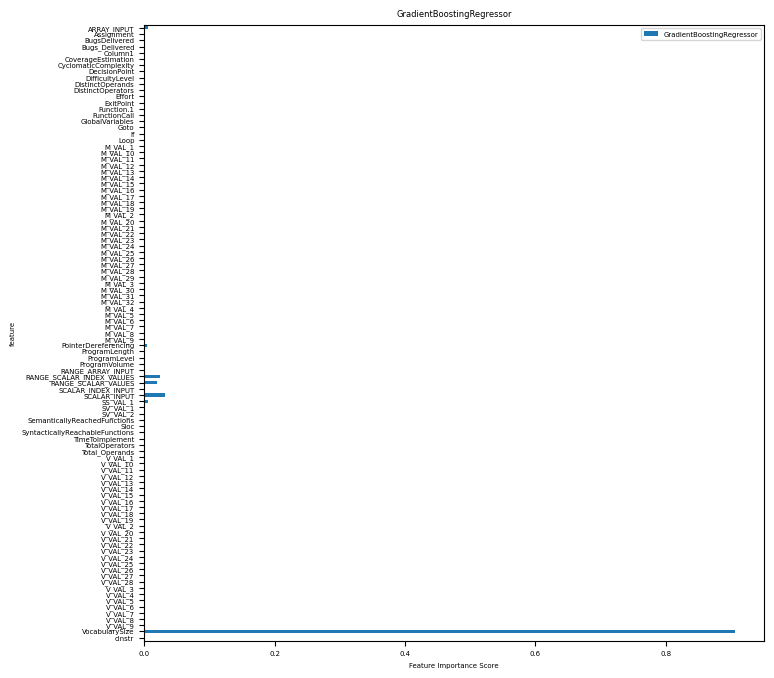

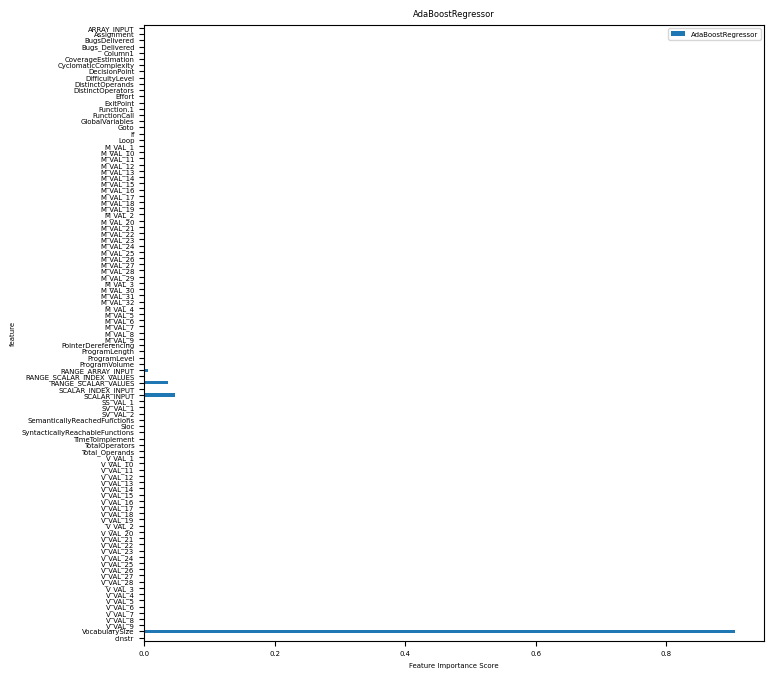

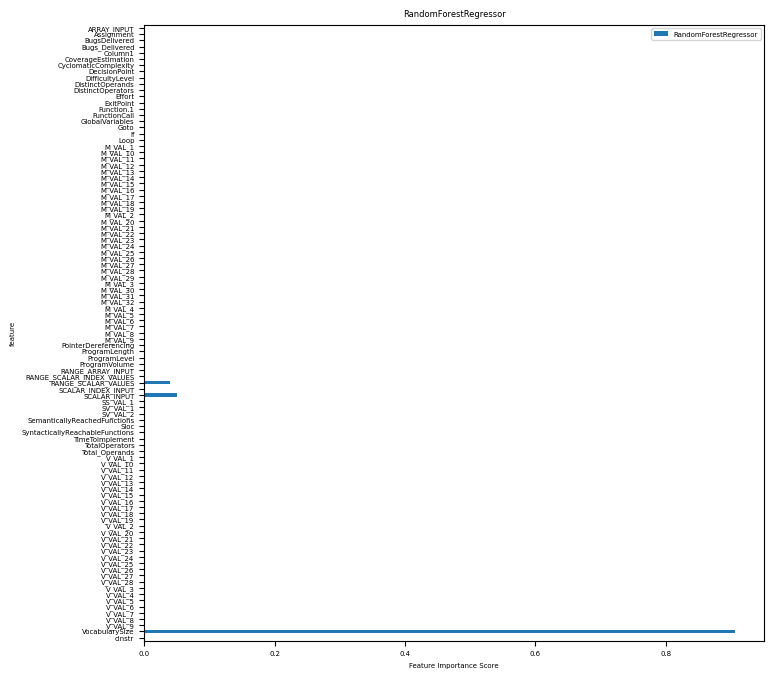

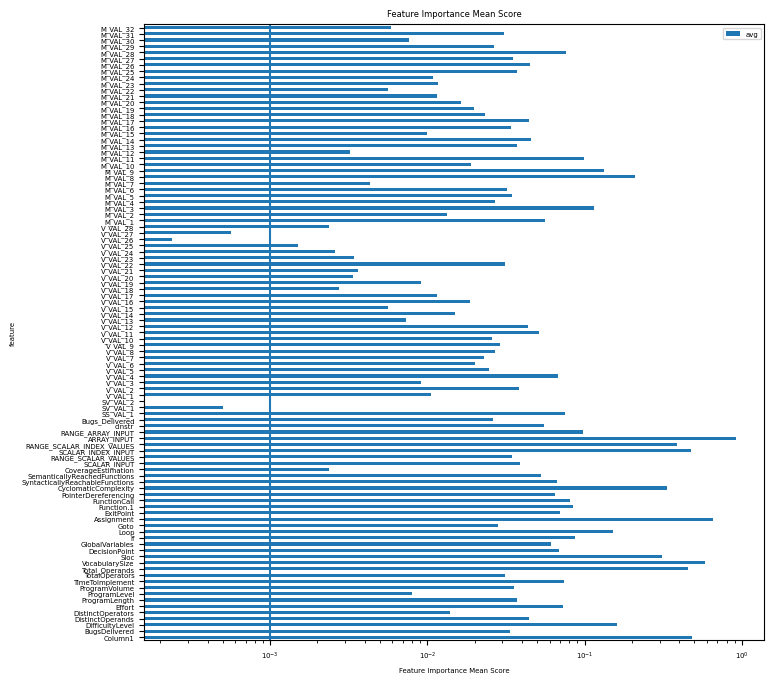

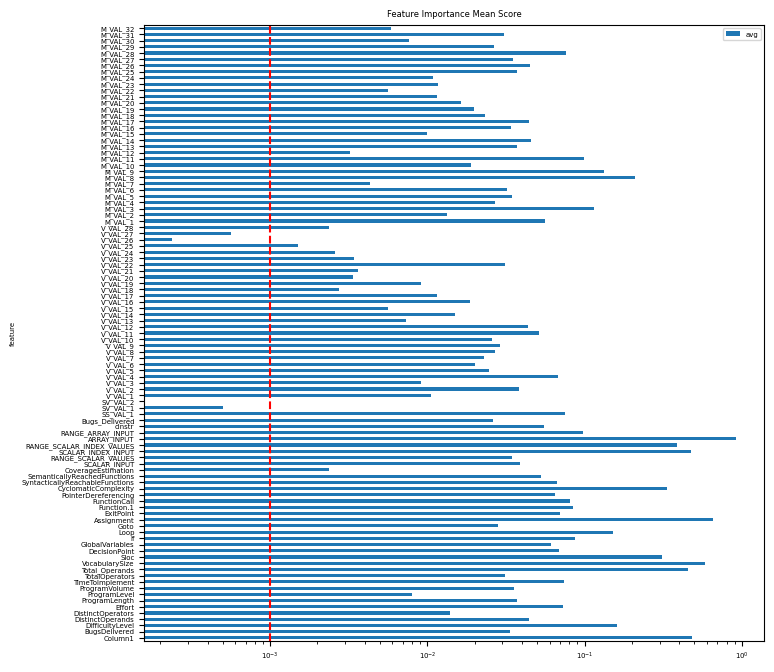

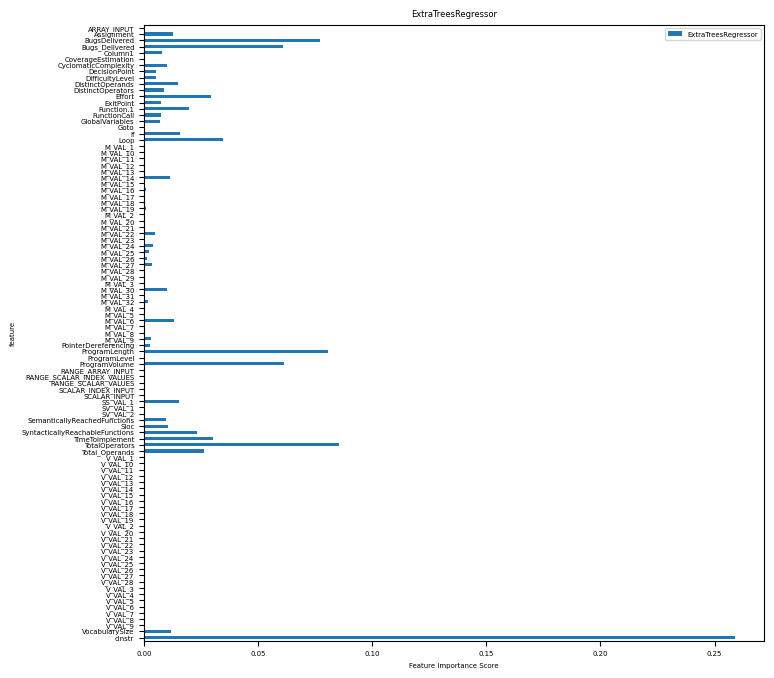

In [ ]:
ESTIMATORS = 250

#from google.colab import files
#uploaded = files.upload()


# import required module
import os

# assign directory
directory = 'Dataset\csv\TrainTest'
# filename = 'Artix-7.csv'

# iterate over files in that directory
for filename in os.listdir(directory): # INDENT
    f = os.path.join(directory, filename)
    fileTrainName = f.split('\\')
    # checking if it is a file
    if os.path.isfile(f):
        fileTrainNameNoFormat = fileTrainName[3].split('.')

        print("\n|------------------------------------|")
        print('\n' + fileTrainNameNoFormat[0] + '\n')
        print("|------------------------------------|\n")

    df = pd.read_csv(f, encoding = 'utf8', sep=',')
    # del df['Unnamed: 0']

    listHeader = list(df.columns.values)
    print(listHeader)
    print(listHeader[7:12])
    print(listHeader[49])
    y = df[["DSP", "BRAM", "Flip_Flop", "Area", "min_Slack", "Max_Freq","clockCycles"]]
    y.fillna(0, inplace=True)
    print(y)
    functionColumn = df['FUNCTION']
    X = df.drop(['ID_VAL', 'DEVICE', 'BOARD', 'FUNCTION', 'DATA_TYPE', 'DSP', 'BRAM', 'Flip_Flop', 'Area', 'min_Slack', 'Max_Freq', 'Time', 'Energy', 'assemblyInstr', 'clockCycles', 'CC4CS'], axis=1)
    print(X)
    X.fillna(0, inplace=True)

    #temporary dataframe for results
    dfAllResults = pd.DataFrame()

    # X = df[listHeader].astype(float)

    for y_series_name, y_series in y.items():

        X_train, X_test, y_train, y_test = train_test_split(X, y_series, test_size=0.20, shuffle=False)
        # functionColumn_train = functionColumn[1:len(y_train),:]
        # functionColumn_test = functionColumn[len(y_train)+1:len(y_test),:]

        ## Main Function

        clfs = [ExtraTreesRegressor(),
                GradientBoostingRegressor(learning_rate=0.1, n_estimators=ESTIMATORS),
                AdaBoostRegressor(learning_rate=0.1),
                RandomForestRegressor()
                ]

        print("\n|------------------------------------|")
        print('\n' + y_series_name + '\n')
        print("|------------------------------------|\n")

        file_name_path = 'FeatureImportRes\\generalScore\\'
        file_name_generalScore = fileTrainNameNoFormat[0] + y_series_name + '.png'

        for clf in clfs:
            try:
                _ = feature_importances_histo(clf, file_name_path, file_name_generalScore, X_train, y_train, top_n=X_train.shape[1], title=clf.__class__.__name__)
            except AttributeError as e:
                print(e)

        dfAllResults.set_index(['feature'], inplace=True)

        file_name_path = 'FeatureImportRes\\generalScore\\'
        file_name_generalScore = fileTrainNameNoFormat[0] + y_series_name + '.csv'
        dfAllResults.to_csv(os.path.join(file_name_path, file_name_generalScore), sep=',', encoding='utf-8', index=False)
        dfAllResults['sum'] = dfAllResults[dfAllResults.columns].sum(axis=1)
        dfAllResults['avg'] = dfAllResults['sum']/(len(dfAllResults.columns) - 1)
        file_name_path = 'FeatureImportRes\\allCLFscore\\'
        file_name = fileTrainNameNoFormat[0] + y_series_name + '.csv'
        dfAllResults.to_csv(os.path.join(file_name_path, file_name), sep='\t', encoding='utf-8')
        #files.download(file_name)

        print(dfAllResults)

        dfavg = dfAllResults[['avg']]
        file_name_path = 'FeatureImportRes\\scoreMean\\'
        file_name = fileTrainNameNoFormat[0] + y_series_name + '.csv'
        dfavg.to_csv(os.path.join(file_name_path, file_name), sep='\t', encoding='utf-8')
        #files.download(file_name)

        dfavg.plot.barh(title='Feature Importance Mean Score',logx=True, figsize=(8, 8))
        plt.xlabel('Feature Importance Mean Score')
        plt.xscale('log')
        plt.axvline(x=0.001)
        plt.rcParams.update({'font.size': 5})
        # plt.show()
        file_name_png = 'Mean' + fileTrainNameNoFormat[0] + y_series_name + '.png'
        # plt.savefig(os.path.join(file_name_path, file_name_png), format='png')

        print("\n=============   Feature Importance Mean Score   =============")
        print(dfavg)
        dfpruned = dfavg[~(dfavg['avg'] < 0.05)]
        print("\n=============   Feature Pruned by Score   =============")
        print(dfpruned)
        file_name_dataset_train_test_pruned = 'DatasetReduced/Pruned/' + fileTrainNameNoFormat[0] + '_' + y_series_name + '.csv' 
        dfpruned.to_csv(file_name_dataset_train_test_pruned, encoding='utf-8')

        df_pruned = pd.read_csv(file_name_dataset_train_test_pruned, encoding='utf-8')
        columnPruned = df_pruned[df_pruned.columns[0]].to_numpy()
        list_Pruned = columnPruned.tolist()
        print(list_Pruned)

        dfavg.plot.barh(title='Feature Importance Mean Score',logx=True, figsize=(8, 8))
        plt.xscale('log')
        plt.axvline(x=0.001, color='r', linestyle='--')
        plt.rcParams.update({'font.size': 5})
        # plt.show()
        file_name_png = 'MeanRed' + fileTrainNameNoFormat[0] + y_series_name + '.png'
        # plt.savefig(os.path.join(file_name_path, file_name_png), format='png')

        # remove features from df and save dataset file
        file_name_dataset_train = 'DatasetReduced/Train/' + fileTrainNameNoFormat[0] + '_' + y_series_name + '.csv' 
        df_X_train = pd.DataFrame(X_train)
        # df_X_train = df_X_train_1.drop(list_Pruned)
        # df_X_train.loc[:,~df_X_train.columns.str.contains('|'.join(list_Pruned))]
        for itemColTrain in list_Pruned:
            df_X_train = df_X_train.drop(str(itemColTrain), axis=1)       
        df_y_train = pd.DataFrame(y_train)
        df_final_train = pd.concat([df_X_train, df_y_train], axis=1)
        df_final_train.to_csv(file_name_dataset_train)

        file_name_dataset_test = 'DatasetReduced/Test/' + fileTrainNameNoFormat[0] + '_' + y_series_name + '.csv'
        df_X_test = pd.DataFrame(X_test)
        # df_X_test = df_X_test_1.drop(list_Pruned)
        # df_X_test.loc[:,~df_X_test.columns.str.contains('|'.join(list_Pruned))]
        for itemColTest in list_Pruned:
            df_X_test = df_X_test.drop(str(itemColTest), axis=1) 
        df_y_test = pd.DataFrame(y_test)
        df_final_test = pd.concat([df_X_test, df_y_test], axis=1)
        df_final_test.to_csv(file_name_dataset_test)

        # if os.path.exists(file_name_dataset_train_test_pruned):
        #     os.remove(file_name_dataset_train_test_pruned)
        # else:
        #     print(file_name_dataset_train_test_pruned)
            
        # FINAL TOTAL
        file_name_dataset_total = 'DatasetReduced/TrainTest/' + fileTrainNameNoFormat[0] + '_' + y_series_name + '.csv'
        resultTotal2 = pd.concat([df_final_train, df_final_test], axis=0)
        resultTotal = pd.concat([functionColumn, resultTotal2], axis=1)
        #m resultTotal = pd.concat([df_final_train, df_final_test], axis=0)
        resultTotal.to_csv(file_name_dataset_total)